In [1]:
#############################################################################################################################
### Modelling the UK retail market. ###



In [2]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams
#cParams['figure.figsize'] = 30, 615
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from pandas.plotting import autocorrelation_plot
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import itertools
import warnings
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import squarify

from sklearn import linear_model


In [3]:
#################################
### GDP, Household income ###
#################################
glv1df=pd.read_csv(r'D:\\retail\glvmodelcsv1a.csv')
glv1df.columns = ['time','Date', 'GDP', 'income']
del glv1df['time']
glv1df.head()

Date   GDP  income
0  01/03/1955  4751    3338
1  01/06/1955  4922    3335
2  01/09/1955  5016    3442
3  01/01/1956  5141    3328
4  01/03/1956  5214    3579

In [4]:
glv1df['Date'] = pd.to_datetime(glv1df['Date']).dt.strftime('%d-%m%-Y%')
#glv1df.drop(['Date'], axis=1, inplace=True)
glv1df.set_index('Date', inplace=True) 
glv1df.head()

GDP  income
Date                             
1955-01-03 00:00:00  4751    3338
1955-01-06 00:00:00  4922    3335
1955-01-09 00:00:00  5016    3442
1956-01-01 00:00:00  5141    3328
1956-01-03 00:00:00  5214    3579

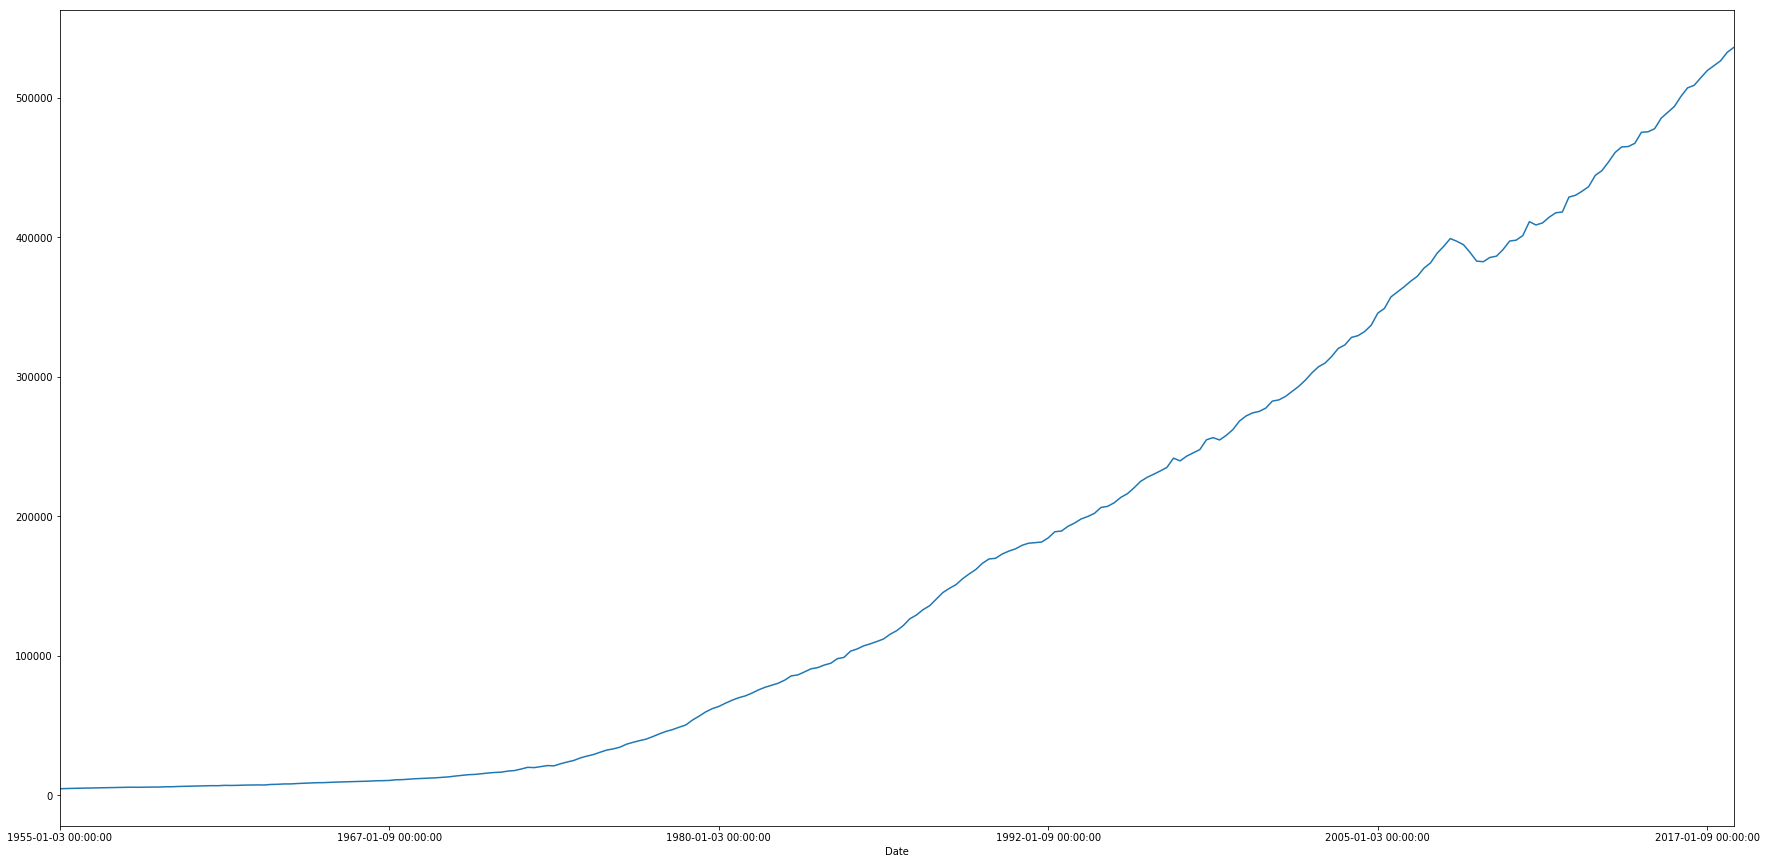

In [5]:
glv1df['GDP'].plot(figsize=(30,15))

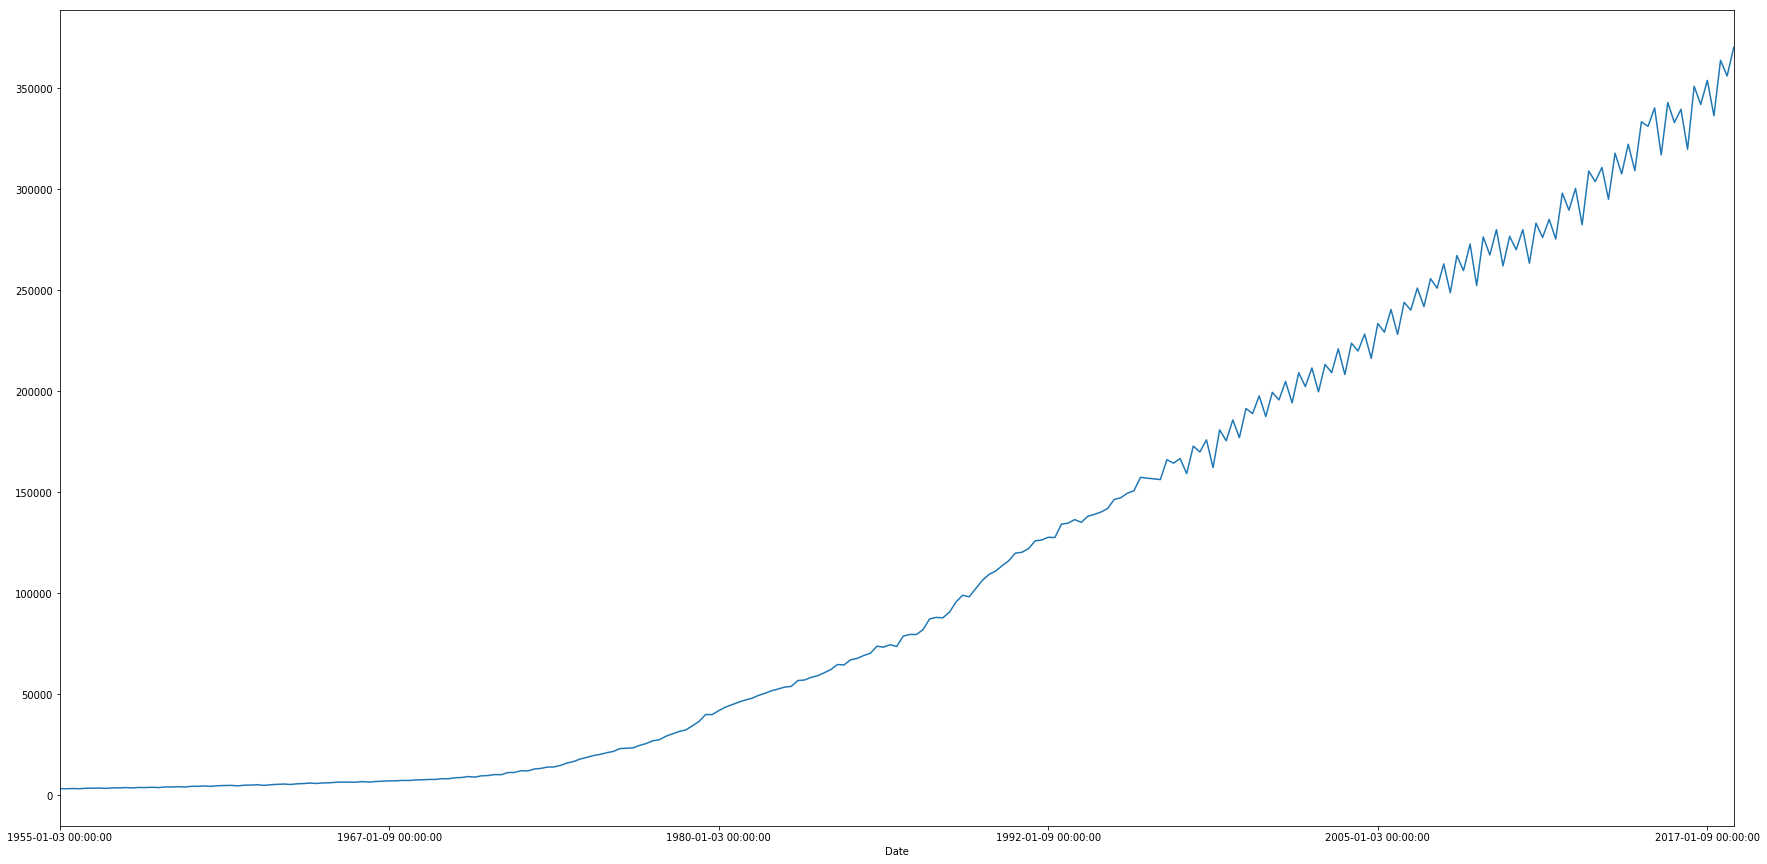

In [6]:
glv1df['income'].plot(figsize=(30,15))

array([[1.        , 0.99876193],
       [0.99876193, 1.        ]])

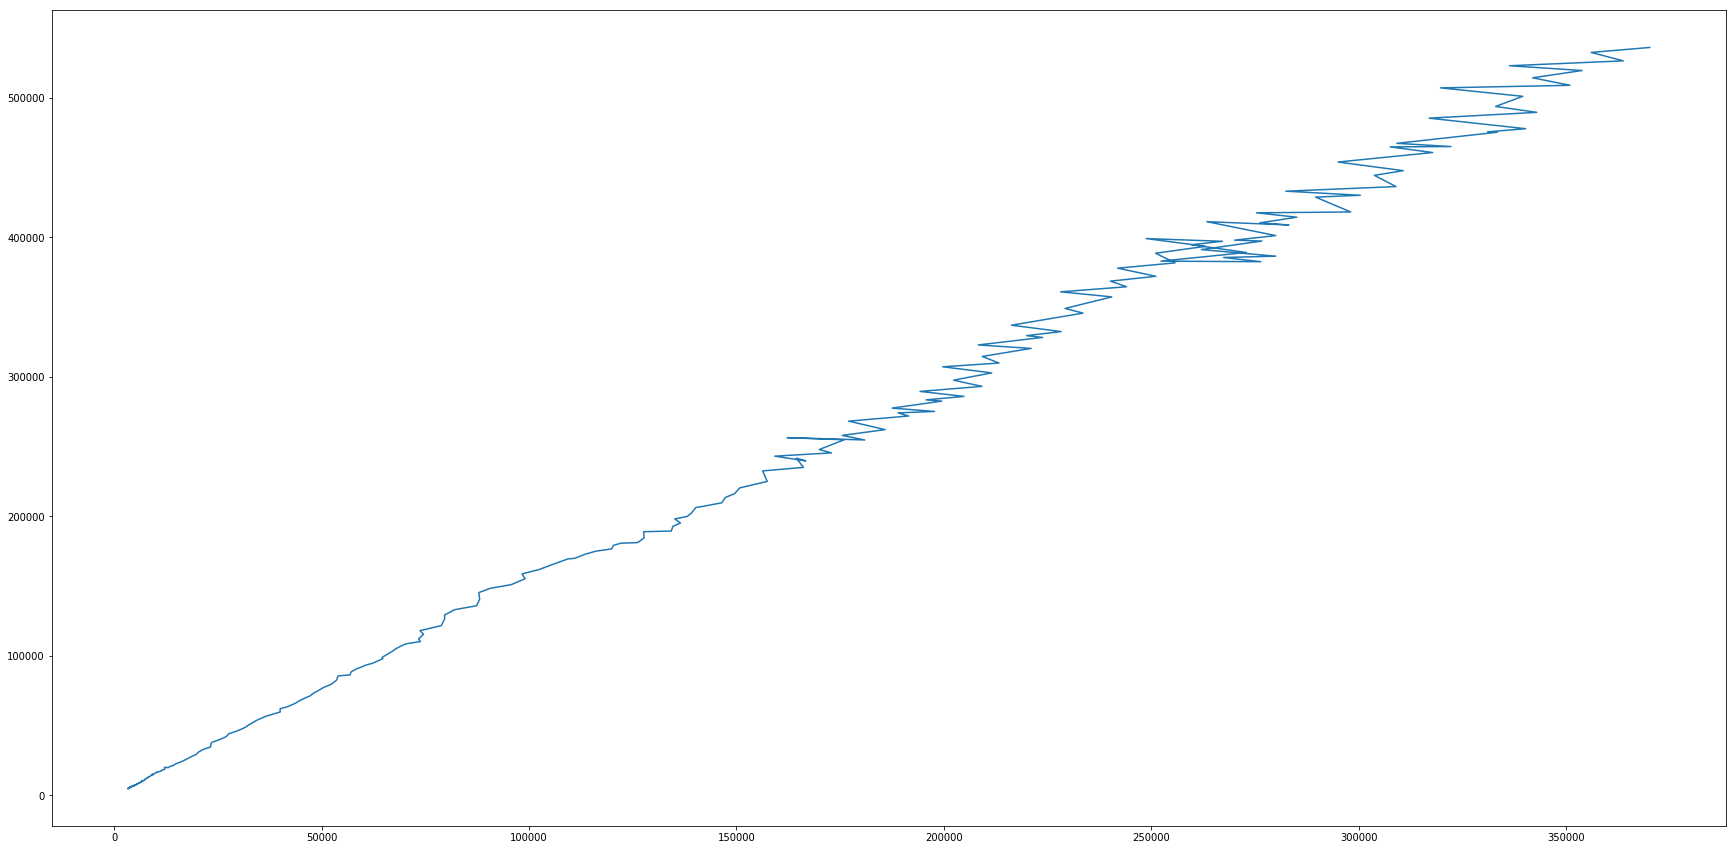

In [7]:
fig, ax = plt.subplots(figsize=(30,15))
y=glv1df['GDP']
x=glv1df['income']
ax.plot(x,y)
np.corrcoef(x, y)

In [8]:
y=glv1df['GDP']
X=glv1df['income']



# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.112e+05
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:36:54   Log-Likelihood:                -2662.8
No. Observations:                 255   AIC:                             5328.
Df Residuals:                     254   BIC:                             5331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
income         1.4761      0.003    459.529      0.000       1.470       1.482
==============================================================================
Omnibus:                       24.934   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.470
Skew:                           0.225   Prob(JB):                     3.06e-21
Kurtosis:                       5.948   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#################################
### RSI ###
#################################
colnames=['time', 'RSI', 'Date1']
glv2df=pd.read_csv(r'D:\\retail\glvmodelcsv2.csv',names=colnames )
del glv2df['time']
glv2df.head()

RSI       Date1
0  50.8  01/01/1988
1  51.5  01/03/1988
2  52.3  01/06/1988
3  53.3  01/09/1988
4  52.9  01/01/1989

In [10]:
glv2df['Date'] = pd.to_datetime(glv2df['Date1']).dt.strftime('%d-%m%-Y%')
glv2df.drop(['Date1'], axis=1, inplace=True)
glv2df.set_index('Date', inplace=True) 
glv2df.head()

RSI
Date                     
1988-01-01 00:00:00  50.8
1988-01-03 00:00:00  51.5
1988-01-06 00:00:00  52.3
1988-01-09 00:00:00  53.3
1989-01-01 00:00:00  52.9

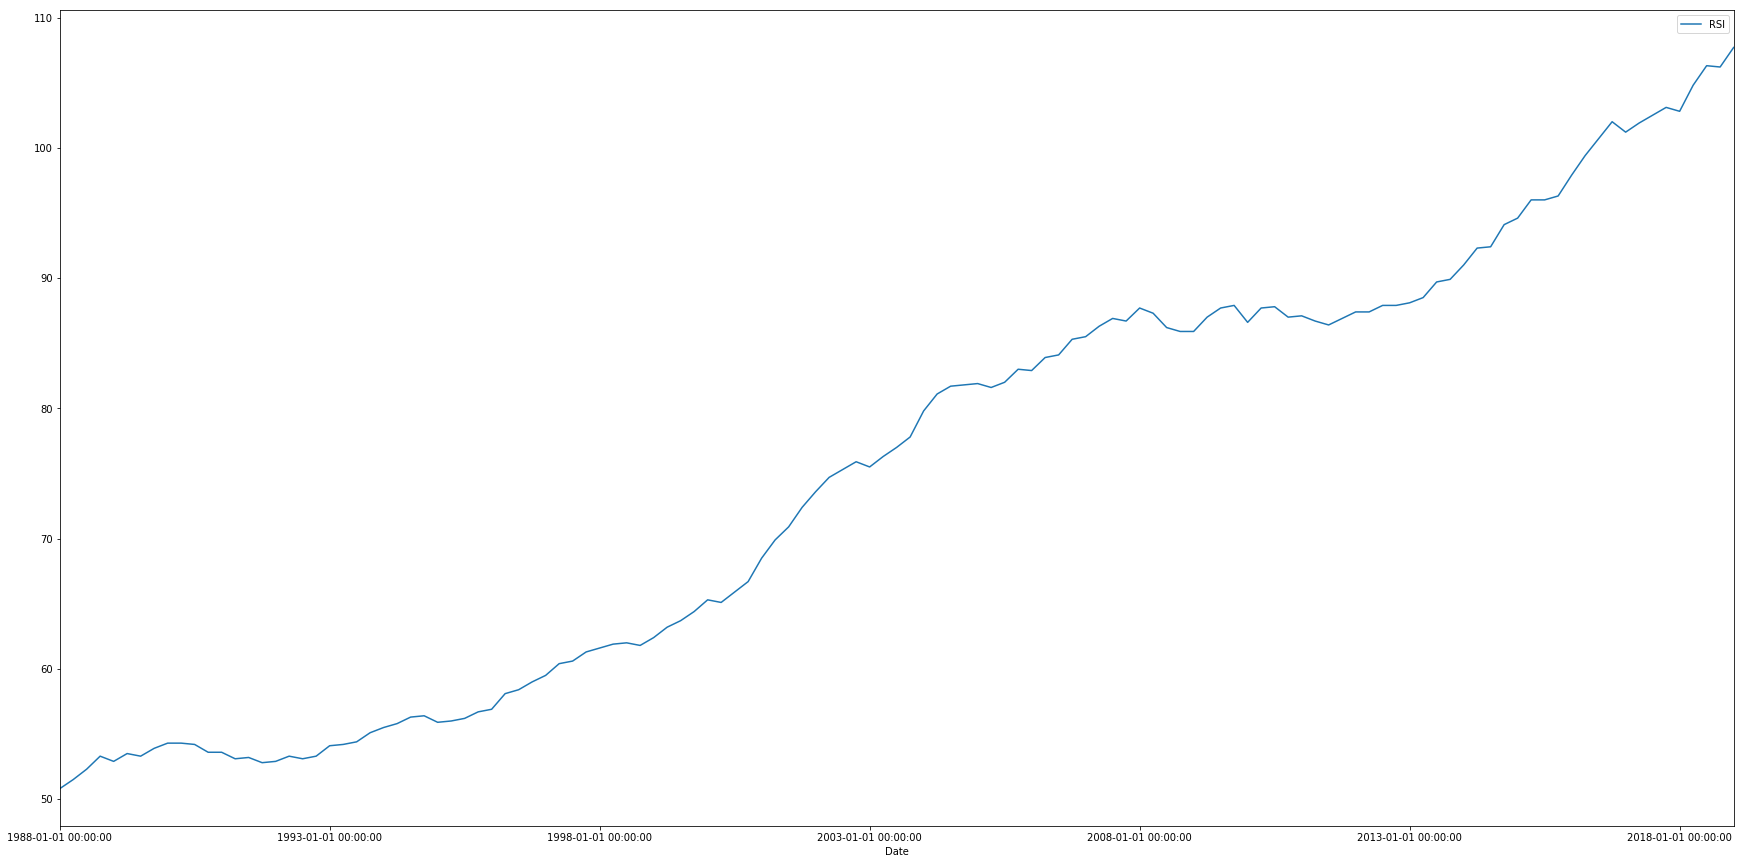

In [11]:
glv2df.plot(figsize=(30,15))

In [12]:
df1=glv1df.join(glv2df, how='outer')
df1=df1.dropna()
df1.head()

GDP   income   RSI
Date                                        
1988-01-01 00:00:00  133077.0  82098.0  50.8
1988-01-03 00:00:00  135906.0  87370.0  51.5
1988-01-06 00:00:00  140584.0  88116.0  52.3
1988-01-09 00:00:00  145329.0  87918.0  53.3
1989-01-01 00:00:00  148383.0  90688.0  52.9

array([[1.        , 0.98921291],
       [0.98921291, 1.        ]])

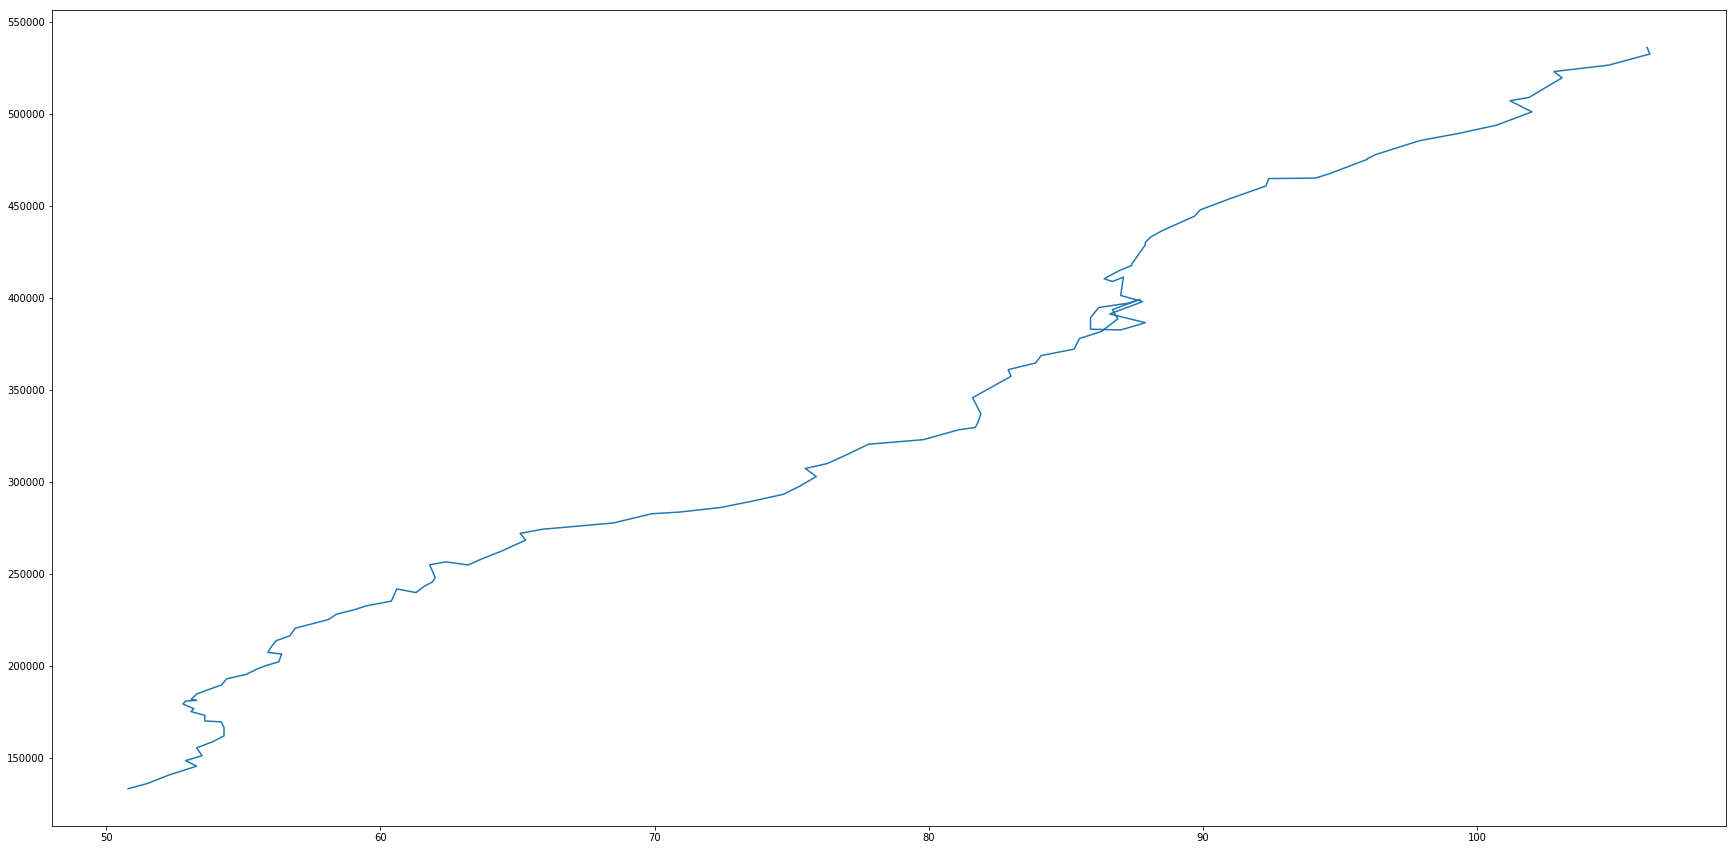

In [13]:
fig, ax = plt.subplots(figsize=(30,15))
y=df1['GDP']
x=df1['RSI']
ax.plot(x,y)
np.corrcoef(x, y)

In [14]:
y=df1['GDP']
X=df1['RSI']
# Note the difference in argument order
model1 = sm.OLS(y, X).fit()
predictions = model1.predict(X) # make the predictions by the model

# Print out the statistics
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     7169.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):          6.65e-111
Time:                        18:36:56   Log-Likelihood:                -1501.9
No. Observations:                 124   AIC:                             3006.
Df Residuals:                     123   BIC:                             3009.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RSI         4391.3730     51.863     84.672      0.000    4288.713    4494.033
==============================================================================
Omnibus:                       10.961   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                4.602
Skew:                           0.193   Prob(JB):                        0.100
Kurtosis:                       2.138   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#################################
### retail sales in millions of £ ###
#################################

colnames=['time', 'sales']
glv3df=pd.read_csv(r'D:\\retail\glvmodelcsv3.csv',names=colnames )
glv3df.head()


time   sales
0  2005  281450
1  2006  292110
2  2007  303621
3  2008  321178
4  2009  317658

In [16]:
glv3df['time'].astype(str).astype(int)
glv3df.set_index('time', inplace=True) 
glv3df.head()

sales
time        
2005  281450
2006  292110
2007  303621
2008  321178
2009  317658

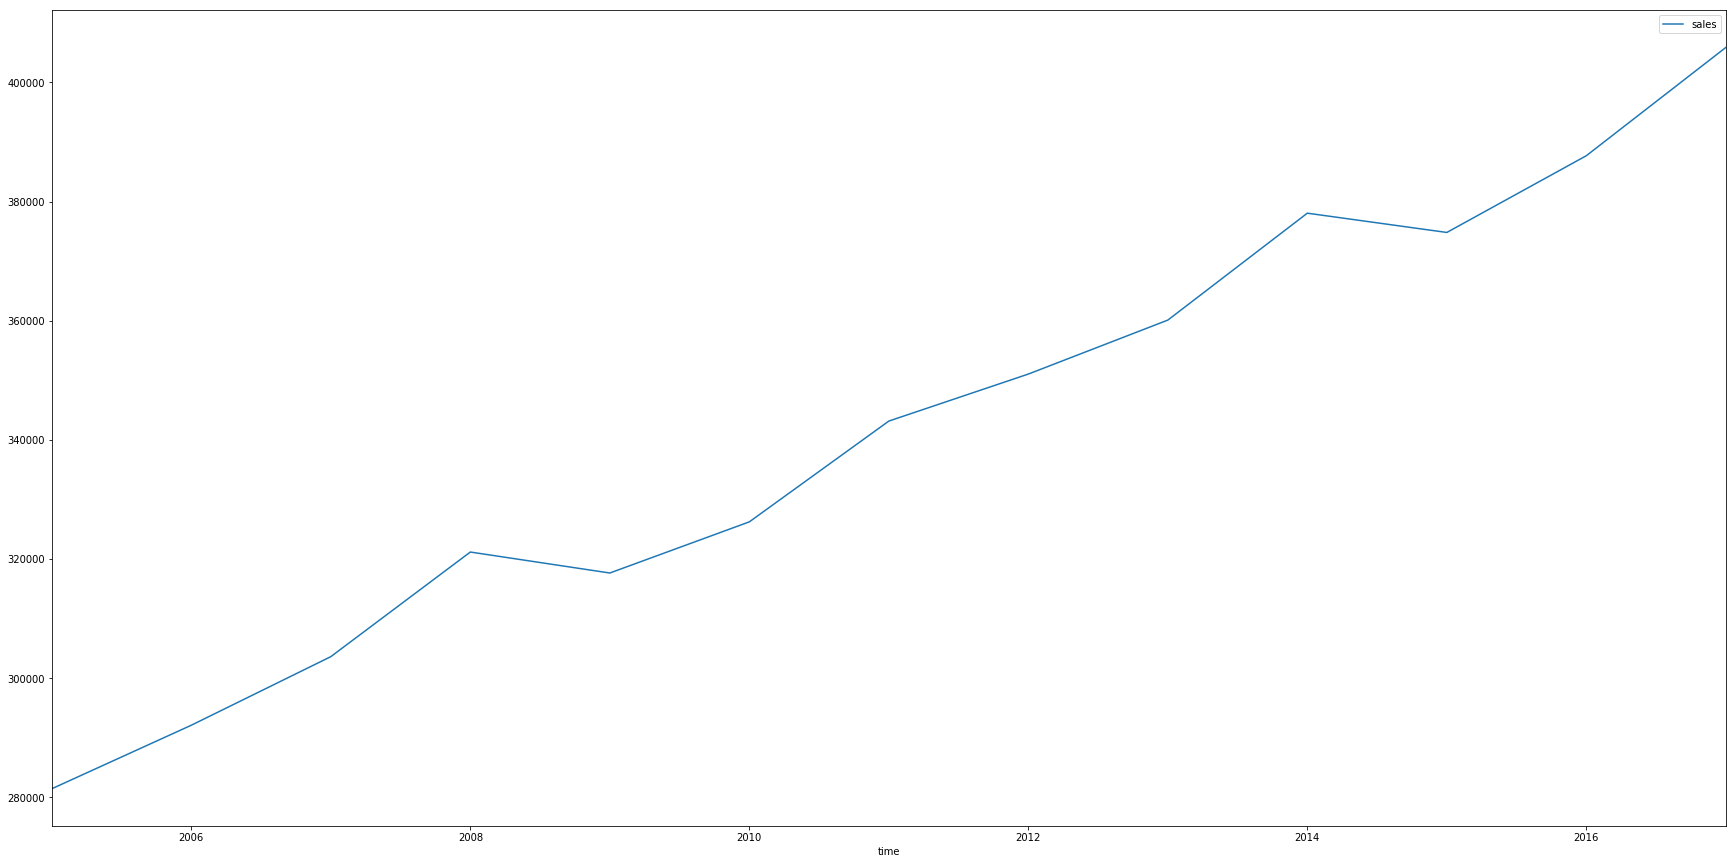

In [17]:
glv3df.plot(figsize=(30,15))

In [18]:
#################################
### Retailsale in millions and RSI(annual) ###
#################################
colnames=['time', 'sales', 'RSI']
glv4df=pd.read_csv(r'D:\\retail\glvmodelcsv4.csv',names=colnames )
glv4df.head()



time   sales   RSI
0  2005  281450  82.1
1  2006  292110  84.1
2  2007  303621  86.4
3  2008  321178  86.8
4  2009  317658  87.1

In [19]:
glv4df['time'].astype(str).astype(int)
glv4df.set_index('time', inplace=True) 
glv4df.head()

sales   RSI
time              
2005  281450  82.1
2006  292110  84.1
2007  303621  86.4
2008  321178  86.8
2009  317658  87.1

array([[1.        , 0.91304492],
       [0.91304492, 1.        ]])

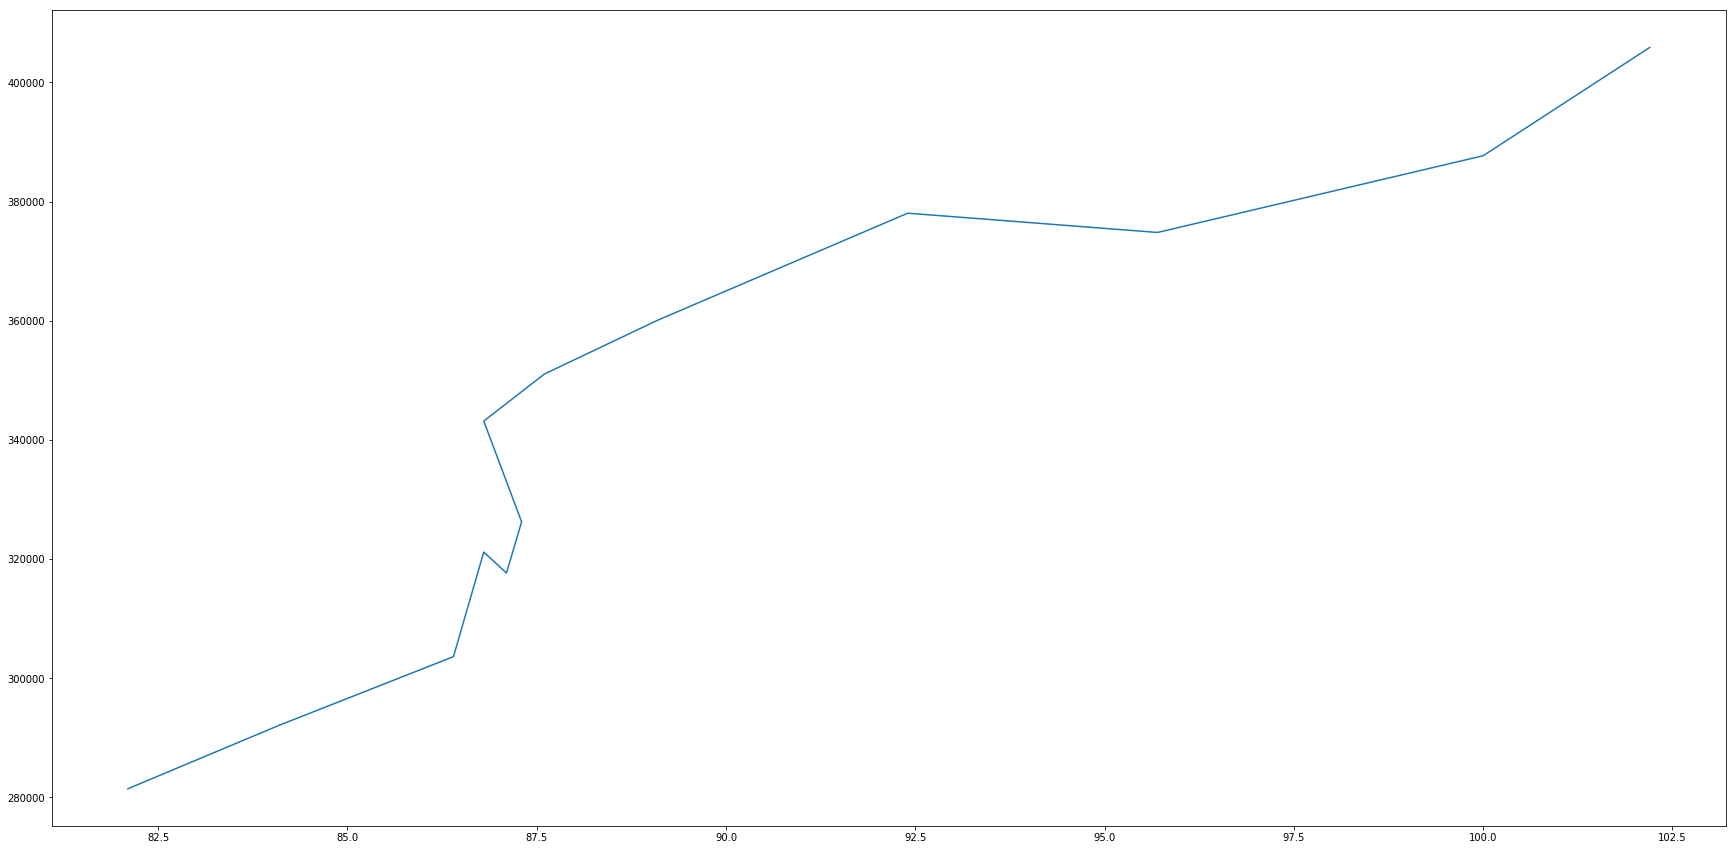

In [20]:
fig, ax = plt.subplots(figsize=(30,15))
y=glv4df['sales']
x=glv4df['RSI']
ax.plot(x,y)
np.corrcoef(x, y)

In [21]:
y=glv4df['sales']
X=glv4df['RSI']
# Note the difference in argument order
model2 = sm.OLS(y, X).fit()
predictions = model2.predict(X) # make the predictions by the model

# Print out the statistics
model2.summary()

C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3872.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           1.96e-16
Time:                        18:36:58   Log-Likelihood:                -146.60
No. Observations:                  13   AIC:                             295.2
Df Residuals:                      12   BIC:                             295.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RSI         3813.6550     61.285     62.228      0.000    3680.125    3947.185
==============================================================================
Omnibus:                        2.793   Durbin-Watson:                   0.239
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                1.194
Skew:                          -0.317   Prob(JB):                        0.550
Kurtosis:                       1.657   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#################################
### category sales  ###
#################################

colnames=['category','online','store','onlinepercent','storepercent','pubcategory','retailingpercent']
glv5df=pd.read_csv(r'D:\\retail\glvmodelcsv5.csv', names =colnames)
glv5df.head()

category   online     store  onlinepercent  \
0                           Food   8358.5  149704.3       5.288088   
1                       Non-food  20894.9  148040.6      12.368567   
2              Department stores   4862.1   29940.5      13.970508   
3                 Other non-food   4927.7   47363.3       9.423610   
4  Textile clothing and footwear   7353.4   41249.3      15.129612   

   storepercent                    pubcategory  retailingpercent  
0     94.711912      Predominantly food stores              38.5  
1     87.631433  Predominantly non-food stores              41.0  
2     86.029492           Non-store retailing               10.3  
3     90.576390                Automotive Fuel              10.2  
4     84.870388                            NaN               NaN

<Figure size 2160x1080 with 0 Axes>

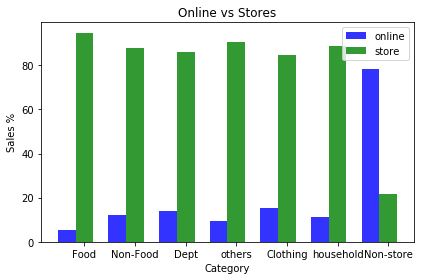

In [23]:

onlinesales = glv5df['onlinepercent']
instoresales= glv5df['storepercent']

plt.figure(figsize=(30,15))

n_groups = 7
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8


rects1 = plt.bar(index, onlinesales, bar_width,
alpha=opacity,
color='b',
label='online')


rects2 = plt.bar(index + bar_width, instoresales, bar_width,
alpha=opacity,
color='g',
label='store')


plt.xlabel('Category')
plt.ylabel('Sales %')
plt.title('Online vs Stores')
plt.xticks(index + bar_width, ('Food', 'Non-Food', 'Dept', 'others', 'Clothing', 'household', 'Non-store'))
plt.legend()

plt.tight_layout()
plt.show()





<Figure size 2160x1080 with 0 Axes>

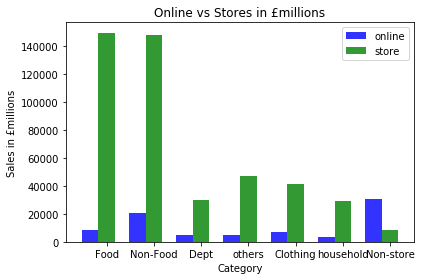

In [24]:

onlinesales = glv5df['online']
instoresales= glv5df['store']

plt.figure(figsize=(30,15))

n_groups = 7
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8


rects1 = plt.bar(index, onlinesales, bar_width,
alpha=opacity,
color='b',
label='online')


rects2 = plt.bar(index + bar_width, instoresales, bar_width,
alpha=opacity,
color='g',
label='store')


plt.xlabel('Category')
plt.ylabel('Sales in £millions')
plt.title('Online vs Stores in £millions')
plt.xticks(index + bar_width, ('Food', 'Non-Food', 'Dept', 'others', 'Clothing', 'household', 'Non-store'))
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
#################################
### Category sales by year ###
#################################
glv6df=pd.read_csv(r'D:\\retail\glvmodelcsv6.csv')
glv6df.head()

time  transport  recreation  housing  otheritems  food  restaurants  \
0  2002       88.0        54.4     64.1        76.7  59.0         52.3   
1  2003       88.6        55.9     64.3        73.2  60.5         53.7   
2  2004       88.3        57.6     66.7        74.8  60.5         51.3   
3  2005       83.7        60.0     66.2        77.0  61.9         51.5   
4  2006       80.5        59.9     67.9        76.8  61.7         50.7   

   services  households  clothing  communication  alcohol  health  education  
0      42.9        36.3      15.6           12.0     19.9     6.8       17.9  
1      45.2        36.1      16.3           12.2     19.6     7.0       15.8  
2      44.6        37.5      17.2           12.8     19.8     7.1       14.9  
3      44.4        38.0      19.0           13.6     18.7     6.9       17.7  
4      42.2        36.2      19.8           13.7     17.5     7.7       17.0

In [26]:
glv6df['time'].astype(str).astype(int)
glv6df.set_index('time', inplace=True) 
glv6df

transport  recreation  housing  otheritems  food  restaurants  services  \
time                                                                            
2002       88.0        54.4     64.1        76.7  59.0         52.3      42.9   
2003       88.6        55.9     64.3        73.2  60.5         53.7      45.2   
2004       88.3        57.6     66.7        74.8  60.5         51.3      44.6   
2005       83.7        60.0     66.2        77.0  61.9         51.5      44.4   
2006       80.5        59.9     67.9        76.8  61.7         50.7      42.2   
2007       79.3        60.2     70.5        72.5  61.4         48.5      40.9   
2008       77.2        63.4     66.5        75.9  59.3         47.3      40.1   
2009       70.5        60.4     68.9        78.4  57.9         47.0      38.7   
2010       72.3        59.5     72.3        72.2  57.1         46.8      38.7   
2011       68.0        65.4     71.9        72.8  55.8         45.2      40.6   
2012       64.8        62.8     73.5        70.1  56.0         44.8      39.6   
2013       70.5        64.6     77.3        73.6  55.9         43.5      40.0   
2014       74.6        68.9     73.3        70.0  55.9         44.7      40.8   
2015       73.6        69.5     73.3        66.8  55.9         44.5      41.3   
2016       74.3        68.5     72.7        73.3  55.9         46.4      40.2   
2017       79.7        73.5     72.6        72.0  58.0         50.1      41.8   
2018       80.8        74.6     76.1        76.4  60.6         49.6      43.5   

      households  clothing  communication  alcohol  health  education  
time                                                                   
2002        36.3      15.6           12.0     19.9     6.8       17.9  
2003        36.1      16.3           12.2     19.6     7.0       15.8  
2004        37.5      17.2           12.8     19.8     7.1       14.9  
2005        38.0      19.0           13.6     18.7     6.9       17.7  
2006        36.2      19.8           13.7     17.5     7.7       17.0  
2007        36.5      19.8           14.5     17.1     7.3       14.6  
2008        35.1      20.7           15.0     15.9     6.4       11.9  
2009        31.5      21.8           14.5     15.8     6.4       12.5  
2010        34.4      24.6           15.4     15.8     5.9       17.0  
2011        28.5      22.3           15.1     14.7     7.5       11.3  
2012        29.0      23.9           15.1     14.6     7.0       10.0  
2013        33.5      22.8           15.3     13.1     6.7       11.1  
2014        35.5      23.9           16.2     12.8     7.4       11.2  
2015        36.7      23.7           16.2     12.4     7.3       10.1  
2016        35.5      23.5           16.4     11.6     7.4        7.4  
2017        39.3      25.1           17.2     11.9     7.3        5.7  
2018        40.7      24.3           17.9     12.4     6.9        8.7

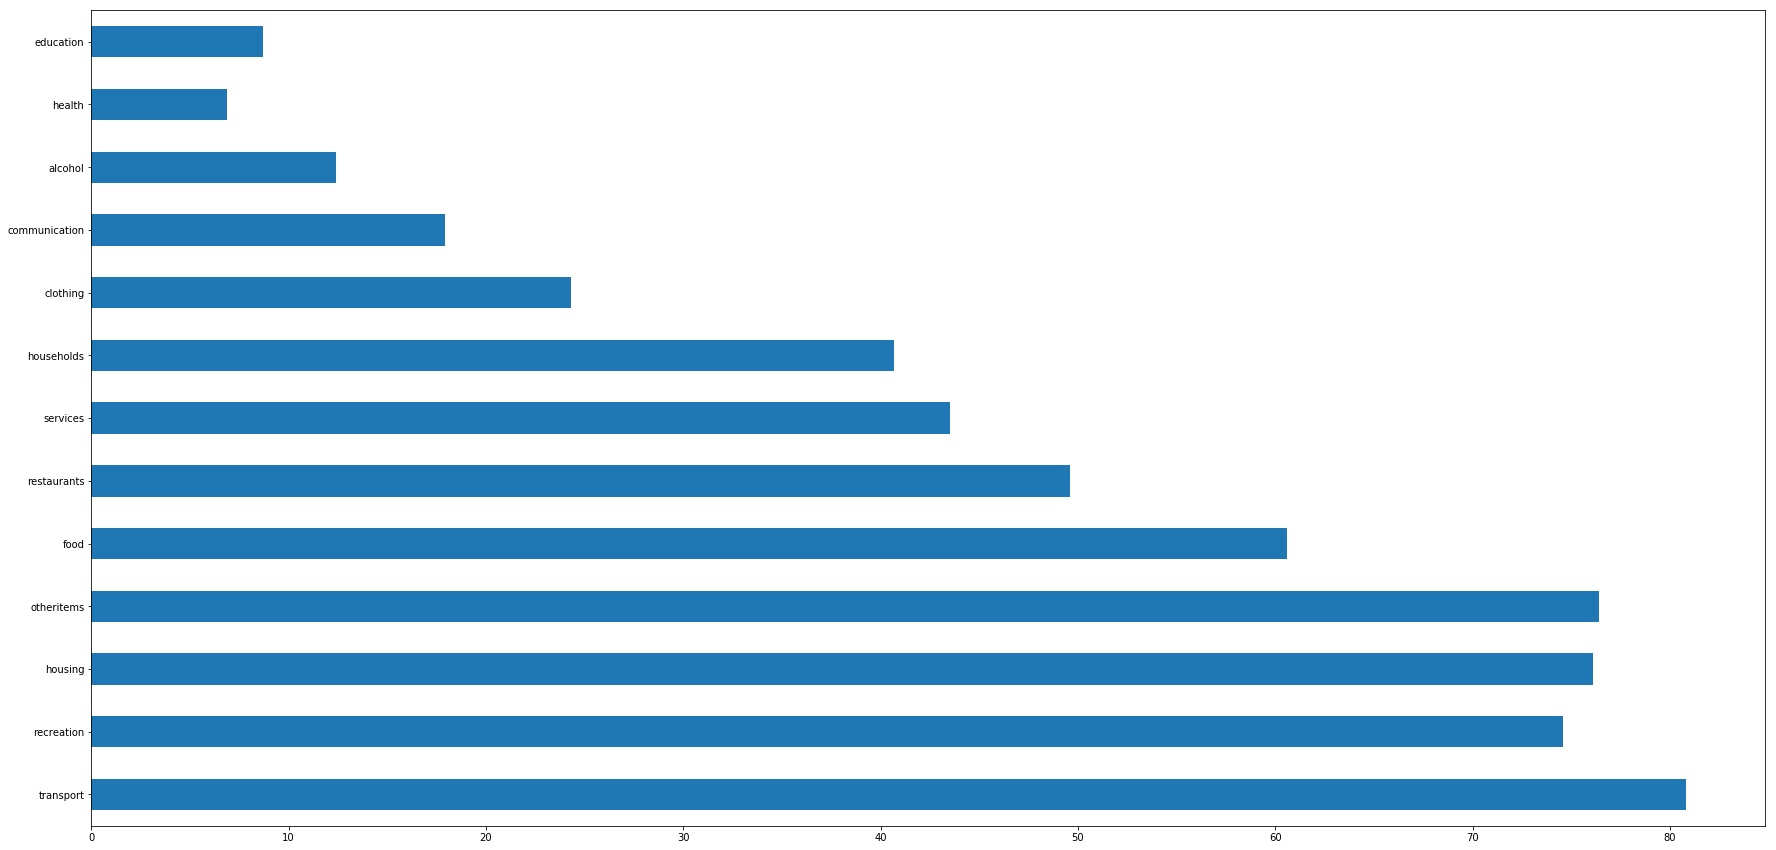

In [27]:
household2018=glv6df.iloc[16]
household2018
household2018.plot.barh(figsize=(30,15))

In [28]:
householdlist=list(household2018)
householdlist
household2018

transport        80.8
recreation       74.6
housing          76.1
otheritems       76.4
food             60.6
restaurants      49.6
services         43.5
households       40.7
clothing         24.3
communication    17.9
alcohol          12.4
health            6.9
education         8.7
Name: 2018, dtype: float64

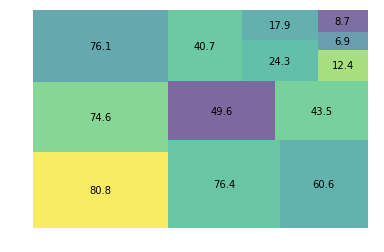

In [29]:
# If you have 2 lists
squarify.plot(sizes=household2018, label=householdlist, alpha=.7 )
plt.axis('off')
plt.show()
 




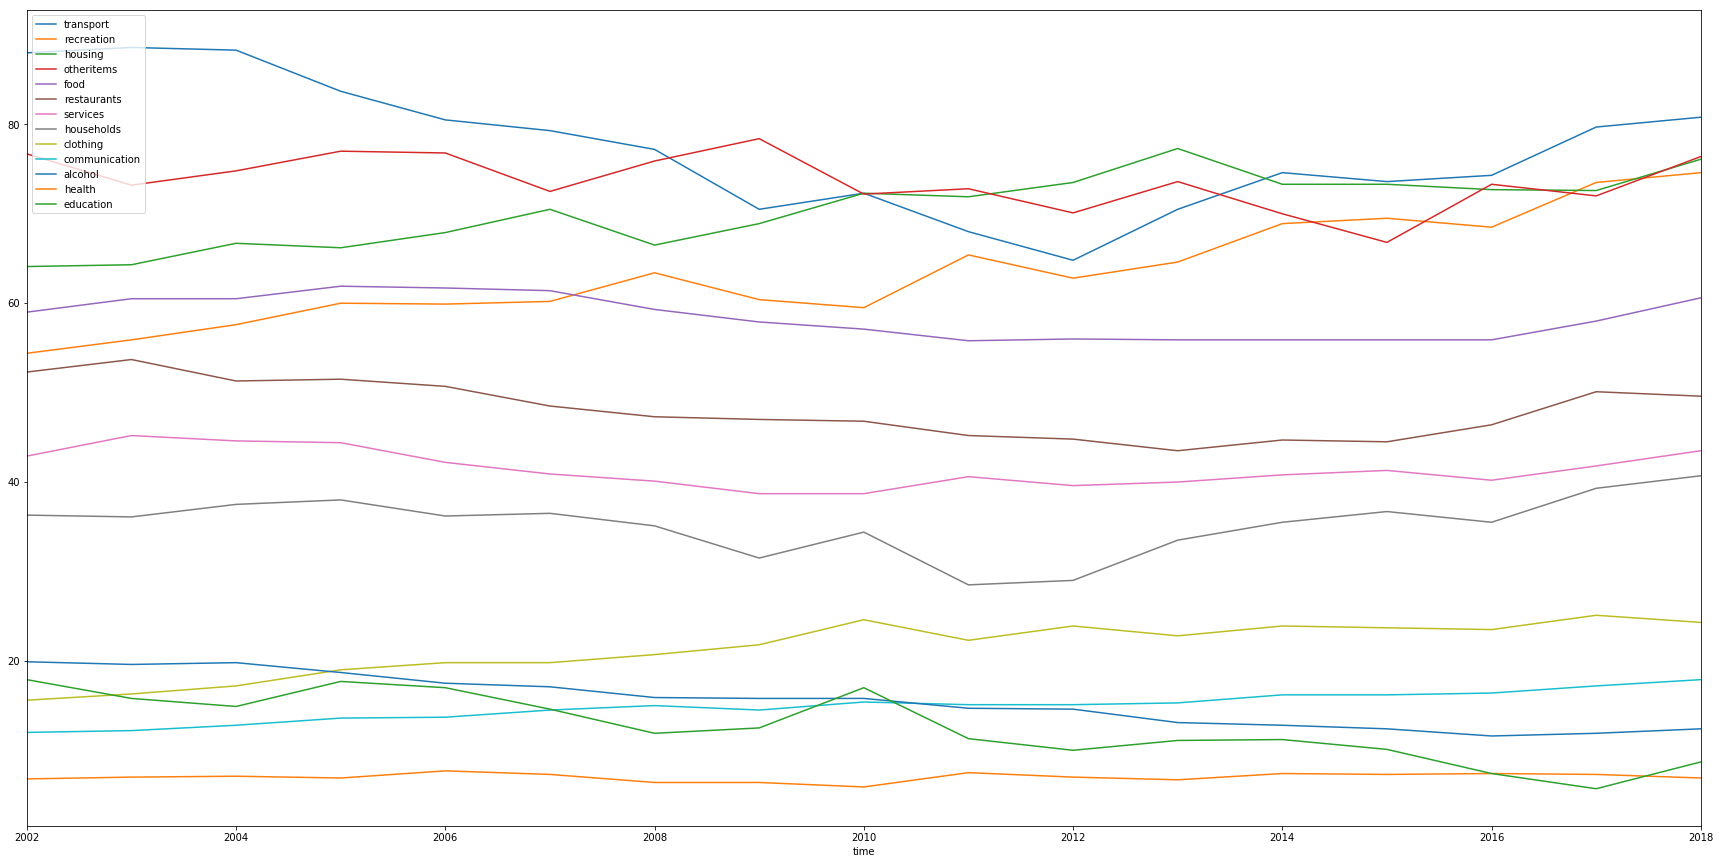

In [30]:
glv6df.plot.line(figsize=(30,15));

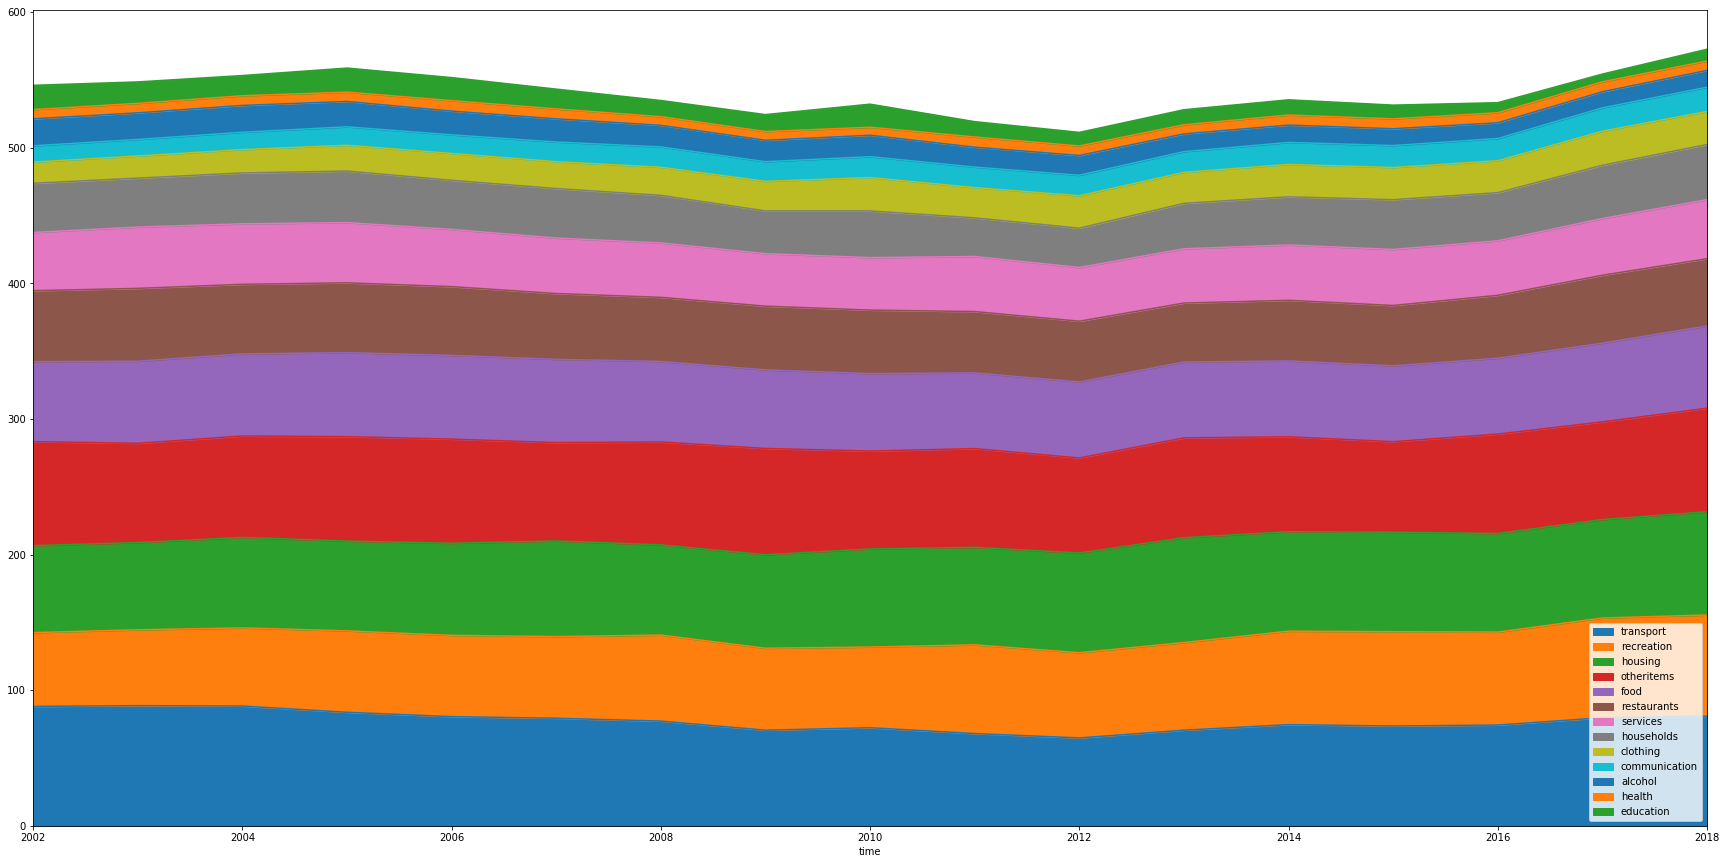

In [31]:
glv6df.plot.area(stacked=True, figsize=(30,15));

In [32]:
#################################
### Consumer confidence Index ###
#################################

colnames=['date', 'dated','CCIindex','cciref']
glv8df=pd.read_csv(r'D:\\retail\glvmodelcsv8.csv',names=colnames )
del glv8df['date']

glv8df.head()


dated  CCIindex  cciref
0  01/01/1974  98.34296    1.66
1  01/02/1974  98.37440    1.63
2  01/03/1974  98.43118    1.57
3  01/04/1974  98.53261    1.47
4  01/05/1974  98.63507    1.36

In [33]:
glv8df['time'] = pd.to_datetime(glv8df['dated']).dt.strftime('%d-%m%-Y%')
glv8df.drop(['dated'], axis=1, inplace=True)
glv8df.set_index('time', inplace=True) 
glv8df.head()

CCIindex  cciref
time                                 
1974-01-01 00:00:00  98.34296    1.66
1974-01-02 00:00:00  98.37440    1.63
1974-01-03 00:00:00  98.43118    1.57
1974-01-04 00:00:00  98.53261    1.47
1974-01-05 00:00:00  98.63507    1.36

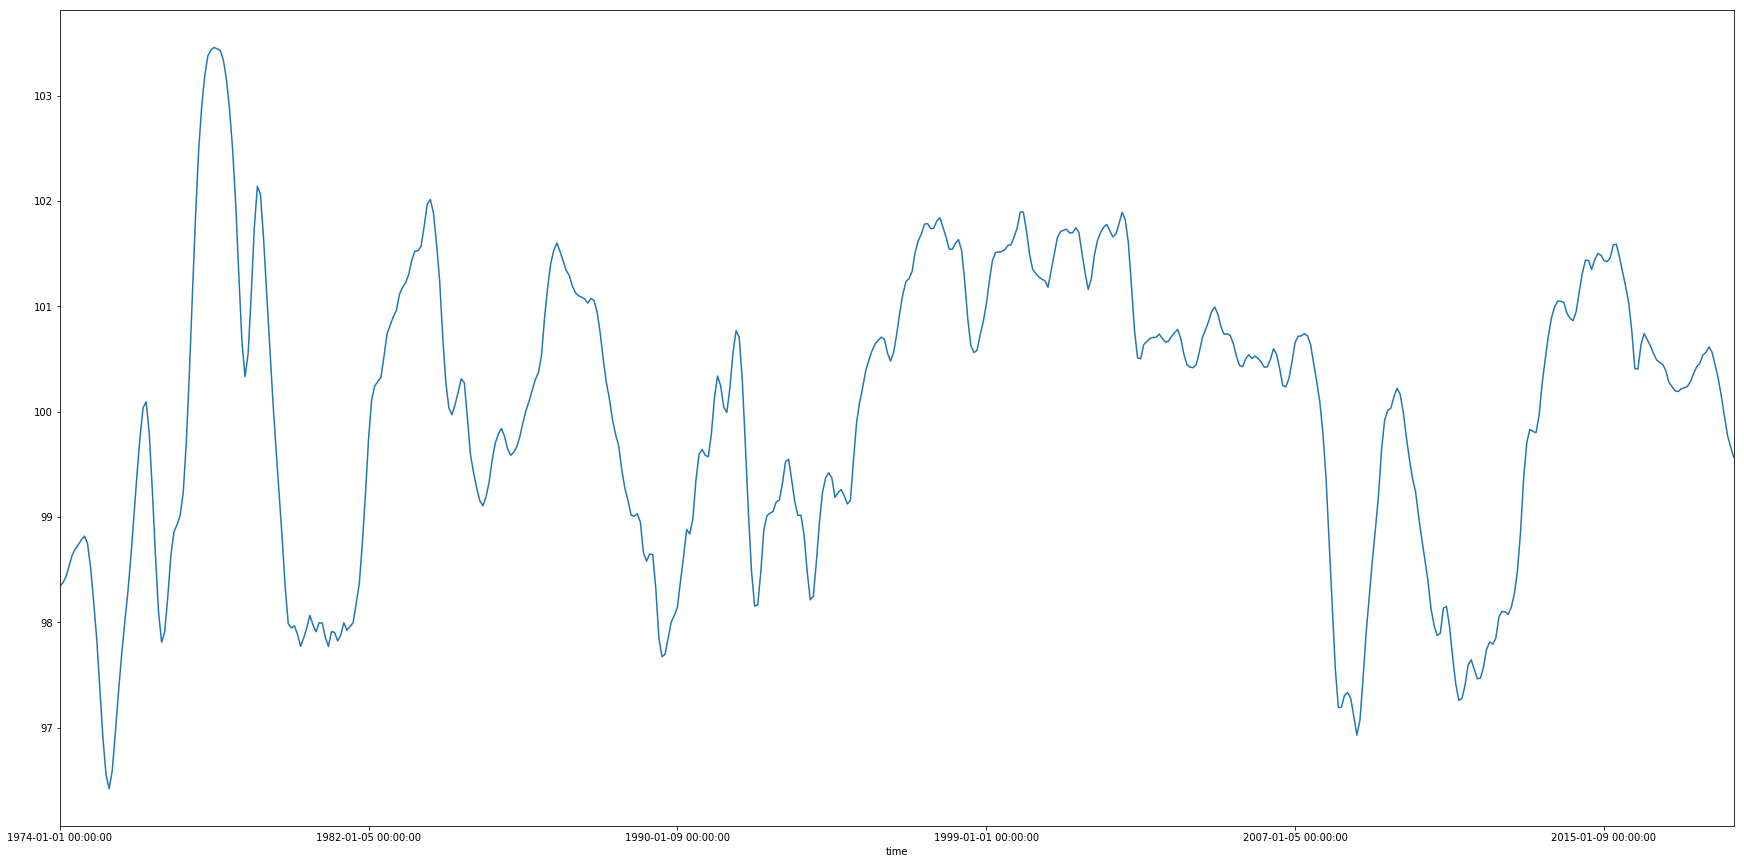

In [34]:
glv8df['CCIindex'].plot(figsize=(30,15))

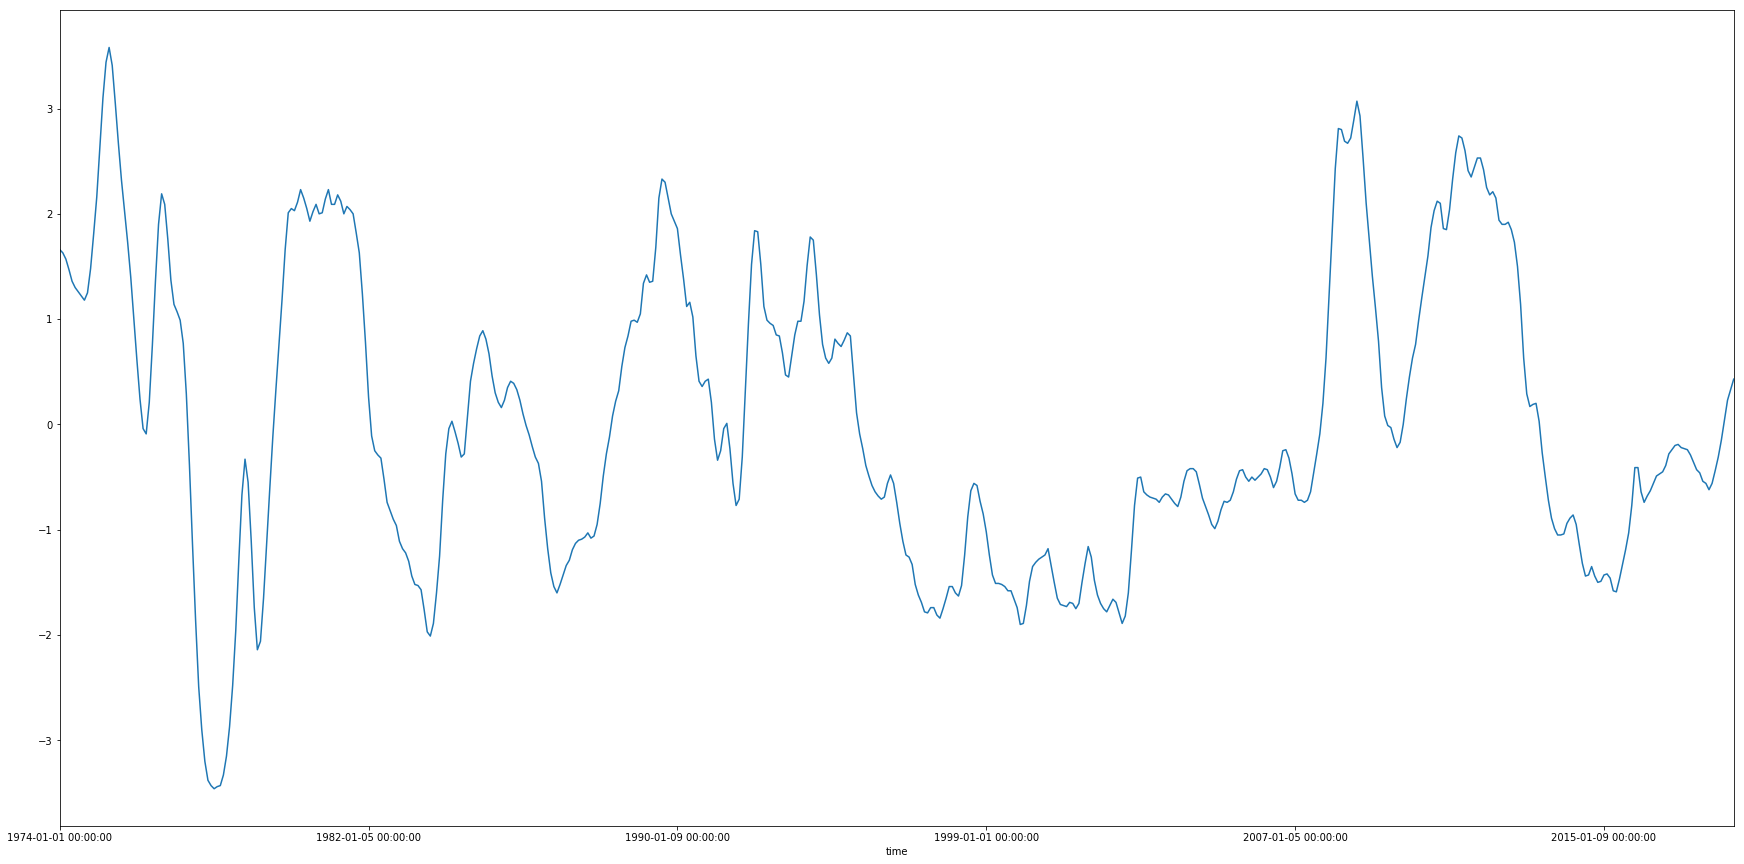

In [35]:
glv8df['cciref'].plot(figsize=(30,15))

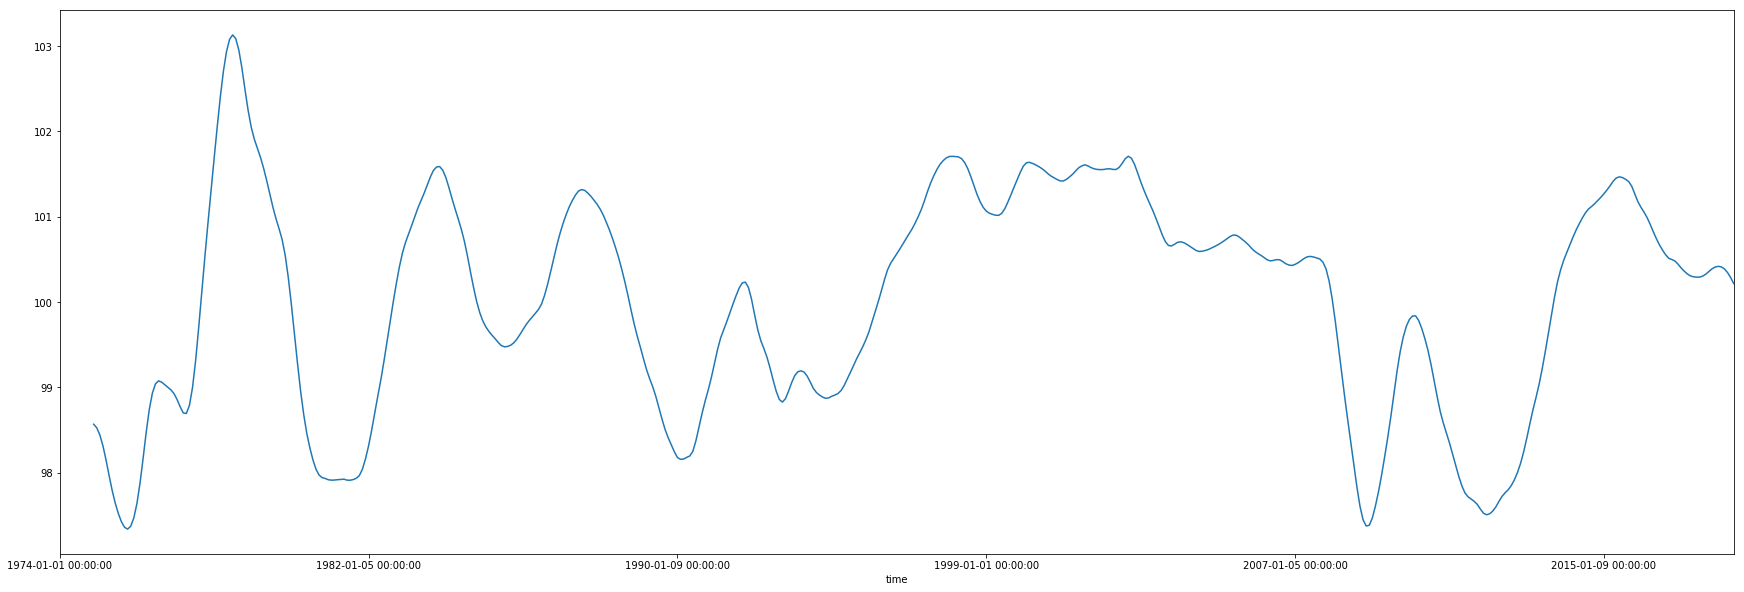

In [36]:
ccidf=glv8df.CCIindex.rolling(12).mean() 
ccidf.plot(figsize=(30,10))


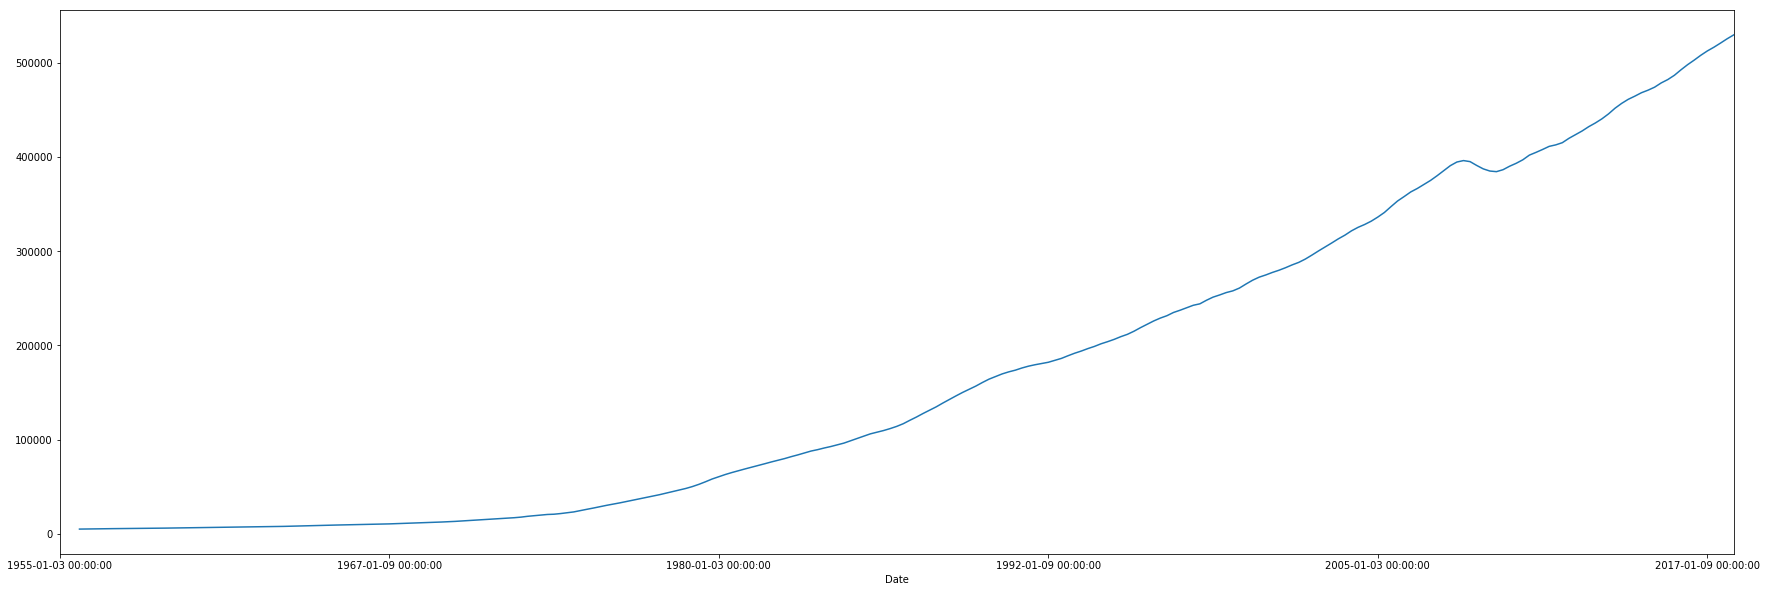

In [37]:
gdpidf=glv1df.GDP.rolling(4).mean() 
gdpidf.plot(figsize=(30,10))

In [38]:
#################################
### category sales store vs online 2018 ###
#################################
glv9df=pd.read_csv(r'D:\\retail\glvmodelcsv9.csv')
glv9df

category  Online      Store   % online     %store
0                           Food   8358.5  149704.3   5.288088  94.711912
1                       Non-food  20894.9  148040.6  12.368567  87.631433
2              Department stores   4862.1   29940.5  13.970508  86.029492
3                 Other non-food   4927.7   47363.3   9.423610  90.576390
4  Textile clothing and footwear   7353.4   41249.3  15.129612  84.870388
5                Household goods   3751.6   29487.5  11.286708  88.713292
6                      Non-store  30581.6    8516.5  78.217612  21.782388

In [39]:
#################################
### grocery marketshare  ###
#################################
glv10df=pd.read_csv(r'D:\\retail\glvmodel10.csv')
glv10df.head()

time  Tesco  Sainsbury's  Asda  Morrisons  Aldi  The Cooperative  Lidl  \
0  Jan-15   29.0         16.7  16.9       11.1   4.9              5.9   3.5   
1  Feb-15   28.7         16.8  17.0       11.0   5.0              5.9   3.5   
2  Mar-15   28.4         16.4  17.1       10.9   5.3              6.0   3.7   
3  Apr-15   28.4         16.5  16.9       10.9   5.4              6.0   3.8   
4  May-15   28.6         16.5  16.6       10.9   5.4              6.0   3.9   

   Waitrose  Iceland  Symbols  Other  
0       5.2      2.2      1.9    2.7  
1       5.2      2.2      2.0    2.8  
2       5.1      2.1      2.1    2.9  
3       5.1      2.1      2.0    2.9  
4       5.2      2.1      2.0    2.8

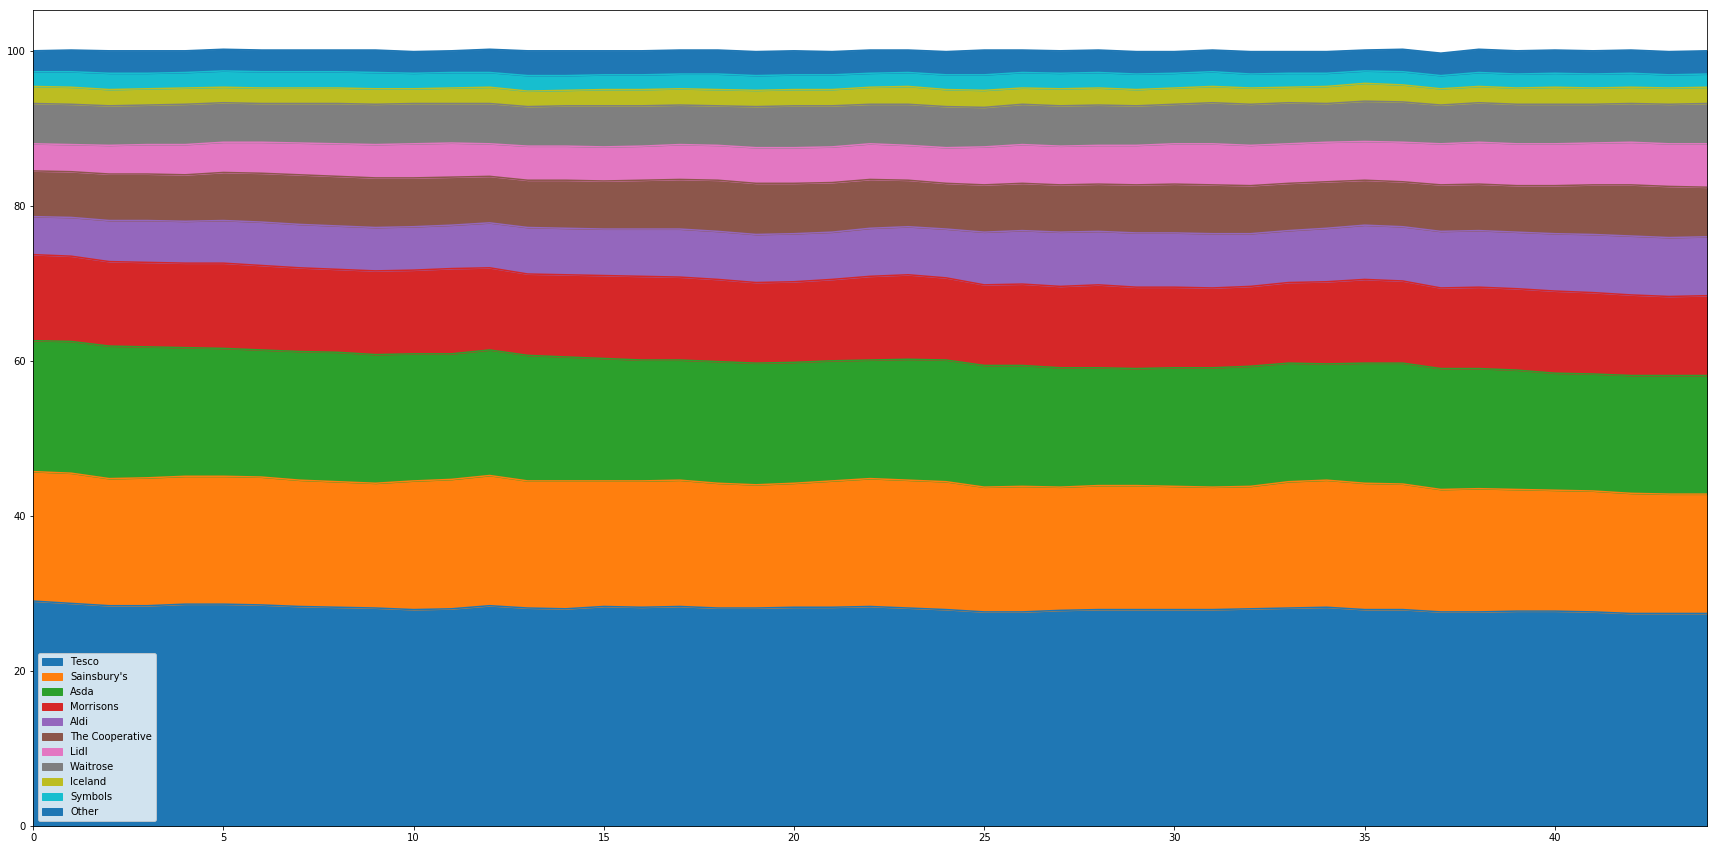

In [40]:
glv10df.plot.area(stacked=True, figsize=(30,15));

In [41]:
#################################
### grocery marketshare growthrate 2018  ###
#################################
glv11adf=pd.read_csv(r'D:\\retail\glvmodel11a.csv')
glv11adf

store  GrowthRate
0    Tesco    0.014681
1    Sains    0.045634
2     Asda    0.142167
3    Morri    0.220170
4     Aldi    0.341903
5     Coop    0.589467
6     Wait    0.001000
7     Lidl    0.660139
8    Other    0.372671
9  Iceland    0.001000

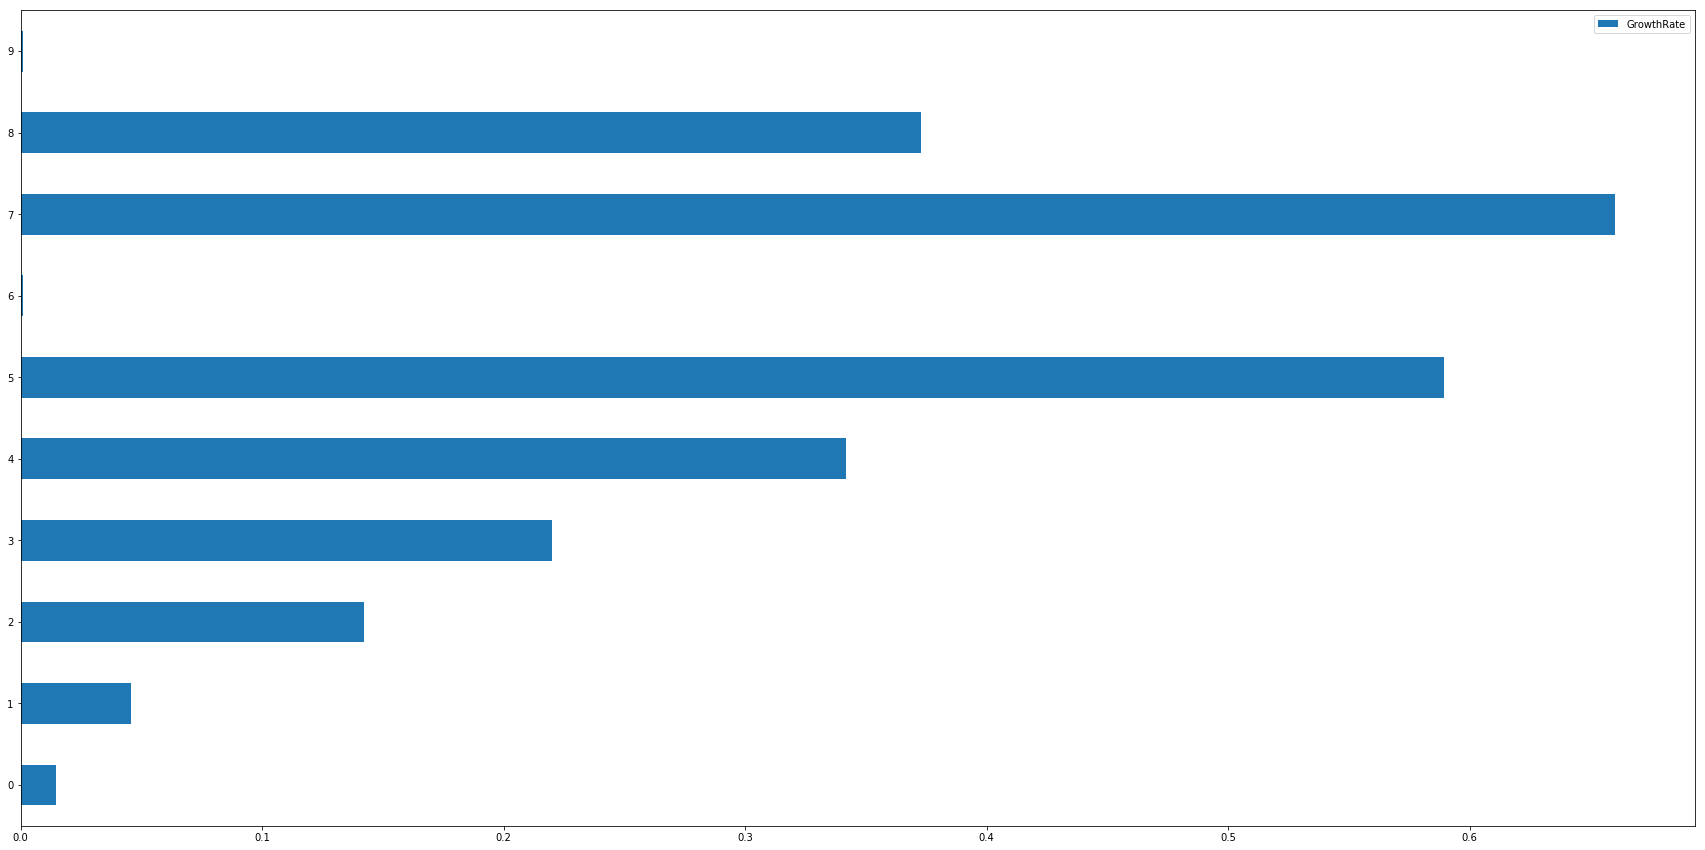

In [42]:
glv11adf.plot(kind='barh',figsize=(30,15))

In [43]:
#################################
### grocery marketshare interaction matrix  ###
#################################
def color_negative_red(val):
    color = 'red' if val < 0 else 'blue'
    return 'color: %s' % color

glv11bdf=pd.read_csv(r'D:\\retail\glvmodel11b.csv')
glv11bdf.set_index('store', inplace=True)
glv11bdf.style.applymap(color_negative_red)


In [44]:
glv11bdf.to_numpy()

array([[-2.6113100e-04, -2.6361500e-04, -7.6748900e-04,  8.6544700e-04,
         9.7308500e-04, -7.2560000e-04,  3.7651070e-03, -1.4681990e-03,
        -4.7338400e-04, -6.2630970e-03],
       [-4.4812700e-04, -1.5872440e-03, -1.6384500e-03,  2.2670110e-03,
        -2.8751880e-03, -8.6675000e-04,  4.6098270e-03,  2.2300980e-03,
        -1.9080670e-03, -5.0725570e-03],
       [-2.1651930e-03, -4.4070900e-04,  0.0000000e+00, -4.2762060e-03,
        -4.9383460e-03,  1.7715550e-03, -1.0461319e-02,  3.2747610e-03,
        -3.9161670e-03,  1.9651980e-02],
       [-8.8810100e-04, -4.4001900e-03, -3.2060230e-03,  0.0000000e+00,
        -5.7875860e-03, -4.6989940e-03, -1.7891890e-03,  2.4322930e-03,
        -3.9420900e-04, -4.0570760e-03],
       [-4.0210850e-03, -5.6800000e-05, -2.1830750e-03, -6.6915590e-03,
        -3.7253320e-03, -4.5663590e-03, -1.5140104e-02, -2.6650020e-03,
         4.7719000e-04,  9.3612730e-03],
       [-2.7162470e-03, -9.8804990e-03, -6.3210510e-03, -3.0380210e-03,
   

In [45]:
#################################
### grocery initial marketshare 2018  ###
#################################
glv11cdf=pd.read_csv(r'D:\\retail\glvmodel11c.csv')
glv11cdf.head()

Initialmarketshare  percent
0              Tesco     29.0
1              Sains     16.7
2               Asda     16.9
3              Morri     11.1
4               Aldi      4.9

In [46]:
#################################
### grocery marketshare data 2018  ###
#################################
glv12df=pd.read_csv(r'D:\\retail\glvmodel12.csv')
glv12df.head()

store  GrowthRate  initial     Tesco     Sains      Asda     Morri  \
0  Tesco    0.014681     29.0 -0.000261 -0.000264 -0.000767  0.000865   
1  Sains    0.045634     16.7 -0.000448 -0.001587 -0.001638  0.002267   
2   Asda    0.142167     16.9 -0.002165 -0.000441  0.000000 -0.004276   
3  Morri    0.220170     11.1 -0.000888 -0.004400 -0.003206  0.000000   
4   Aldi    0.341903      4.9 -0.004021 -0.000057 -0.002183 -0.006692   

       Aldi      Coop      Wait      Lidl     Other   Iceland  
0  0.000973 -0.000726  0.003765 -0.001468 -0.000473 -0.006263  
1 -0.002875 -0.000867  0.004610  0.002230 -0.001908 -0.005073  
2 -0.004938  0.001772 -0.010461  0.003275 -0.003916  0.019652  
3 -0.005788 -0.004699 -0.001789  0.002432 -0.000394 -0.004057  
4 -0.003725 -0.004566 -0.015140 -0.002665  0.000477  0.009361

In [47]:
#################################
### marketshare growthrate 2018  ###
#################################
glv13df=pd.read_csv(r'D:\\retail\glvmodel13.csv')
glv13df

time  John Lewis  Marks and Spencer  Debenhams  Harrods  Selfridges  \
0  2007        19.4               32.6       16.6      5.1         5.3   
1  2012        22.4               29.1       15.8      7.8         7.3   
2  2017        25.0               23.3       14.4     11.4         9.6   

   House of Fraser  Fenwick  Harvey Nichols  Fortum and mason  Liberty  
0              8.2      2.8             1.6               0.3      0.3  
1              7.9      2.2             1.5               0.7      0.7  
2              7.8      2.2             1.5               0.6      0.6

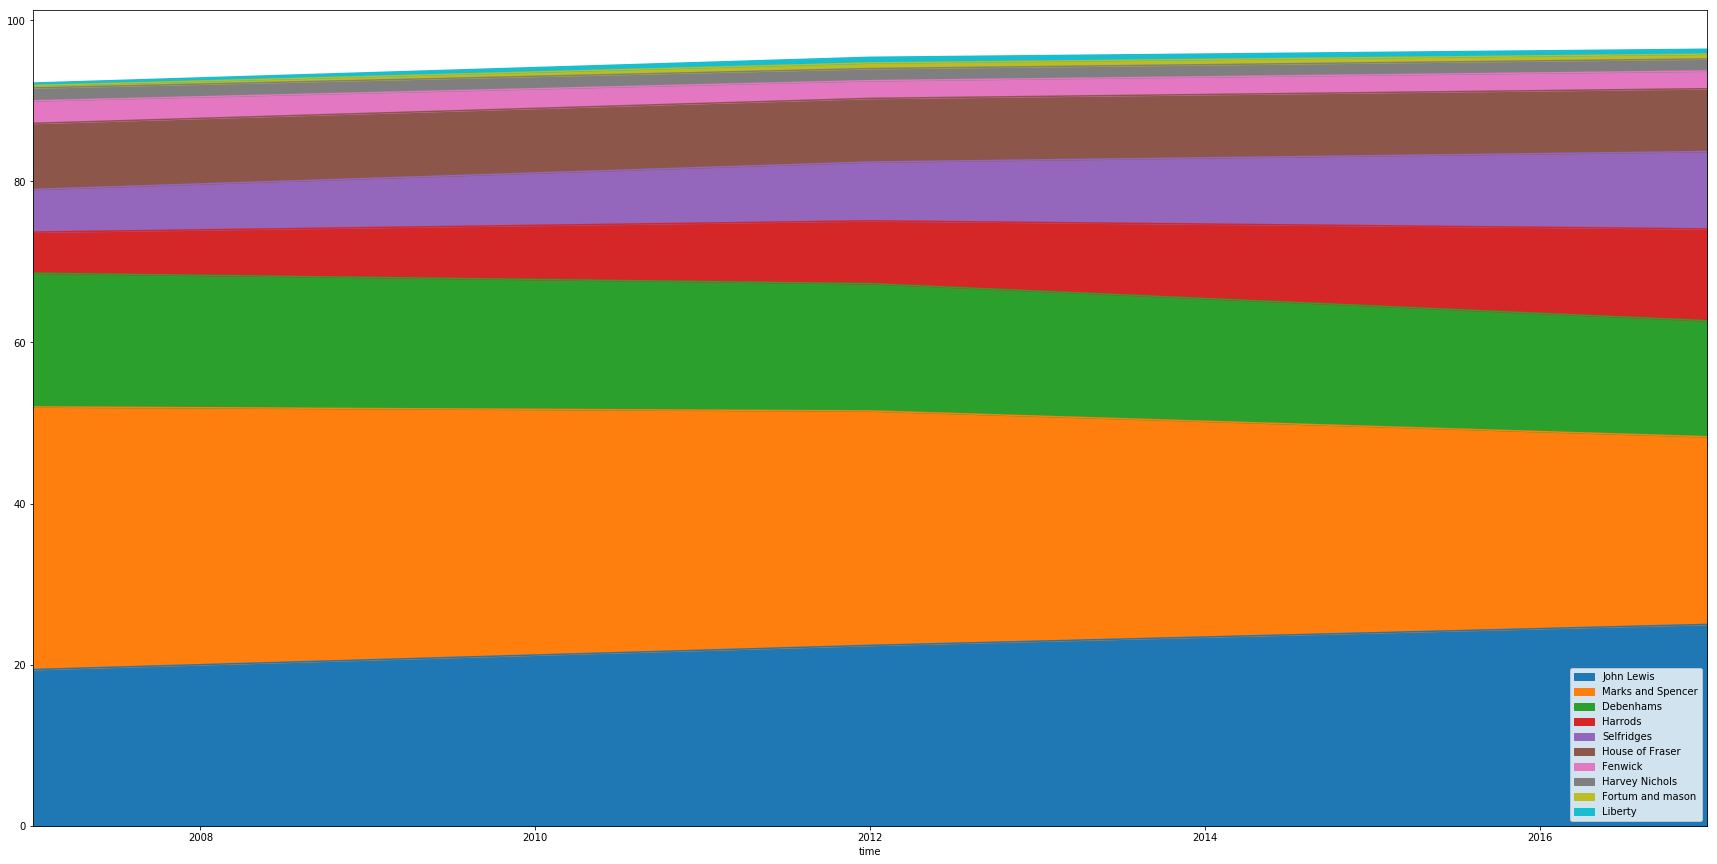

In [48]:
glv13df.set_index('time', inplace=True) 
glv13df.plot.area(stacked=True, figsize=(30,15));

In [49]:
#################################
### marketshare growthrate 2018  ###
#################################
glv15df=pd.read_csv(r'D:\\retail\glvmodel15.csv')
glv15df.set_index('store', inplace=True) 
glv15df.style.applymap(color_negative_red)

In [50]:
glv16df=pd.read_csv(r'D:\\retail\glvmodel16.csv')
glv16df.set_index('time', inplace=True)
glv16df.head()

percentonline  percentstore
time                             
2007            3.4          96.6
2008            4.9          95.1
2009            6.2          93.8
2010            7.3          92.7
2011            8.3          91.7

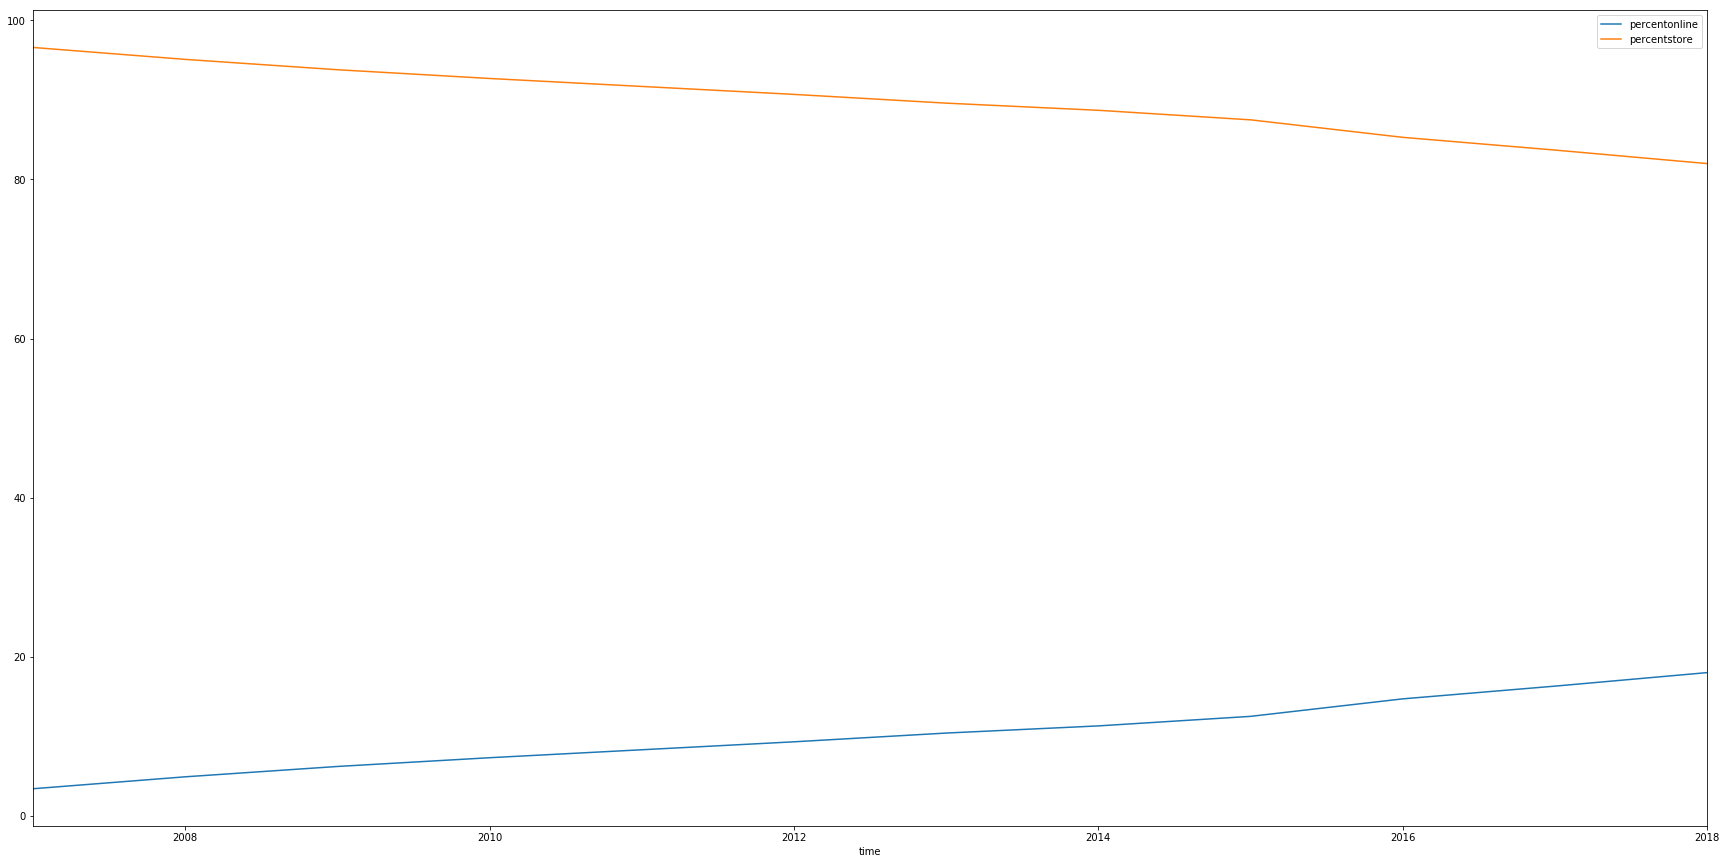

In [51]:
glv16df.plot(figsize=(30,15))

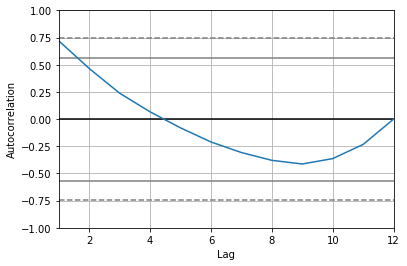

In [52]:
## Online marketshare  ##

riseofonline = glv16df['percentonline']
autocorrelation_plot(riseofonline)

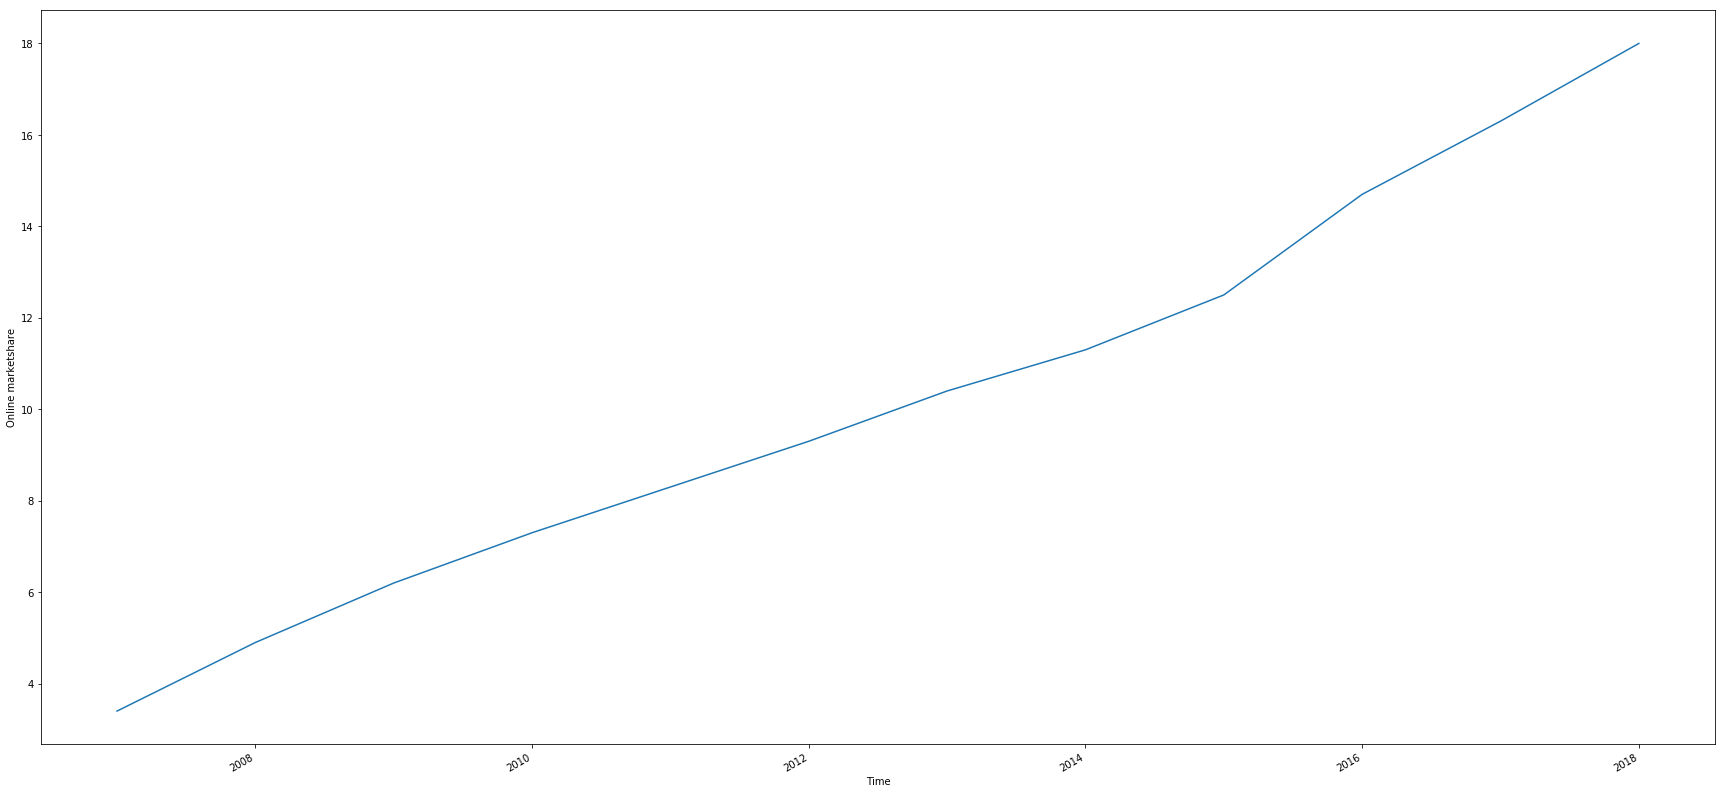

In [53]:
## plot graph
fig= plt.figure(figsize=(30,15))
plt.xlabel('Time')
plt.ylabel('Online marketshare')
fig.autofmt_xdate()
plt.plot(riseofonline) 

In [54]:
#Test value ~ critical value => stationary series
#Perform Augmented Dickey–Fuller test:
X=riseofonline.values
print('Results of Dickey Fuller Test:')
dftest = adfuller(X, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 0.000000
p-value                        0.958532
#Lags Used                     5.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                             ARIMA Model Results                              
Dep. Variable:        D.percentonline   No. Observations:                   11
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  -3.613
Method:                       css-mle   S.D. of innovations              0.333
Date:                Wed, 12 Jun 2019   AIC                             13.226
Time:                        18:37:10   BIC                             14.420
Sample:                             1   HQIC                            12.474
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.3607      0.169      8.041      0.000       1.029       1.692
ar.L1.D.percentonline     0.4341      0.269      1.617      0.140      -0.092       0.960
        

C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


               0
count  11.000000
mean   -0.005499
std     0.349603
min    -0.347505
25%    -0.219210
50%    -0.121144
75%     0.089330
max     0.909085


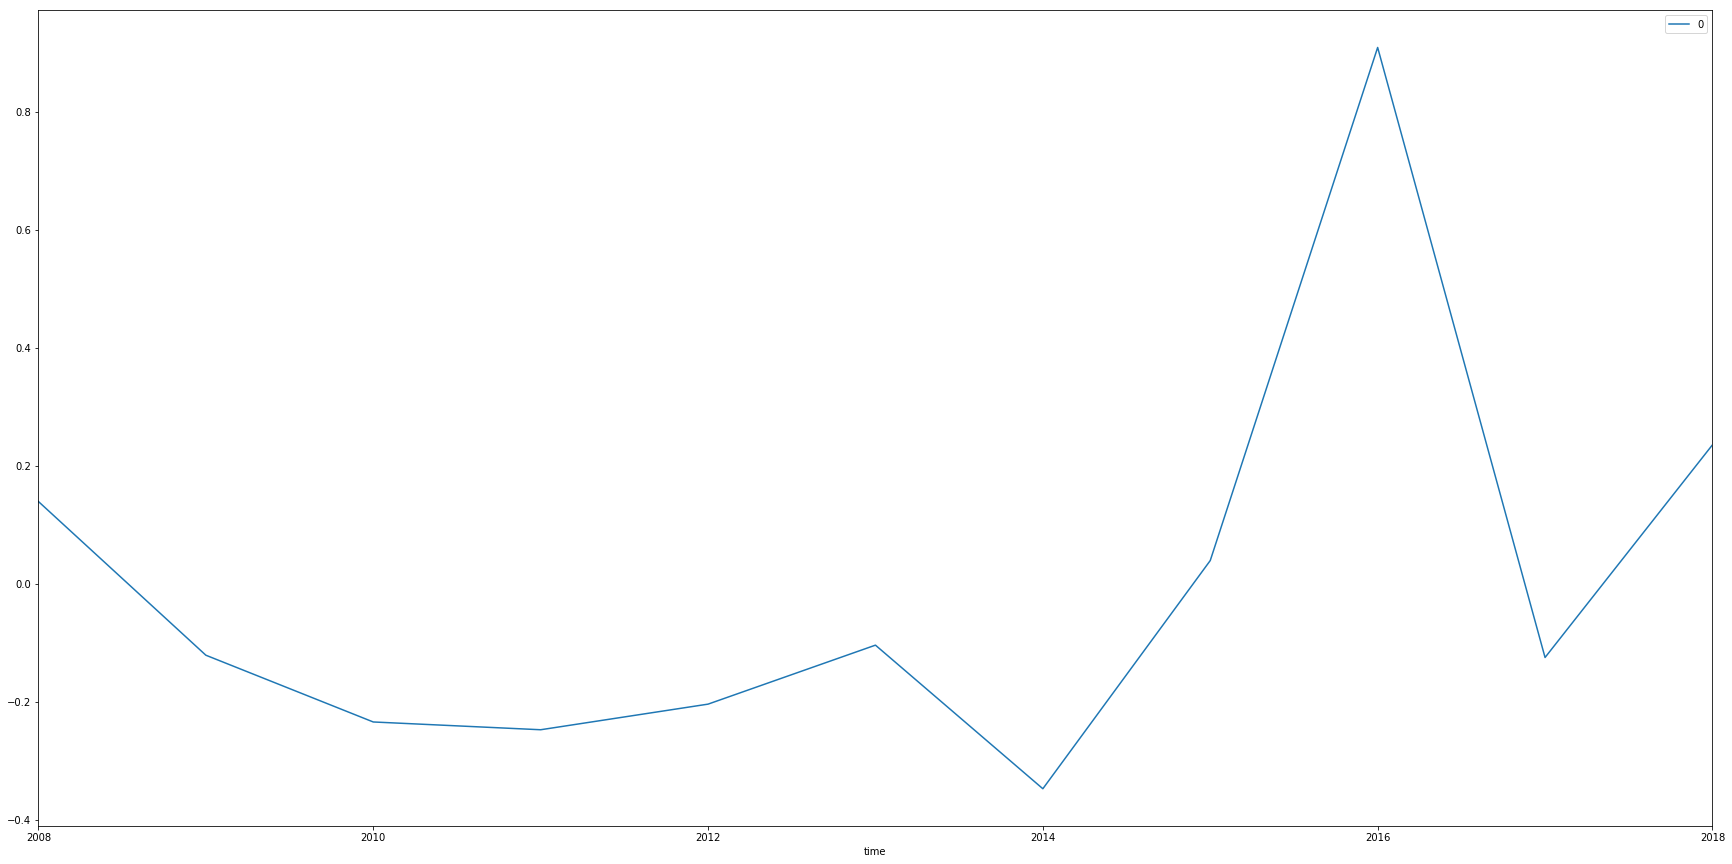

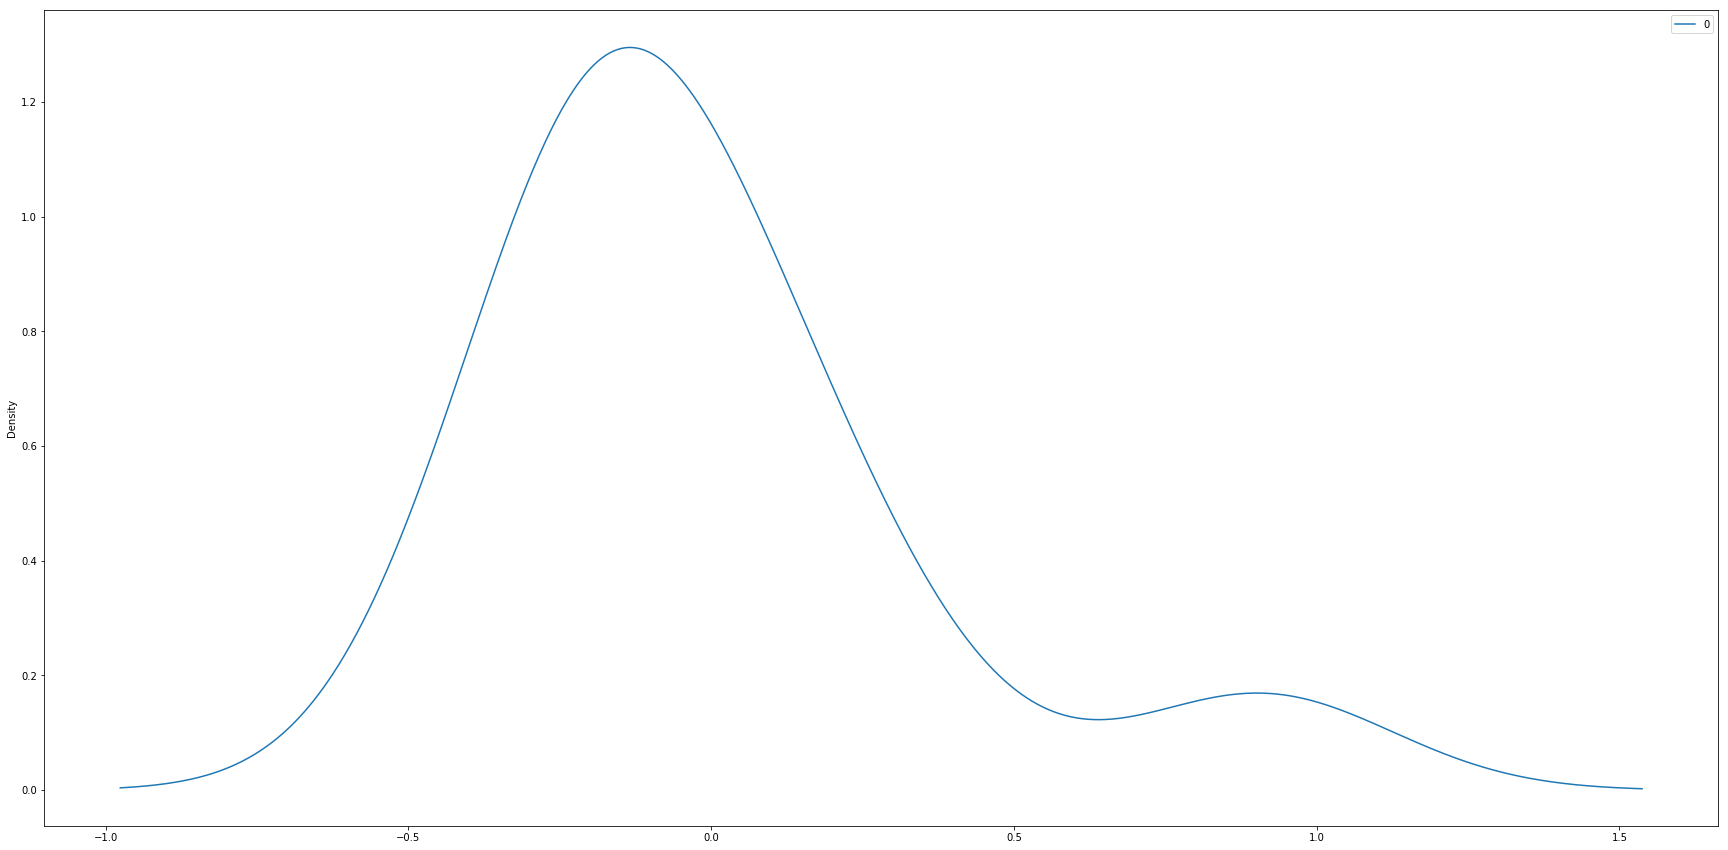

In [55]:
#ARIMA fit online marketshare
model = ARIMA(riseofonline, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(30,15))
residuals.plot(kind='kde', figsize=(30,15))
print(residuals.describe())    
    

In [56]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [57]:
indexdf = pd.date_range(start='2007', periods=12, freq='A') 
indexdf=indexdf.to_period()


X=riseofonline
X.index = indexdf


In [58]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(X,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:87.05550868978047
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:71.90101815142448
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:36.61138119530295
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:26.74840878112562
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:19.03935856979445
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:13.9736786882142
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:13.97267908478944
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:14.885569982978984


In [59]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))



print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMA:',pdq[0])
print('ARIMA:',pdq[1])
print('ARIMA:',pdq[2])


Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (0, 0, 0)
ARIMA: (0, 0, 1)
ARIMA: (0, 1, 0)


In [60]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.ARIMA(X,
                                            order=param)
                                            #seasonal_order=param_seasonal,
                                            #enforce_stationarity=False,
                                            #enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA:',param, results.aic)
        except:
            continue

ARIMA: (0, 0, 0) 73.38761710703048
ARIMA: (0, 0, 1) 64.85331104362322
ARIMA: (0, 1, 0) 13.458763444613261
ARIMA: (0, 1, 1) 13.498527725019521
ARIMA: (1, 0, 0) 65.07159965953048
ARIMA: (1, 1, 0) 13.225996522575084
ARIMA: (1, 1, 1) 15.216546703540086


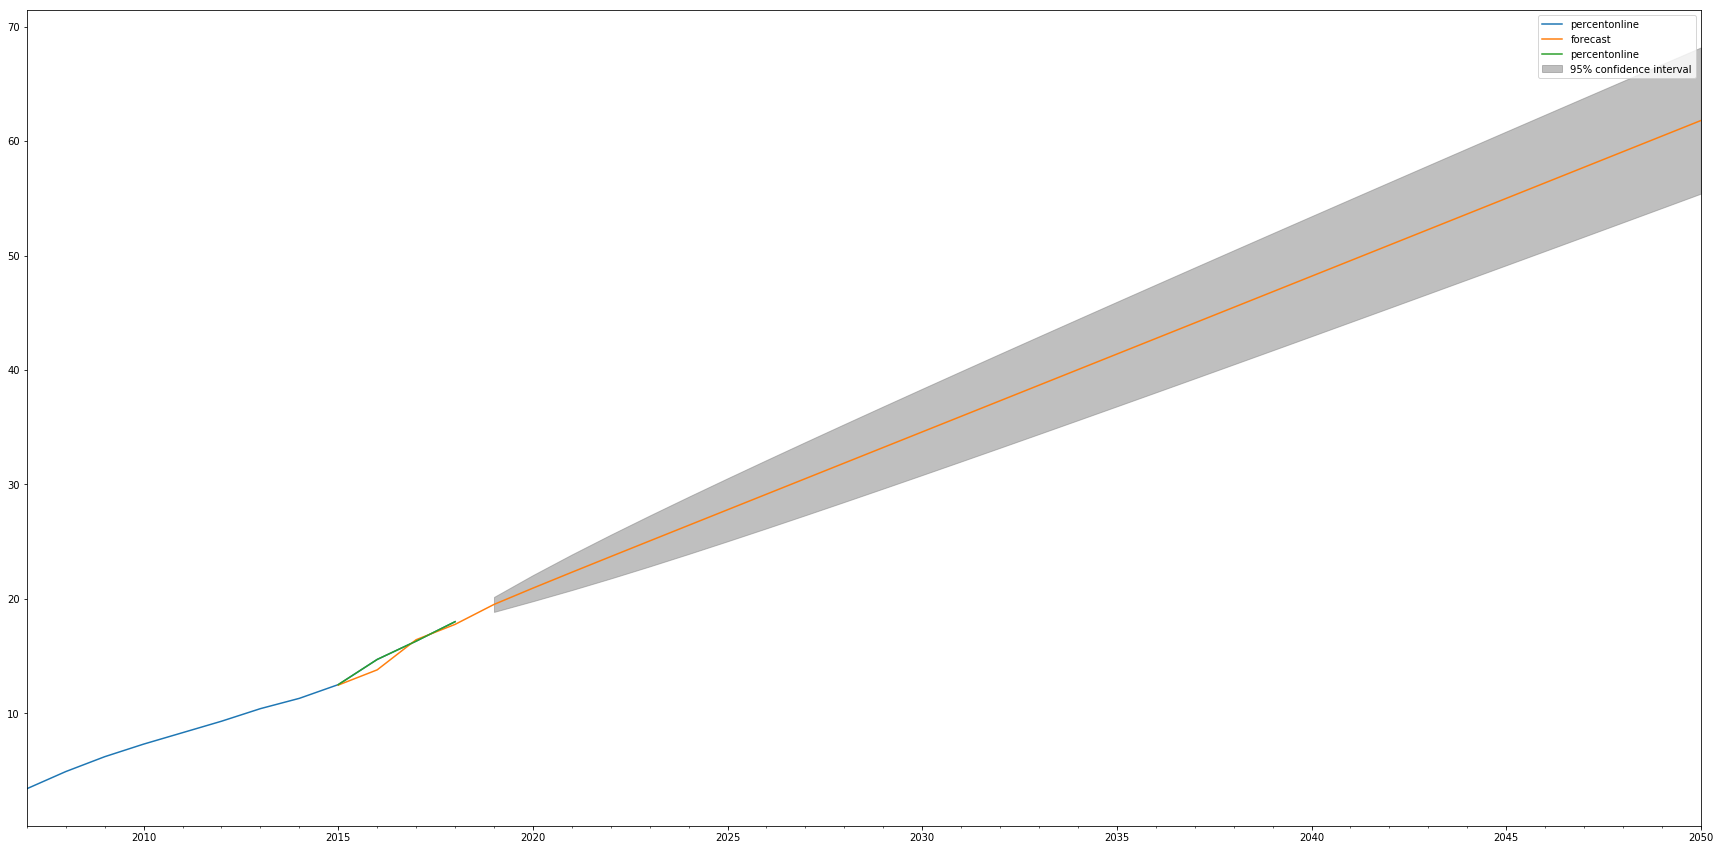

                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.3607      0.169      8.041      0.000       1.029       1.692
ar.L1.D.percentonline     0.4341      0.269      1.617      0.140      -0.092       0.960


In [61]:
####grid search (or hyperparameter optimization) for model selection####
####ARIMA(0, 0, 1)x(0, 1, 0, 12)12
import statsmodels.api as sm
#sm.tsa.ARIMA()



mod = sm.tsa.ARIMA(riseofonline,order=(1, 1, 0))
results = mod.fit()
fig, ax = plt.subplots()
ax = X.loc['2007':].plot(ax=ax)
fig = results.plot_predict('2015', '2050', dynamic=False, ax=ax, plot_insample=True)
fig.set_size_inches(30,15)
plt.show()



print(results.summary().tables[1])

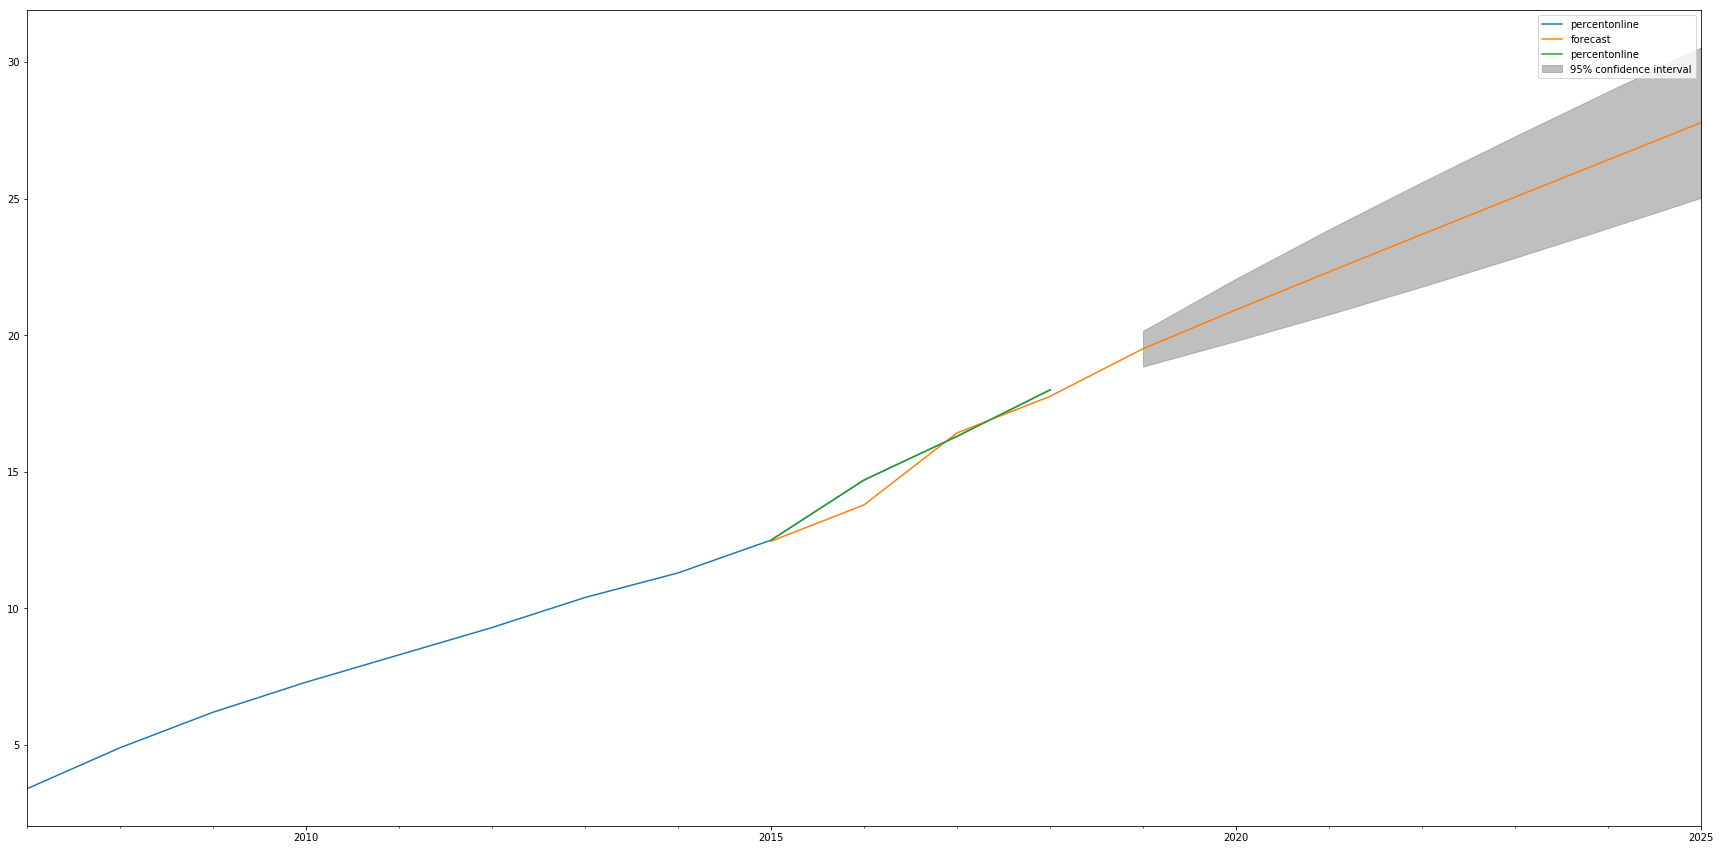

In [62]:
X=riseofonline
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (1, 1, 0)).fit()
fig, ax = plt.subplots(figsize=(30,15))
ax = X.loc['2007':].plot(ax=ax)
fig = res.plot_predict('2015', '2025', dynamic=False, ax=ax, plot_insample=True)

plt.show()

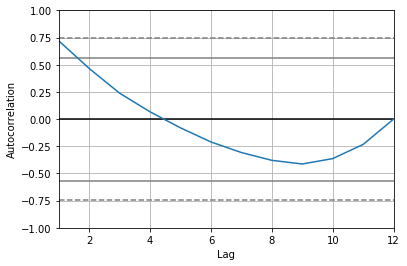

In [63]:
###Instore marketshare###

## Online marketshare  ##

fallofinstore = glv16df['percentstore']
autocorrelation_plot(fallofinstore)

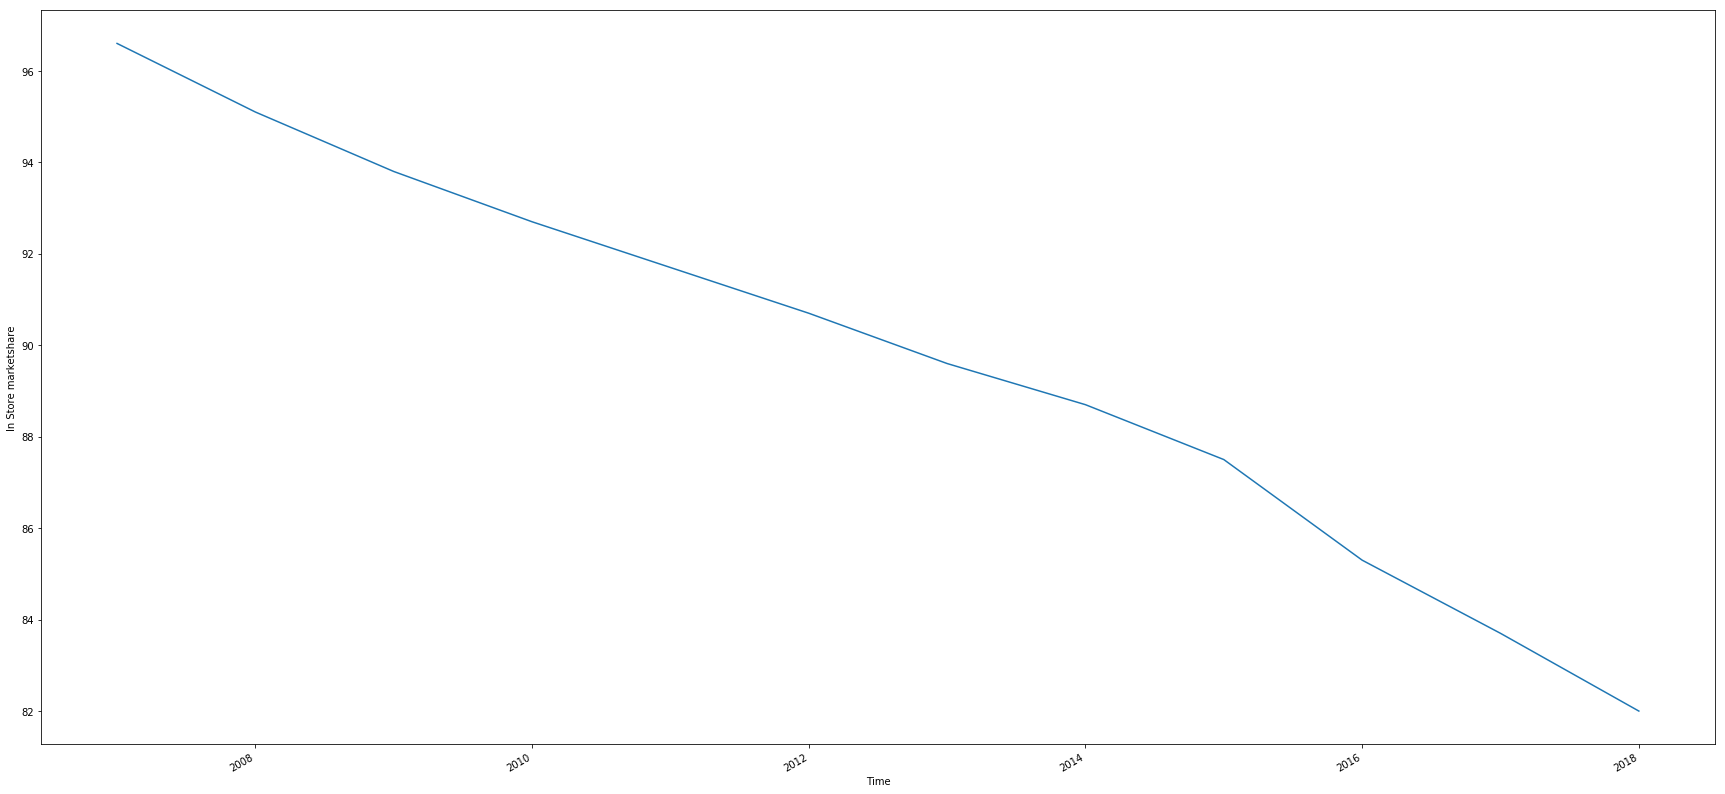

In [64]:
## plot graph
fig= plt.figure(figsize=(30,15))
plt.xlabel('Time')
plt.ylabel('In Store marketshare')
fig.autofmt_xdate()
plt.plot(fallofinstore) 

In [65]:
#Test value ~ critical value => stationary series
#Perform Augmented Dickey–Fuller test:
X=fallofinstore.values
print('Results of Dickey Fuller Test:')
dftest = adfuller(X, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     6.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64


                             ARIMA Model Results                              
Dep. Variable:         D.percentstore   No. Observations:                   11
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  -3.613
Method:                       css-mle   S.D. of innovations              0.333
Date:                Wed, 12 Jun 2019   AIC                             13.226
Time:                        18:37:18   BIC                             14.420
Sample:                             1   HQIC                            12.474
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3607      0.169     -8.041      0.000      -1.692      -1.029
ar.L1.D.percentstore     0.4341      0.269      1.617      0.140      -0.092       0.960
            

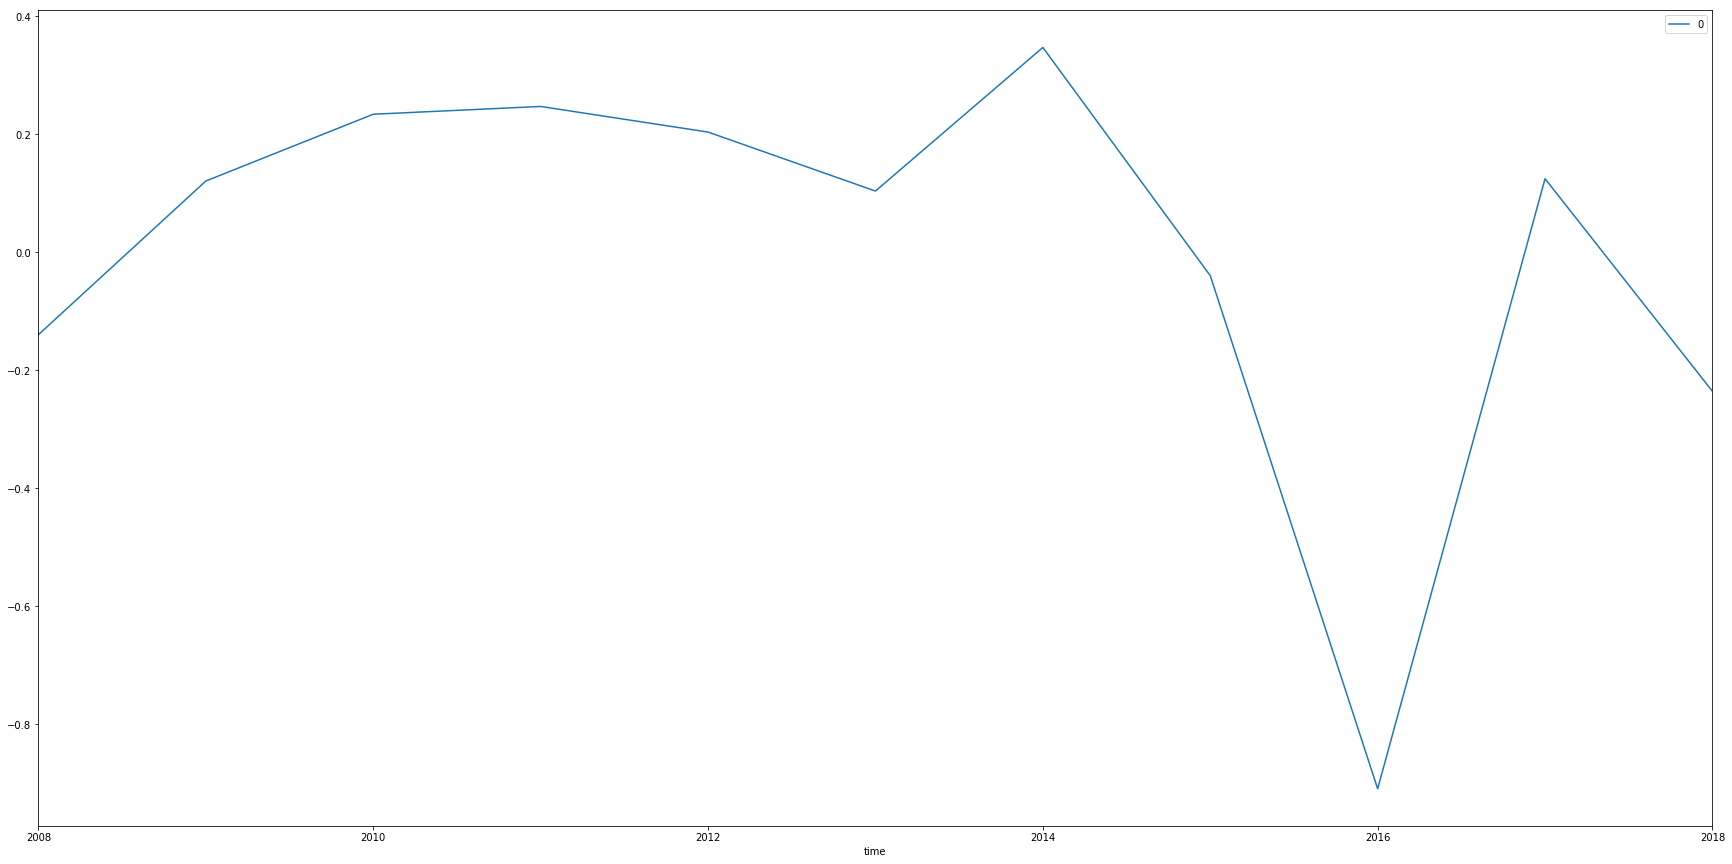

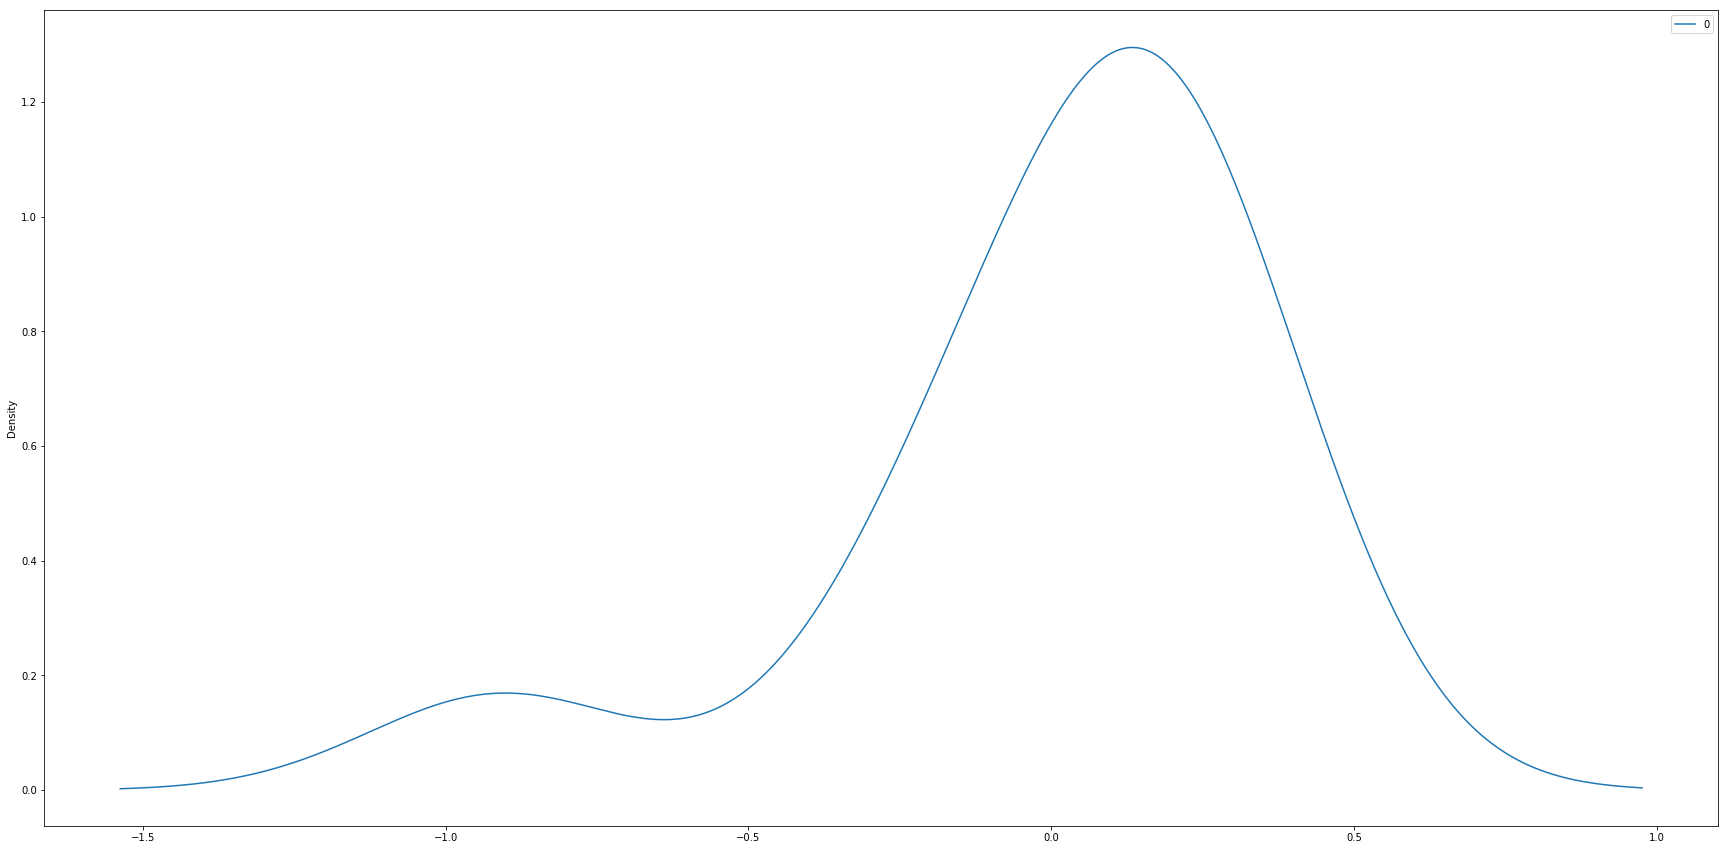

In [66]:
#ARIMA fit instore marketshare
model = ARIMA(fallofinstore, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(30,15))
residuals.plot(kind='kde', figsize=(30,15))
print(residuals.describe()) 

In [67]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [68]:
indexdf = pd.date_range(start='2007', periods=12, freq='A') 
indexdf=indexdf.to_period()


X=fallofinstore
X.index = indexdf


In [69]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(X,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:132.02933984242964
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:111.45590133580895
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:36.61138119530294
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:26.748408781130593
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:15.053212709866619
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:14.71415433567203
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:13.972679084789812
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:14.885565855989332


In [70]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))



print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMA:',pdq[0])
print('ARIMA:',pdq[1])
print('ARIMA:',pdq[2])


Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (0, 0, 0)
ARIMA: (0, 0, 1)
ARIMA: (0, 1, 0)


In [71]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.ARIMA(X,
                                            order=param)
                                            #seasonal_order=param_seasonal,
                                            #enforce_stationarity=False,
                                            #enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA:',param, results.aic)
        except:
            continue

ARIMA: (0, 0, 0) 73.38761710703048
ARIMA: (0, 0, 1) 64.85331095207134
ARIMA: (0, 1, 0) 13.45876344461334
ARIMA: (0, 1, 1) 13.498527725019656
ARIMA: (1, 0, 0) 50.91298727499958
ARIMA: (1, 1, 0) 13.225996522575258


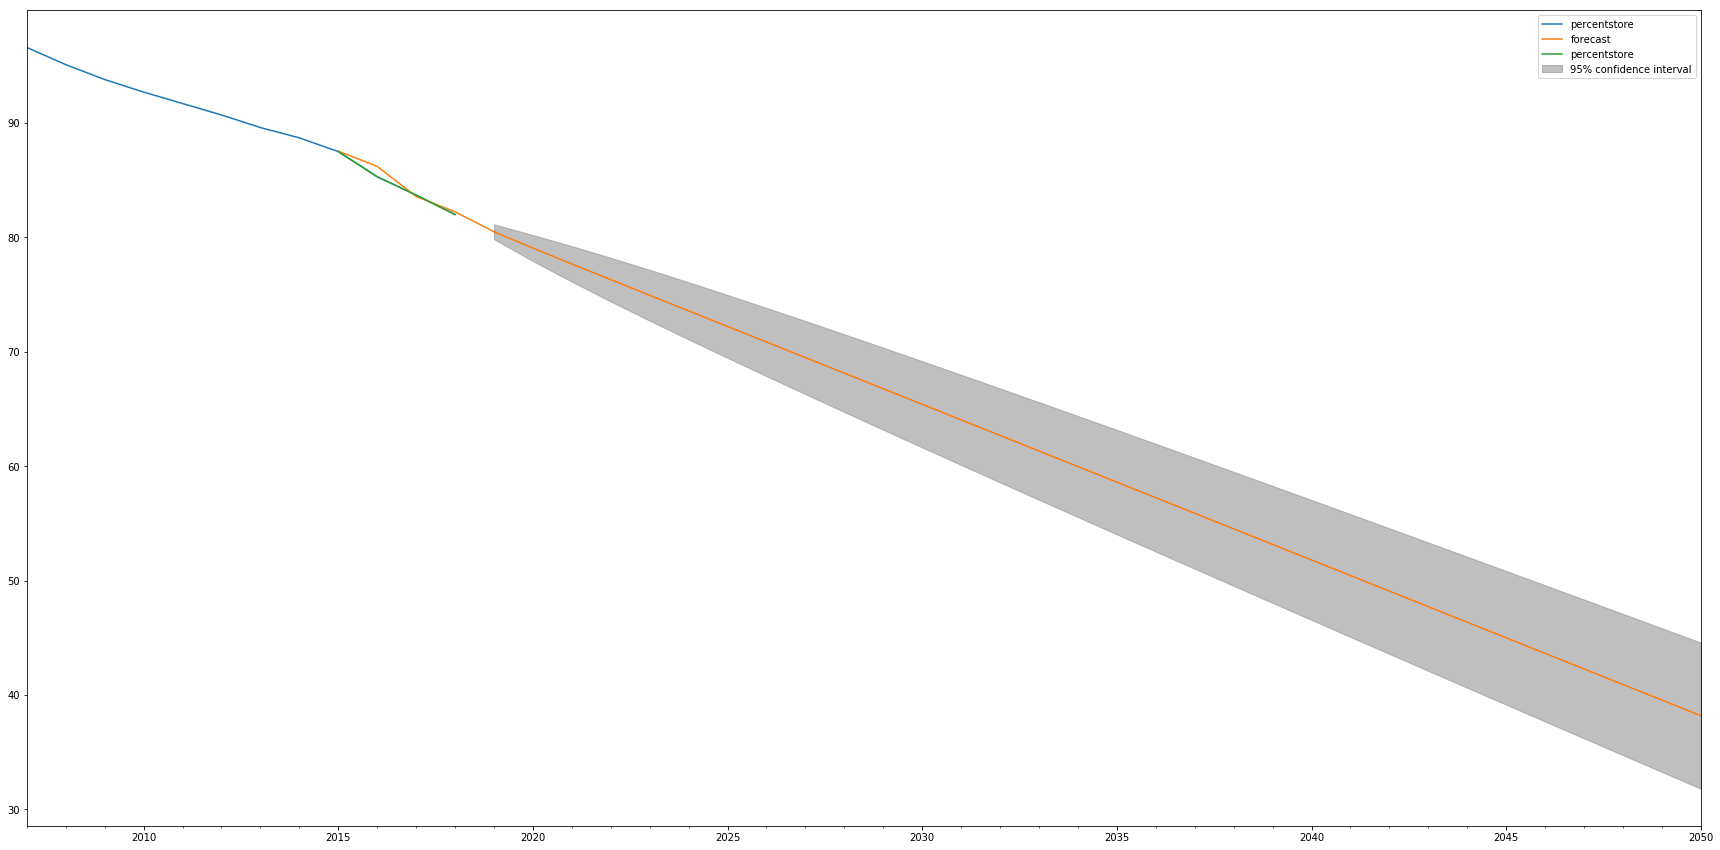

                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3607      0.169     -8.041      0.000      -1.692      -1.029
ar.L1.D.percentstore     0.4341      0.269      1.617      0.140      -0.092       0.960


In [72]:
####grid search (or hyperparameter optimization) for model selection####
####ARIMA(0, 0, 1)x(0, 1, 0, 12)12
import statsmodels.api as sm
#sm.tsa.ARIMA()



mod = sm.tsa.ARIMA(fallofinstore,order=(1, 1, 0))
results = mod.fit()
fig, ax = plt.subplots()
ax = X.loc['2007':].plot(ax=ax)
fig = results.plot_predict('2015', '2050', dynamic=False, ax=ax, plot_insample=True)
fig.set_size_inches(30,15)
plt.show()



print(results.summary().tables[1])

In [73]:
#Grocery Marketshare Predictive model

In [74]:
#glv10df.set_index('time', inplace=True) 


In [75]:
series = pd.read_csv(r'D:\\retail\glvmodel10.csv')

     time  Tesco  Sainsbury's  Asda  Morrisons  Aldi  The Cooperative  Lidl  \
0  Jan-15   29.0         16.7  16.9       11.1   4.9              5.9   3.5   
1  Feb-15   28.7         16.8  17.0       11.0   5.0              5.9   3.5   
2  Mar-15   28.4         16.4  17.1       10.9   5.3              6.0   3.7   
3  Apr-15   28.4         16.5  16.9       10.9   5.4              6.0   3.8   
4  May-15   28.6         16.5  16.6       10.9   5.4              6.0   3.9   

   Waitrose  Iceland  Symbols  Other  
0       5.2      2.2      1.9    2.7  
1       5.2      2.2      2.0    2.8  
2       5.1      2.1      2.1    2.9  
3       5.1      2.1      2.0    2.9  
4       5.2      2.1      2.0    2.8  


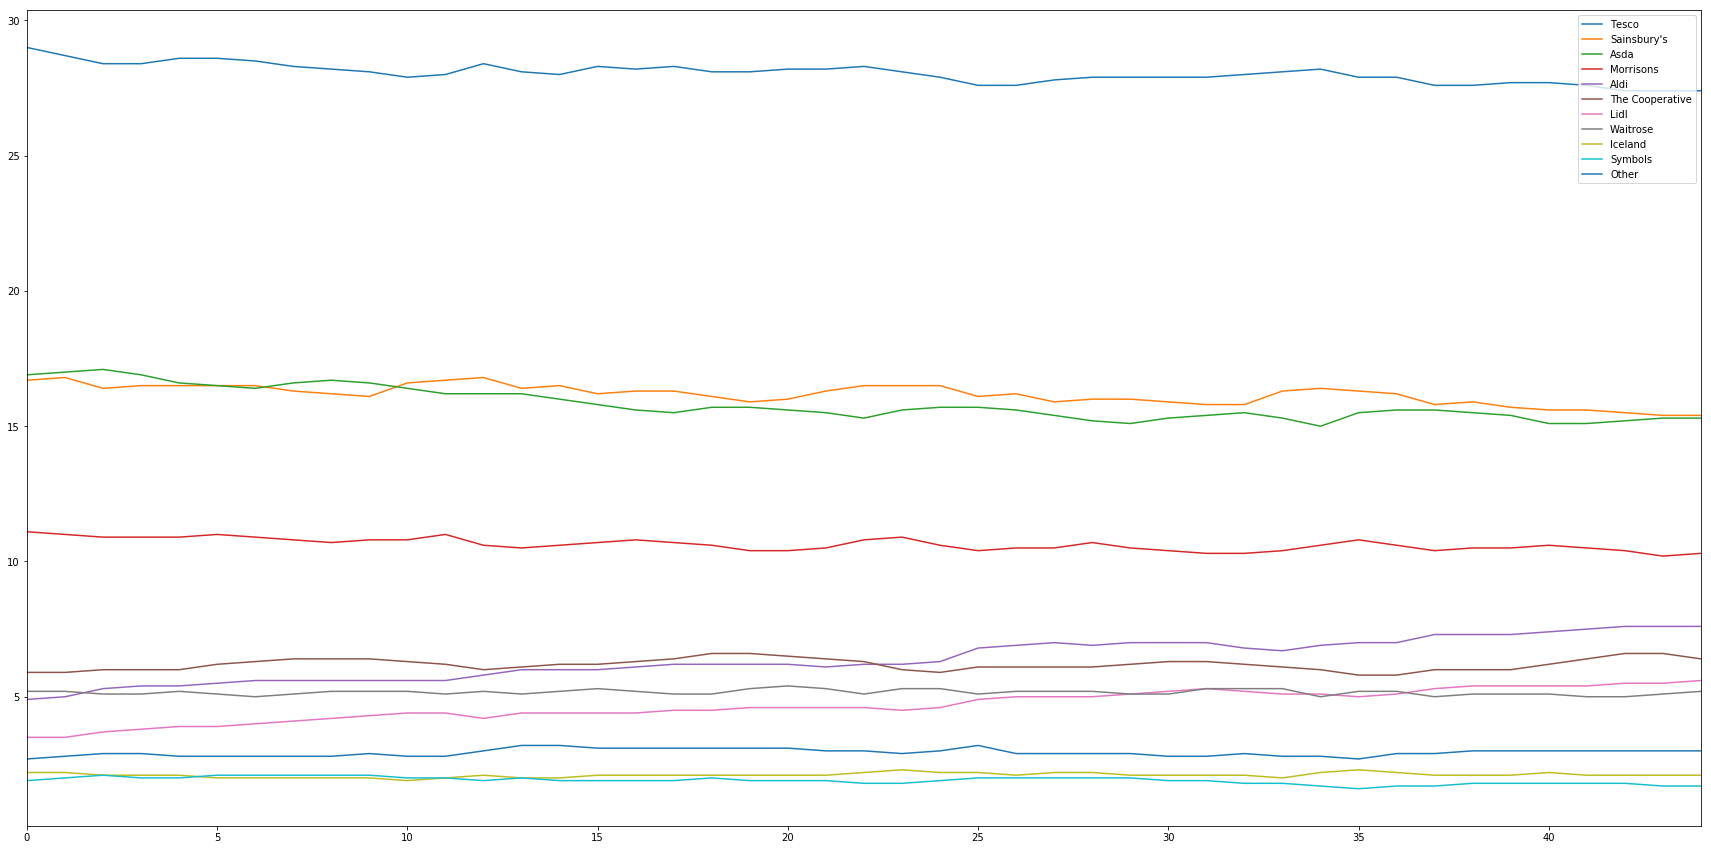

In [76]:
print(series.head())
series.plot(figsize=(30,15))

In [77]:
glv10adf = pd.read_csv(r'D:\\retail\glvmodel10a.csv')

In [78]:
#Parse strings to datetime type
glv10adf['time'] = pd.to_datetime(glv10adf['time']).dt.strftime('%d-%m%-Y%') #convert from string to datetime
glv10adf = glv10adf.set_index(['time'])
glv10adf.head(5)

Tesco  Sainsburys  Asda  Morrisons  Aldi  \
time                                                            
2015-01-01 00:00:00   29.0        16.7  16.9       11.1   4.9   
2015-01-02 00:00:00   28.7        16.8  17.0       11.0   5.0   
2015-01-03 00:00:00   28.4        16.4  17.1       10.9   5.3   
2015-01-04 00:00:00   28.4        16.5  16.9       10.9   5.4   
2015-01-05 00:00:00   28.6        16.5  16.6       10.9   5.4   

                     The Cooperative  Lidl  Waitrose  Iceland  Symbols  Other  
time                                                                           
2015-01-01 00:00:00              5.9   3.5       5.2      2.2      1.9    2.7  
2015-01-02 00:00:00              5.9   3.5       5.2      2.2      2.0    2.8  
2015-01-03 00:00:00              6.0   3.7       5.1      2.1      2.1    2.9  
2015-01-04 00:00:00              6.0   3.8       5.1      2.1      2.0    2.9  
2015-01-05 00:00:00              6.0   3.9       5.2      2.1      2.0    2.8

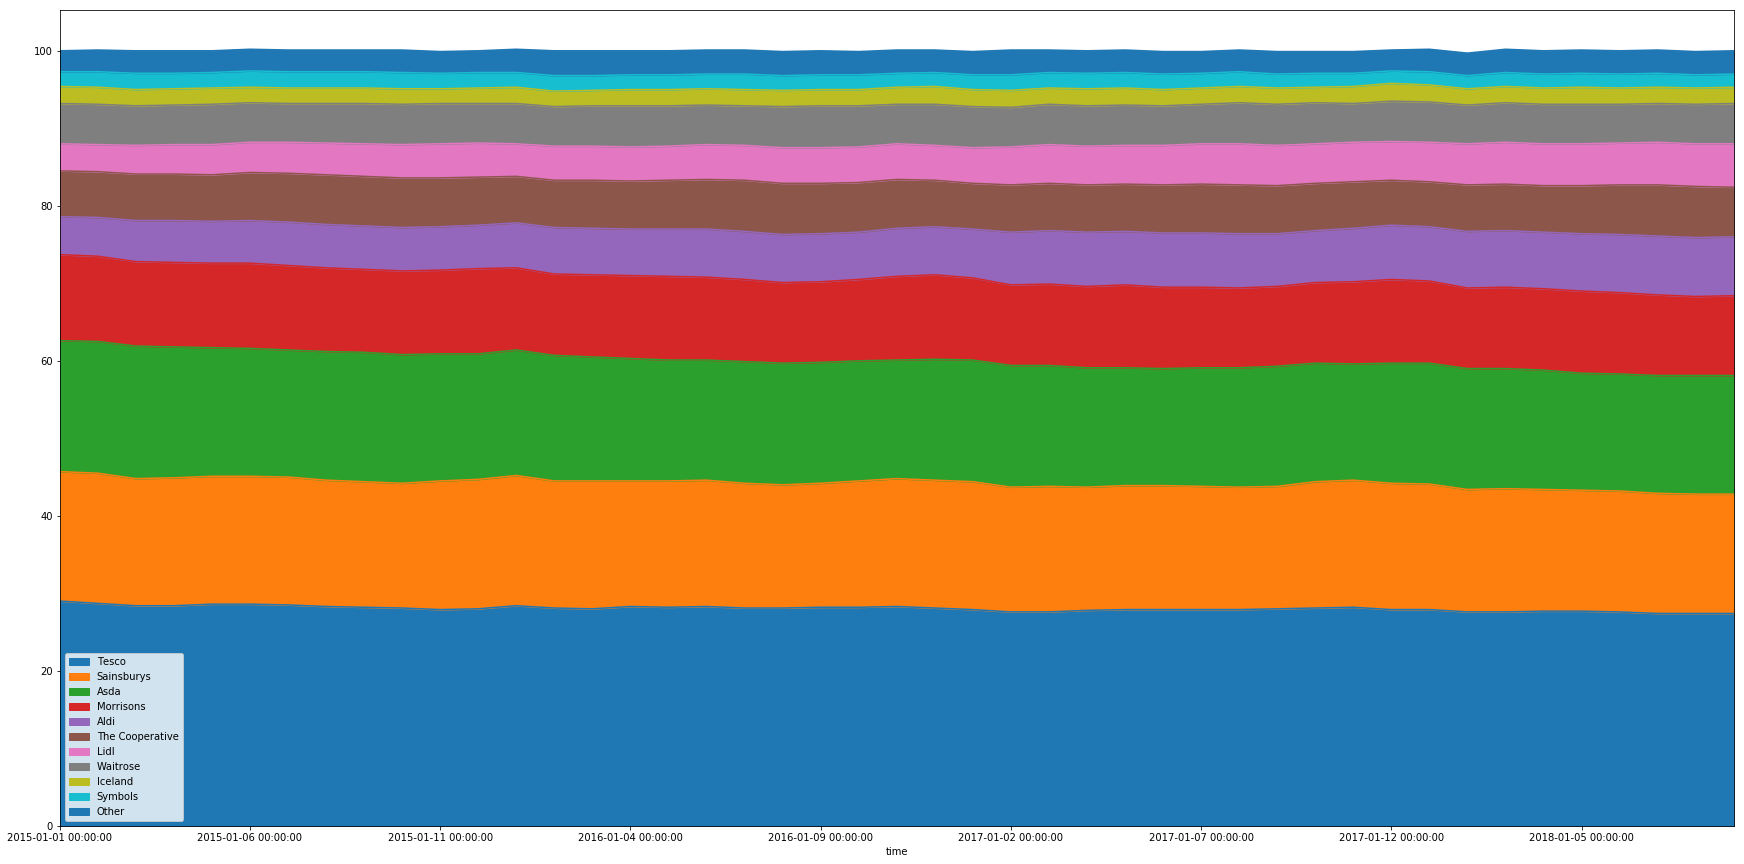

In [79]:
glv10adf.plot.area(stacked=True, figsize=(30,15));

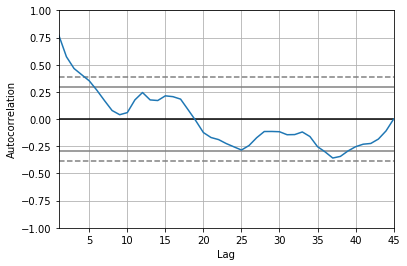

In [80]:
tescoseries = glv10adf['Tesco']
autocorrelation_plot(tescoseries)

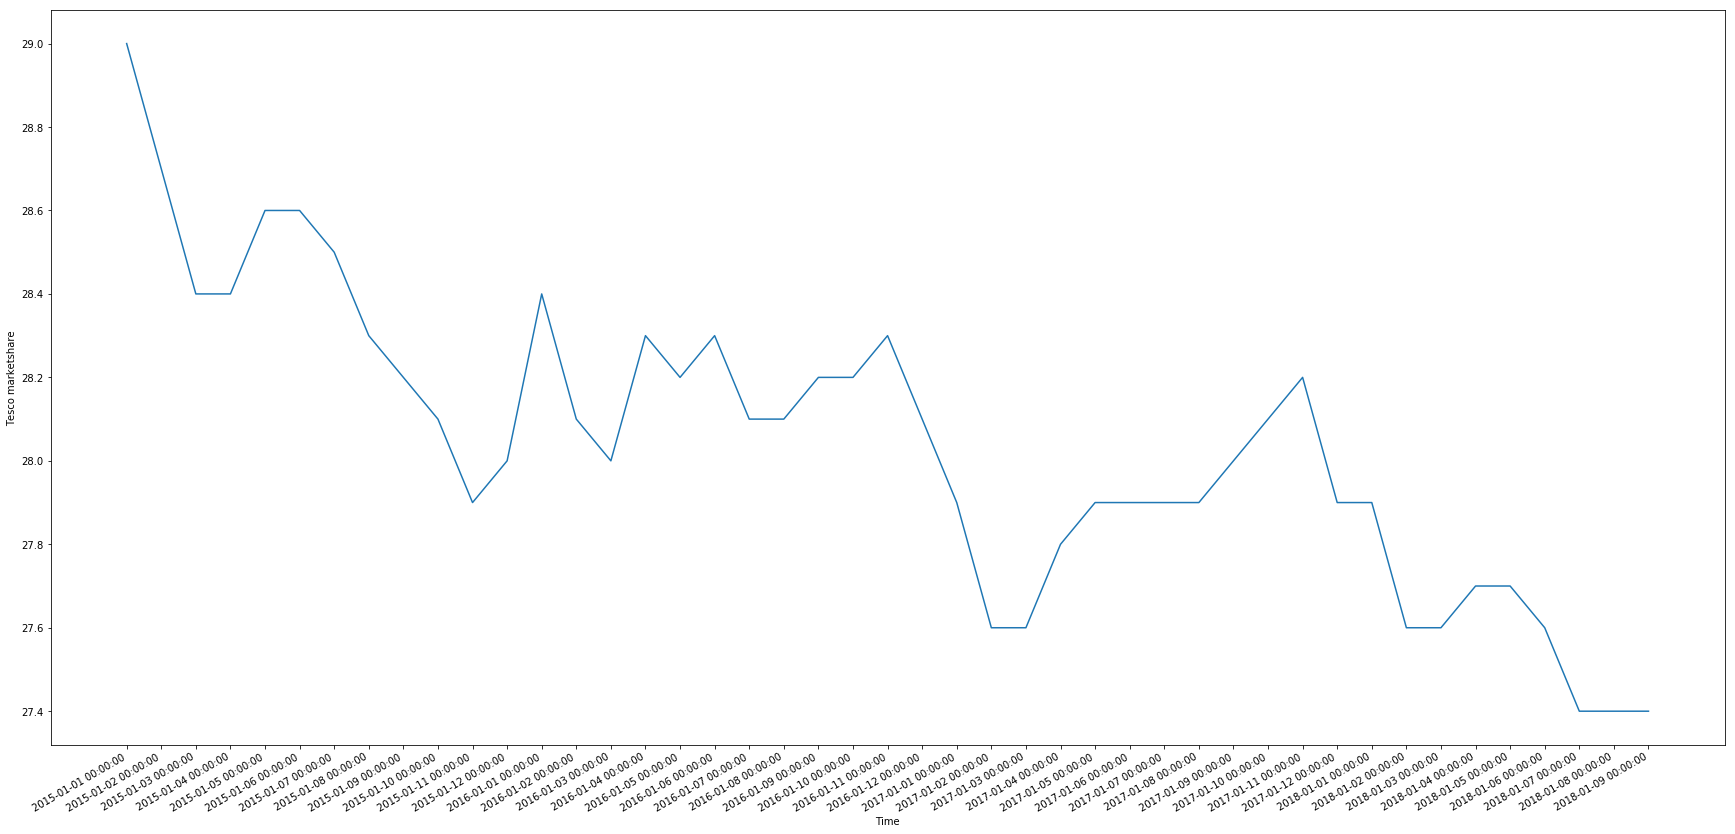

In [81]:
## plot graph
fig= plt.figure(figsize=(30,15))
plt.xlabel('Time')
plt.ylabel('Tesco marketshare')
fig.autofmt_xdate()
plt.plot(tescoseries) 

In [82]:
#Determine rolling statistics
rolmean = tescoseries.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = tescoseries.rolling(window=12).std()
print(rolmean,rolstd)

time
2015-01-01 00:00:00          NaN
2015-01-02 00:00:00          NaN
2015-01-03 00:00:00          NaN
2015-01-04 00:00:00          NaN
2015-01-05 00:00:00          NaN
2015-01-06 00:00:00          NaN
2015-01-07 00:00:00          NaN
2015-01-08 00:00:00          NaN
2015-01-09 00:00:00          NaN
2015-01-10 00:00:00          NaN
2015-01-11 00:00:00          NaN
2015-01-12 00:00:00    28.391667
2016-01-01 00:00:00    28.341667
2016-01-02 00:00:00    28.291667
2016-01-03 00:00:00    28.258333
2016-01-04 00:00:00    28.250000
2016-01-05 00:00:00    28.216667
2016-01-06 00:00:00    28.191667
2016-01-07 00:00:00    28.158333
2016-01-08 00:00:00    28.141667
2016-01-09 00:00:00    28.141667
2016-01-10 00:00:00    28.150000
2016-01-11 00:00:00    28.183333
2016-01-12 00:00:00    28.191667
2017-01-01 00:00:00    28.150000
2017-01-02 00:00:00    28.108333
2017-01-03 00:00:00    28.075000
2017-01-04 00:00:00    28.033333
2017-01-05 00:00:00    28.008333
2017-01-06 00:00:00    27.975000
2017-

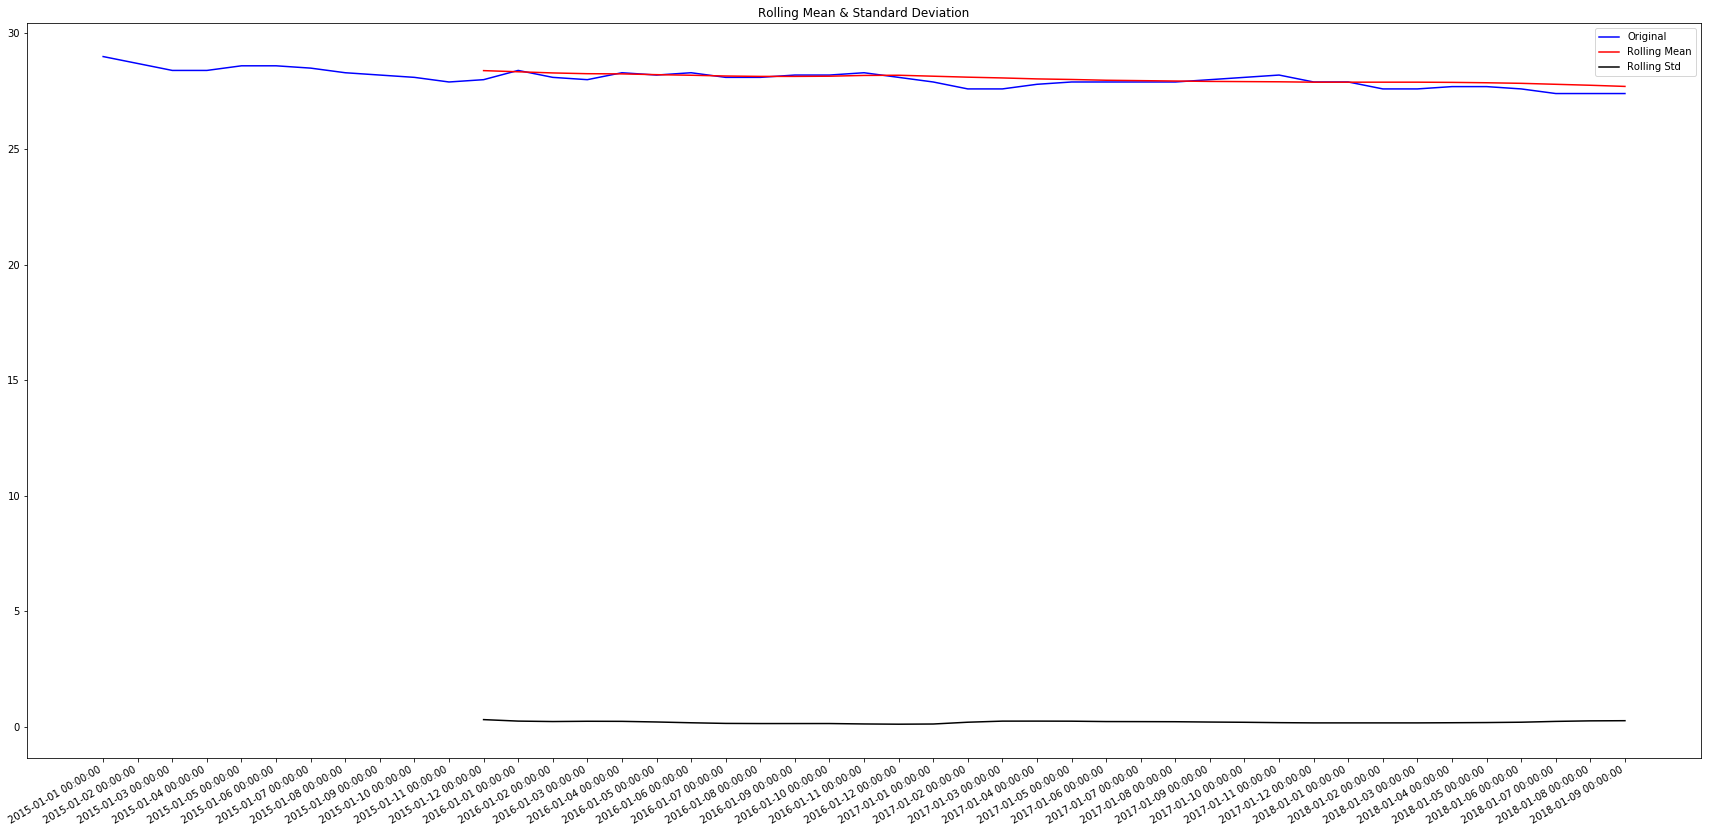

In [83]:
#Plot rolling statistics
fig= plt.figure(figsize=(30,15))
orig = plt.plot(tescoseries, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
fig.autofmt_xdate()
plt.show(block=False)

In [84]:
tescoseries

time
2015-01-01 00:00:00    29.0
2015-01-02 00:00:00    28.7
2015-01-03 00:00:00    28.4
2015-01-04 00:00:00    28.4
2015-01-05 00:00:00    28.6
2015-01-06 00:00:00    28.6
2015-01-07 00:00:00    28.5
2015-01-08 00:00:00    28.3
2015-01-09 00:00:00    28.2
2015-01-10 00:00:00    28.1
2015-01-11 00:00:00    27.9
2015-01-12 00:00:00    28.0
2016-01-01 00:00:00    28.4
2016-01-02 00:00:00    28.1
2016-01-03 00:00:00    28.0
2016-01-04 00:00:00    28.3
2016-01-05 00:00:00    28.2
2016-01-06 00:00:00    28.3
2016-01-07 00:00:00    28.1
2016-01-08 00:00:00    28.1
2016-01-09 00:00:00    28.2
2016-01-10 00:00:00    28.2
2016-01-11 00:00:00    28.3
2016-01-12 00:00:00    28.1
2017-01-01 00:00:00    27.9
2017-01-02 00:00:00    27.6
2017-01-03 00:00:00    27.6
2017-01-04 00:00:00    27.8
2017-01-05 00:00:00    27.9
2017-01-06 00:00:00    27.9
2017-01-07 00:00:00    27.9
2017-01-08 00:00:00    27.9
2017-01-09 00:00:00    28.0
2017-01-10 00:00:00    28.1
2017-01-11 00:00:00    28.2
2017-01-12 00:0

In [85]:
#Test value ~ critical value => stationary series
#Perform Augmented Dickey–Fuller test:
X=tescoseries.values
print('Results of Dickey Fuller Test:')
dftest = adfuller(X, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -2.353429
p-value                         0.155314
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


                             ARIMA Model Results                              
Dep. Variable:                D.Tesco   No. Observations:                   44
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  19.552
Method:                       css-mle   S.D. of innovations              0.154
Date:                Wed, 12 Jun 2019   AIC                            -25.104
Time:                        18:37:31   BIC                            -12.615
Sample:                             1   HQIC                           -20.472
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0321      0.015     -2.133      0.039      -0.062      -0.003
ar.L1.D.Tesco    -0.0068      0.154     -0.044      0.965      -0.308       0.294
ar.L2.D.Tesco    -0.2646      0.152     

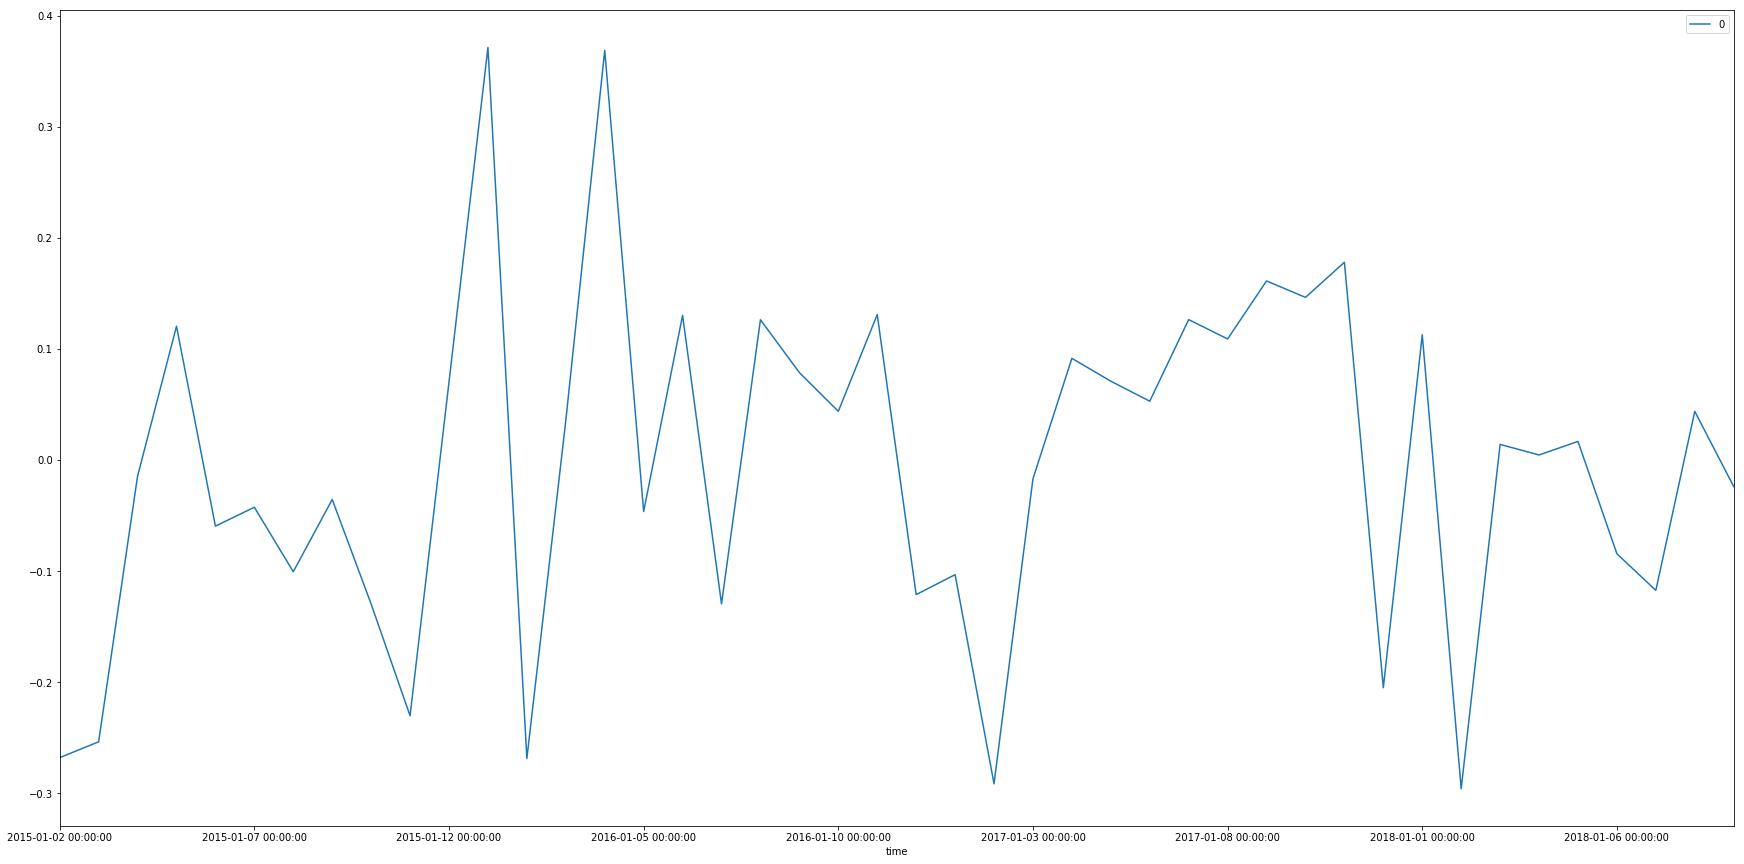

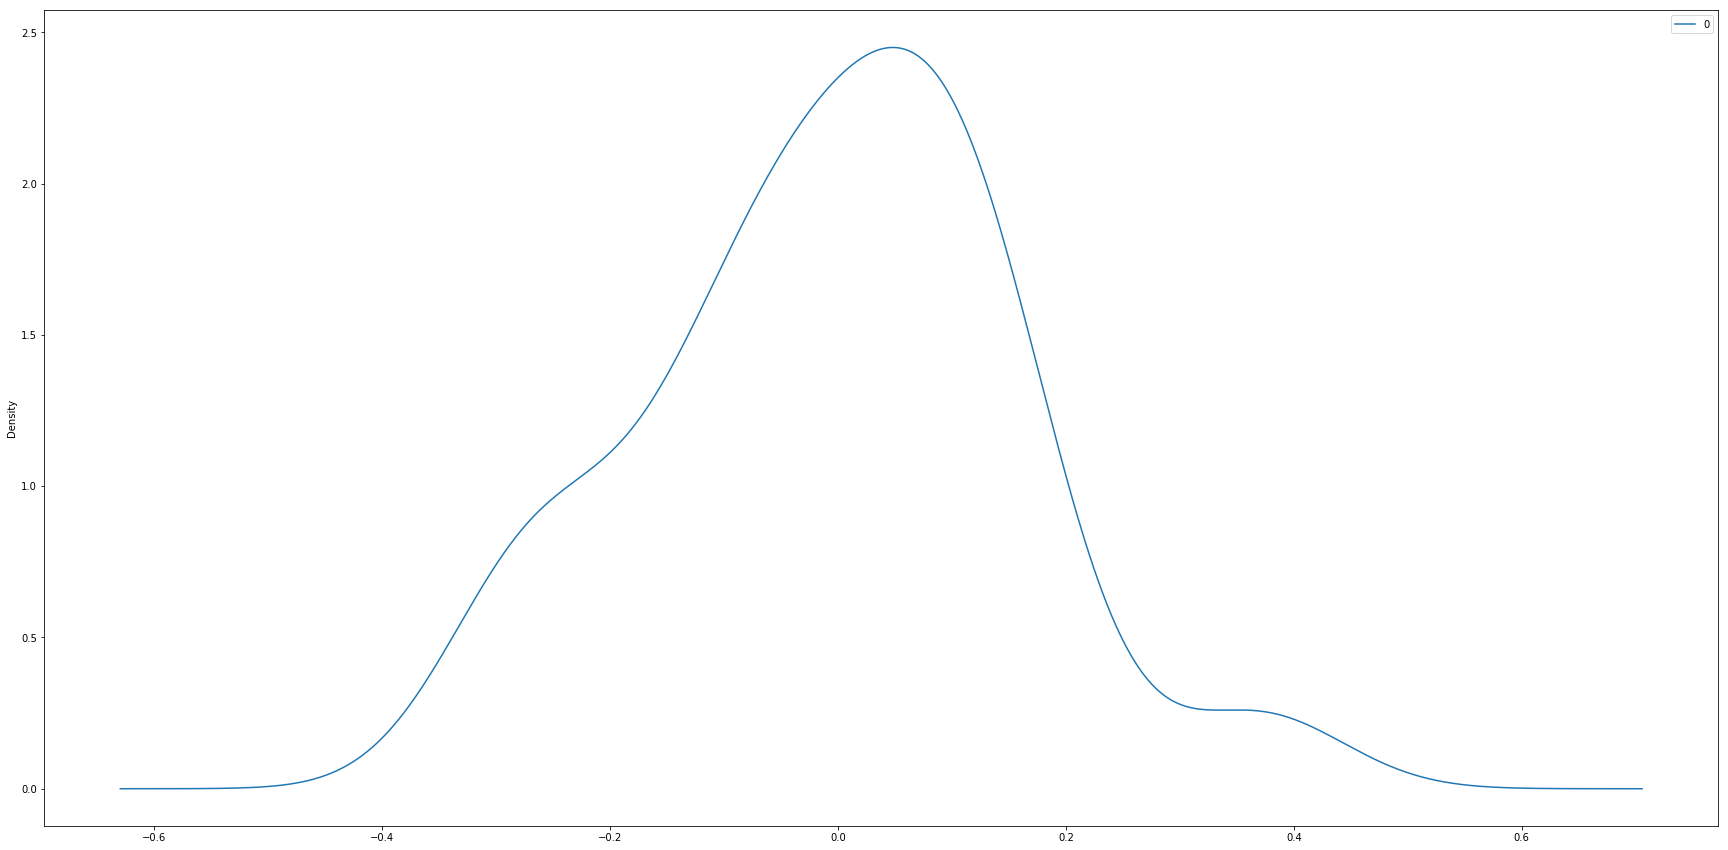

In [86]:
#ARIMA fit Tesco marketshare
model = ARIMA(tescoseries, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(30,15))
residuals.plot(kind='kde', figsize=(30,15))
print(residuals.describe())    
    
    
    
    
    
    

Plotting AR model


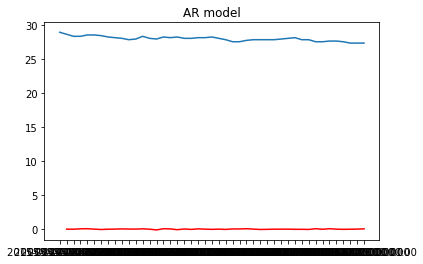

In [87]:
#AR Model
#making order=(2,1,0) gives RSS=1.5023
model = ARIMA(tescoseries, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(tescoseries)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('AR model')
print('Plotting AR model')

In [88]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [89]:
indexdf = pd.date_range(start='2015-1-1', periods=45, freq='M') 
indexdf=indexdf.to_period()

X=tescoseries
X.index = indexdf

In [90]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:342.3299580821796
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:85845.75654900272
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:34.99004177466122
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:241.2381091414582
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:219.97251867219023
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:251.27932602255504
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:227.70047528644645
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:239.61971452928998
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:220.91720817558436


In [91]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))



print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMA:',pdq[0])
print('ARIMA:',pdq[1])
print('ARIMA:',pdq[2])


Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (0, 0, 0)
ARIMA: (0, 0, 1)
ARIMA: (0, 1, 0)


In [92]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.ARIMA(X,
                                            order=param)
                                            #seasonal_order=param_seasonal,
                                            #enforce_stationarity=False,
                                            #enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA:',param, results.aic)
        except:
            continue

ARIMA: (0, 0, 0) 38.33800416835511
ARIMA: (0, 0, 1) 4.0037744983561225
ARIMA: (0, 1, 0) -29.54898825888489
ARIMA: (0, 1, 1) -27.753209906619162
ARIMA: (1, 0, 0) -24.40245363298537
ARIMA: (1, 0, 1) -23.41612431612664
ARIMA: (1, 1, 0) -27.668453061778848


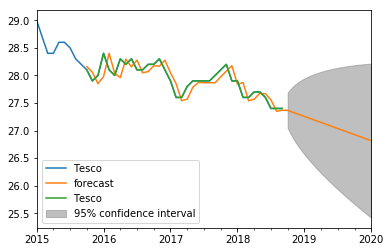

                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0368      0.027     -1.362      0.181      -0.090       0.016
ma.L1.D.Tesco     0.0881      0.189      0.466      0.644      -0.283       0.459


In [93]:
####grid search (or hyperparameter optimization) for model selection####
####ARIMA(0, 0, 1)x(0, 1, 0, 12)12
import statsmodels.api as sm
#sm.tsa.ARIMA()



mod = sm.tsa.ARIMA(tescoseries,order=(0, 1, 1))
results = mod.fit()
fig, ax = plt.subplots()
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = results.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.show()



print(results.summary().tables[1])

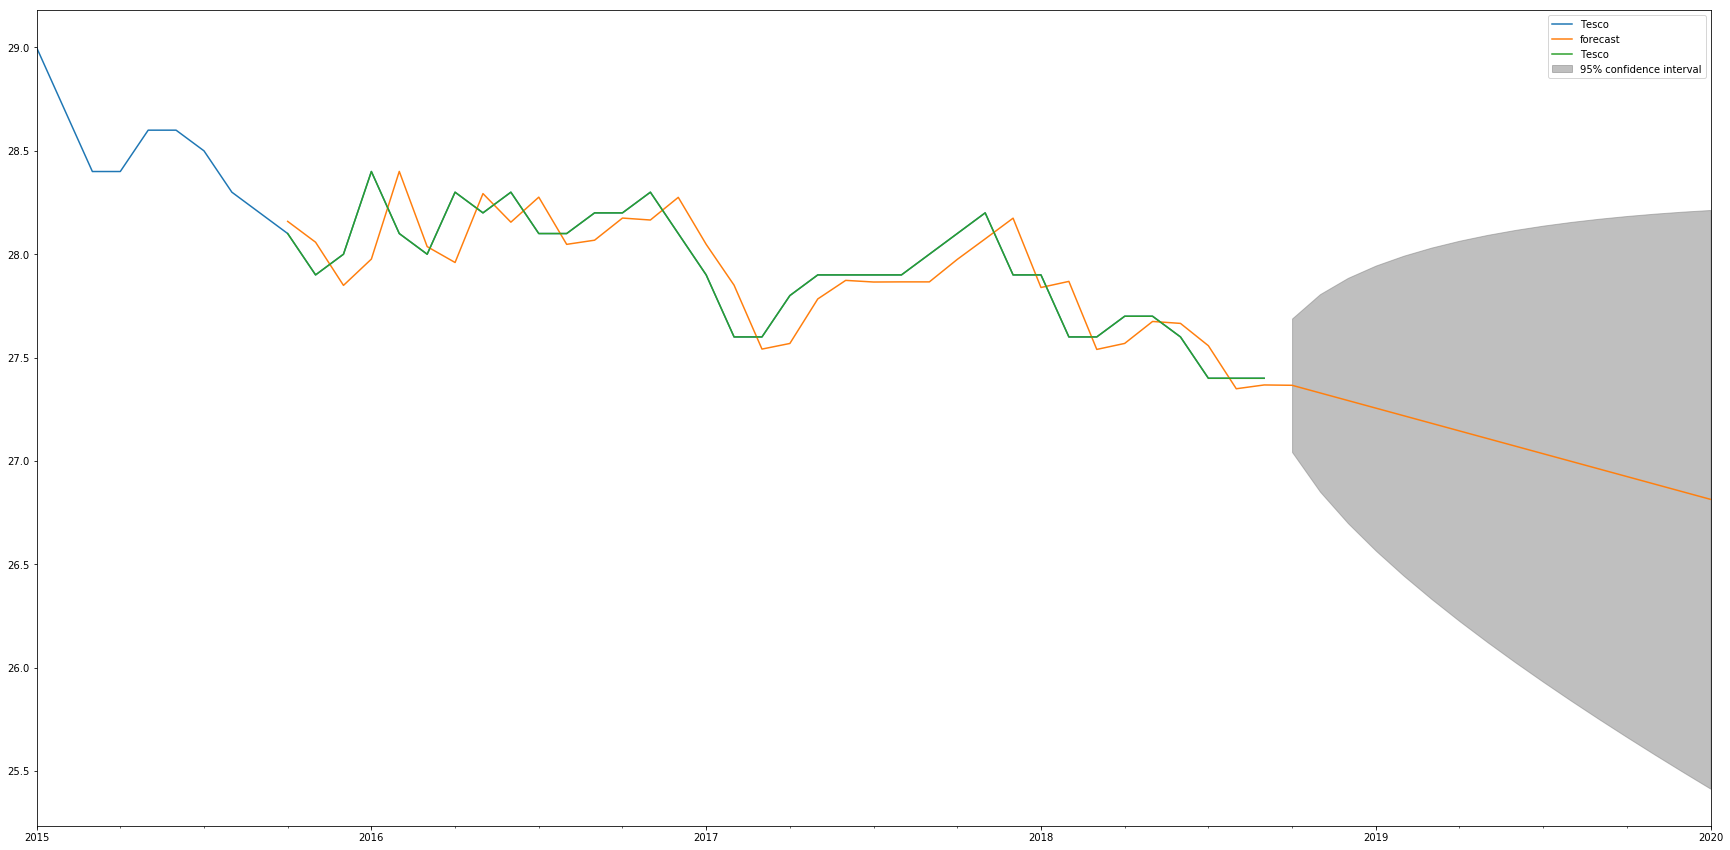

In [94]:
X=tescoseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)

plt.show()

In [95]:
X=tescoseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([1,30])


ax = X.loc['2015-1-1':].plot(ax=ax)

fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)

plt.show()






In [96]:
print(res)

In [97]:
X = tescoseries.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=27.876670, expected=27.900000
predicted=27.864624, expected=27.900000
predicted=27.867962, expected=27.900000
predicted=27.868677, expected=28.000000
predicted=27.990247, expected=28.100000
predicted=28.092612, expected=28.200000
predicted=28.197826, expected=27.900000
predicted=27.819057, expected=27.900000
predicted=27.877031, expected=27.600000
predicted=27.537906, expected=27.600000
predicted=27.566367, expected=27.700000
predicted=27.676439, expected=27.700000
predicted=27.668876, expected=27.600000
predicted=27.559834, expected=27.400000
predicted=27.346131, expected=27.400000
predicted=27.366772, expected=27.400000
Test MSE: 0.017


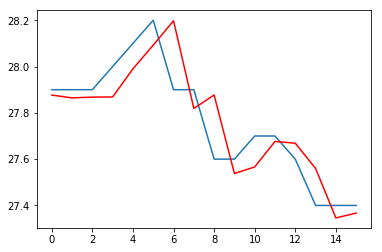

In [98]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')

In [99]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

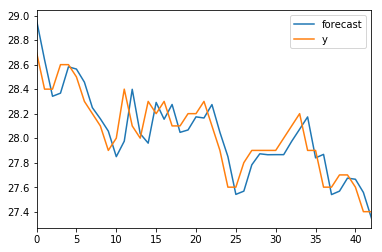

In [100]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

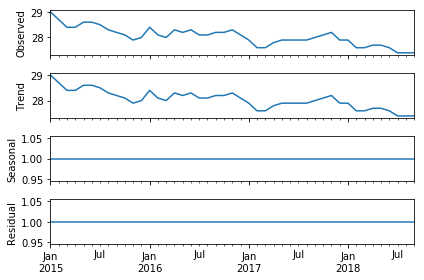

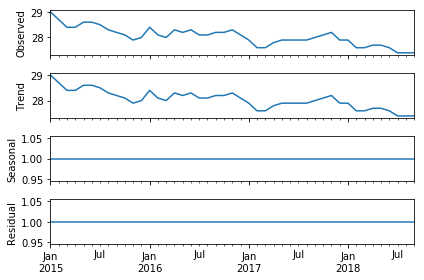

In [101]:
result = seasonal_decompose(tescoseries, model='multiplicative', freq=1)

result.plot()



In [102]:
####Auto Arima Forecast in Python###

import pmdarima as pm


model = pm.auto_arima(tescoseries, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())






Fit ARIMA: order=(1, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=-29.549, BIC=-25.981, Fit time=0.009 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-27.668, BIC=-22.316, Fit time=0.059 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-27.753, BIC=-22.401, Fit time=0.038 seconds
Total fit time: 0.144 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   44
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  16.774
Method:                           css   S.D. of innovations              0.165
Date:                Wed, 12 Jun 2019   AIC                            -29.549
Time:                        18:37:45   BIC                            -25.981
Sample:                             1   HQIC                           -28.226
                                                                              
                 coef    std err        

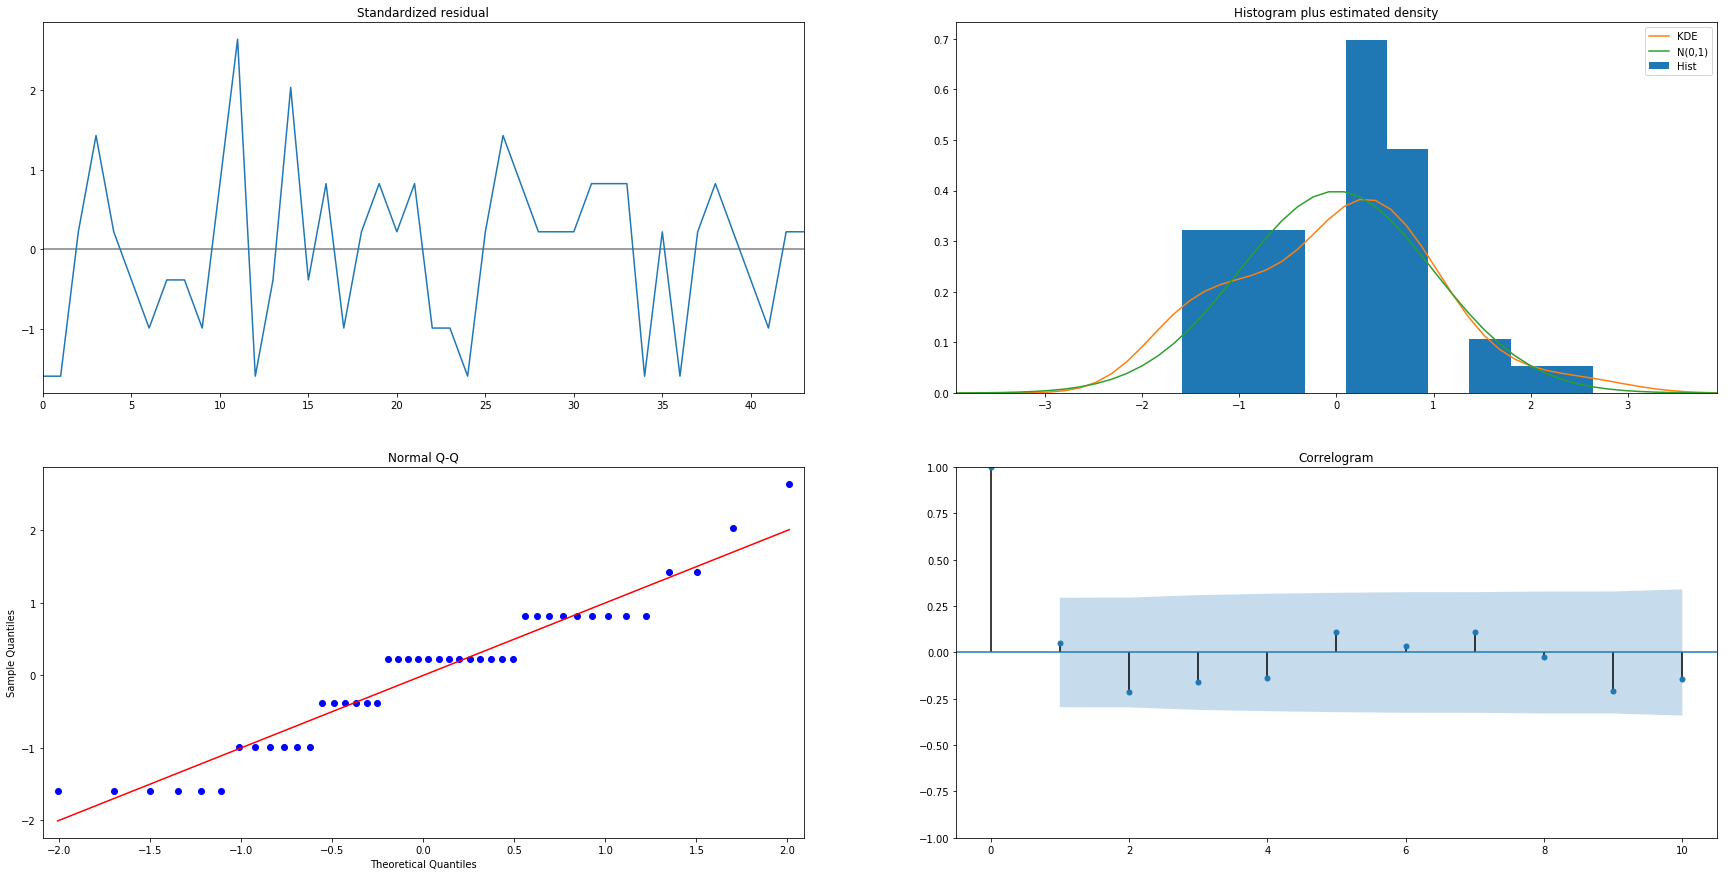

In [103]:
model.plot_diagnostics(figsize=(30,15))
plt.show()

In [104]:
# Forecast


n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(X), len(X)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(X)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Tesco marketshare")
plt.show()

In [105]:
sainsburyseries = glv10adf['Sainsburys']
autocorrelation_plot(sainsburyseries)

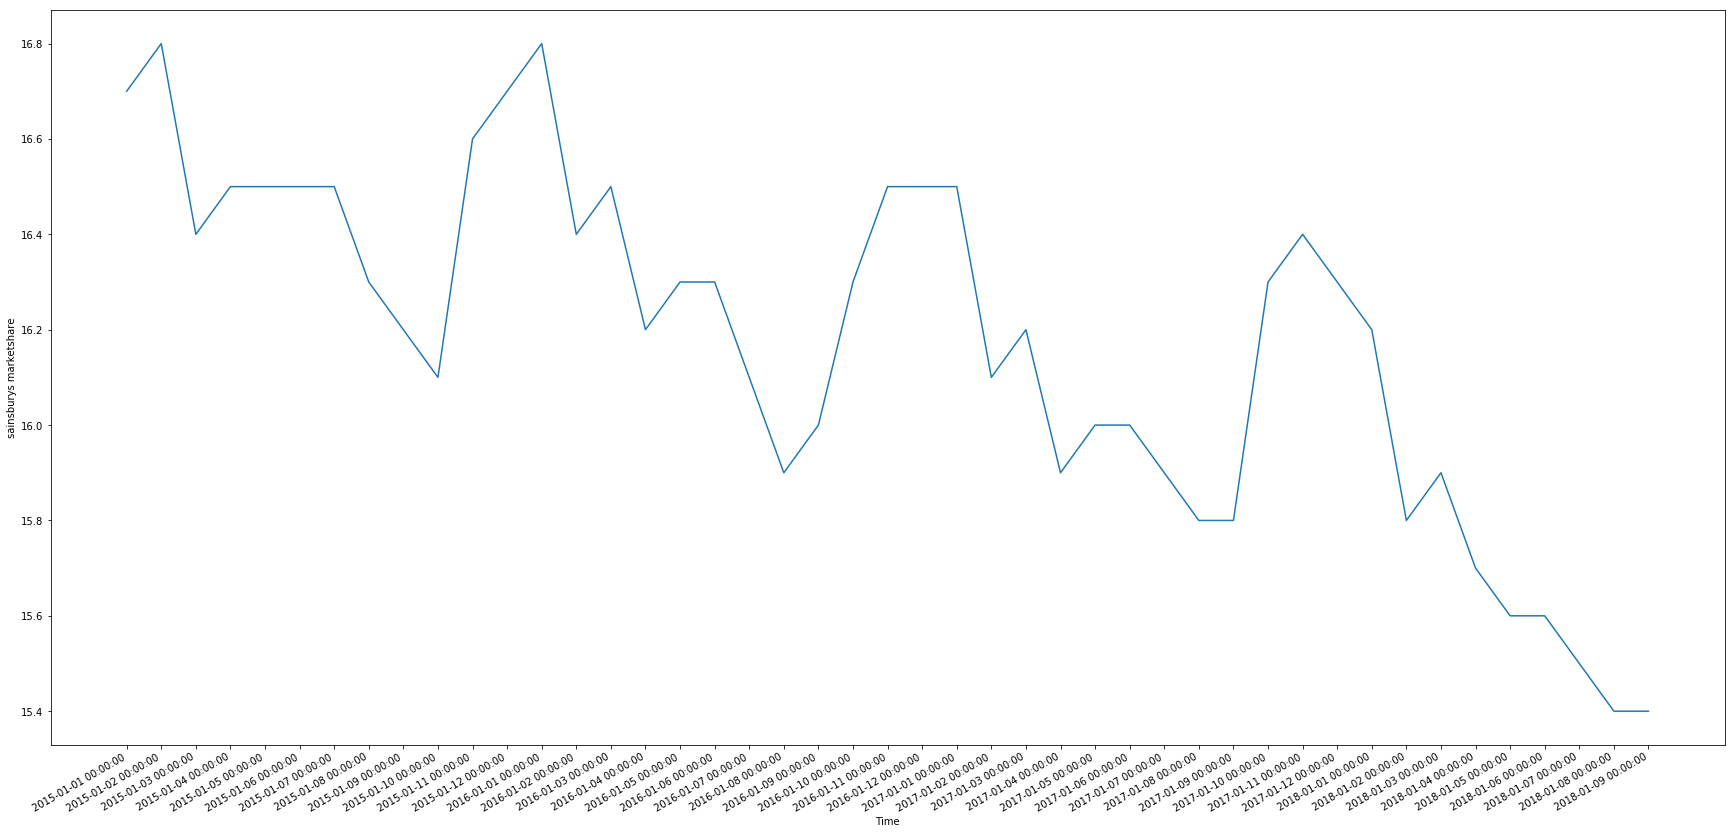

In [106]:
## plot graph
fig= plt.figure(figsize=(30,15))
plt.xlabel('Time')
plt.ylabel('sainsburys marketshare')
fig.autofmt_xdate()
plt.plot(sainsburyseries) 

In [107]:
#Determine rolling statistics
rolmean = sainsburyseries.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = sainsburyseries.rolling(window=12).std()
print(rolmean,rolstd)

time
2015-01-01 00:00:00          NaN
2015-01-02 00:00:00          NaN
2015-01-03 00:00:00          NaN
2015-01-04 00:00:00          NaN
2015-01-05 00:00:00          NaN
2015-01-06 00:00:00          NaN
2015-01-07 00:00:00          NaN
2015-01-08 00:00:00          NaN
2015-01-09 00:00:00          NaN
2015-01-10 00:00:00          NaN
2015-01-11 00:00:00          NaN
2015-01-12 00:00:00    16.483333
2016-01-01 00:00:00    16.491667
2016-01-02 00:00:00    16.458333
2016-01-03 00:00:00    16.466667
2016-01-04 00:00:00    16.441667
2016-01-05 00:00:00    16.425000
2016-01-06 00:00:00    16.408333
2016-01-07 00:00:00    16.375000
2016-01-08 00:00:00    16.341667
2016-01-09 00:00:00    16.325000
2016-01-10 00:00:00    16.341667
2016-01-11 00:00:00    16.333333
2016-01-12 00:00:00    16.316667
2017-01-01 00:00:00    16.291667
2017-01-02 00:00:00    16.266667
2017-01-03 00:00:00    16.241667
2017-01-04 00:00:00    16.216667
2017-01-05 00:00:00    16.191667
2017-01-06 00:00:00    16.166667
2017-

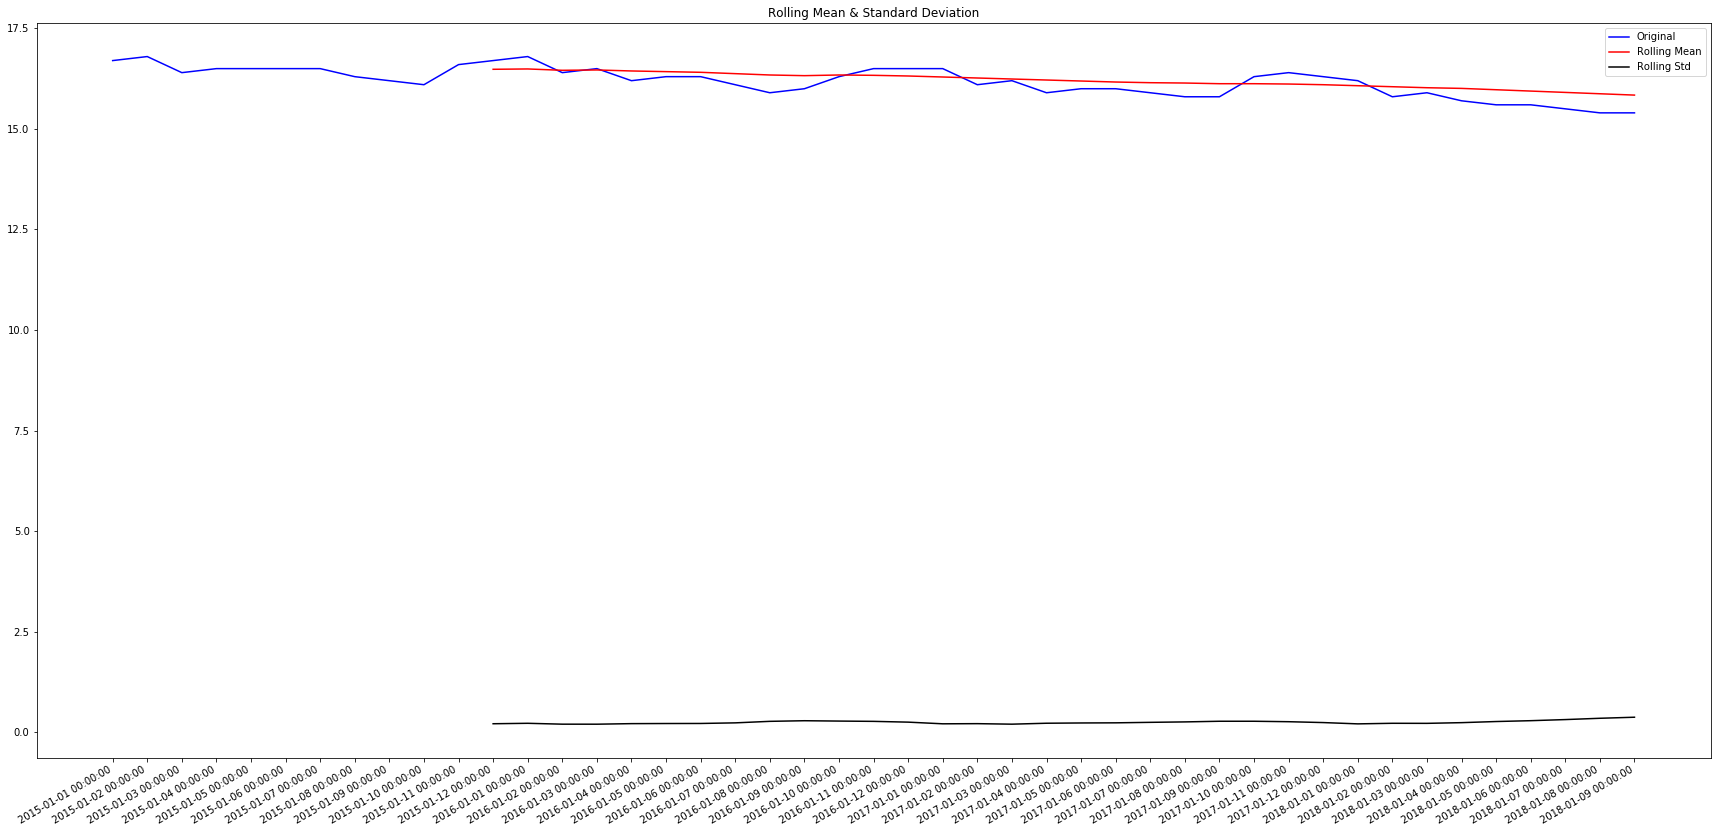

In [108]:
#Plot rolling statistics sainsburys
fig= plt.figure(figsize=(30,15))
orig = plt.plot(sainsburyseries, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
fig.autofmt_xdate()
plt.show(block=False)

In [109]:
sainsburyseries

time
2015-01-01 00:00:00    16.7
2015-01-02 00:00:00    16.8
2015-01-03 00:00:00    16.4
2015-01-04 00:00:00    16.5
2015-01-05 00:00:00    16.5
2015-01-06 00:00:00    16.5
2015-01-07 00:00:00    16.5
2015-01-08 00:00:00    16.3
2015-01-09 00:00:00    16.2
2015-01-10 00:00:00    16.1
2015-01-11 00:00:00    16.6
2015-01-12 00:00:00    16.7
2016-01-01 00:00:00    16.8
2016-01-02 00:00:00    16.4
2016-01-03 00:00:00    16.5
2016-01-04 00:00:00    16.2
2016-01-05 00:00:00    16.3
2016-01-06 00:00:00    16.3
2016-01-07 00:00:00    16.1
2016-01-08 00:00:00    15.9
2016-01-09 00:00:00    16.0
2016-01-10 00:00:00    16.3
2016-01-11 00:00:00    16.5
2016-01-12 00:00:00    16.5
2017-01-01 00:00:00    16.5
2017-01-02 00:00:00    16.1
2017-01-03 00:00:00    16.2
2017-01-04 00:00:00    15.9
2017-01-05 00:00:00    16.0
2017-01-06 00:00:00    16.0
2017-01-07 00:00:00    15.9
2017-01-08 00:00:00    15.8
2017-01-09 00:00:00    15.8
2017-01-10 00:00:00    16.3
2017-01-11 00:00:00    16.4
2017-01-12 00:0

In [110]:
#Test value ~ critical value => stationary series
#Perform Augmented Dickey–Fuller test:
X=sainsburyseries.values
print('Results of Dickey Fuller Test:')
dftest = adfuller(X, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  1.440099
p-value                         0.997289
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


                             ARIMA Model Results                              
Dep. Variable:           D.Sainsburys   No. Observations:                   44
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  12.663
Method:                       css-mle   S.D. of innovations              0.180
Date:                Wed, 12 Jun 2019   AIC                            -11.326
Time:                        18:37:51   BIC                              1.163
Sample:                             1   HQIC                            -6.695
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0288      0.019     -1.528      0.135      -0.066       0.008
ar.L1.D.Sainsburys    -0.1080      0.148     -0.728      0.471      -0.399       0.183
ar.L2.D.Sainsburys  

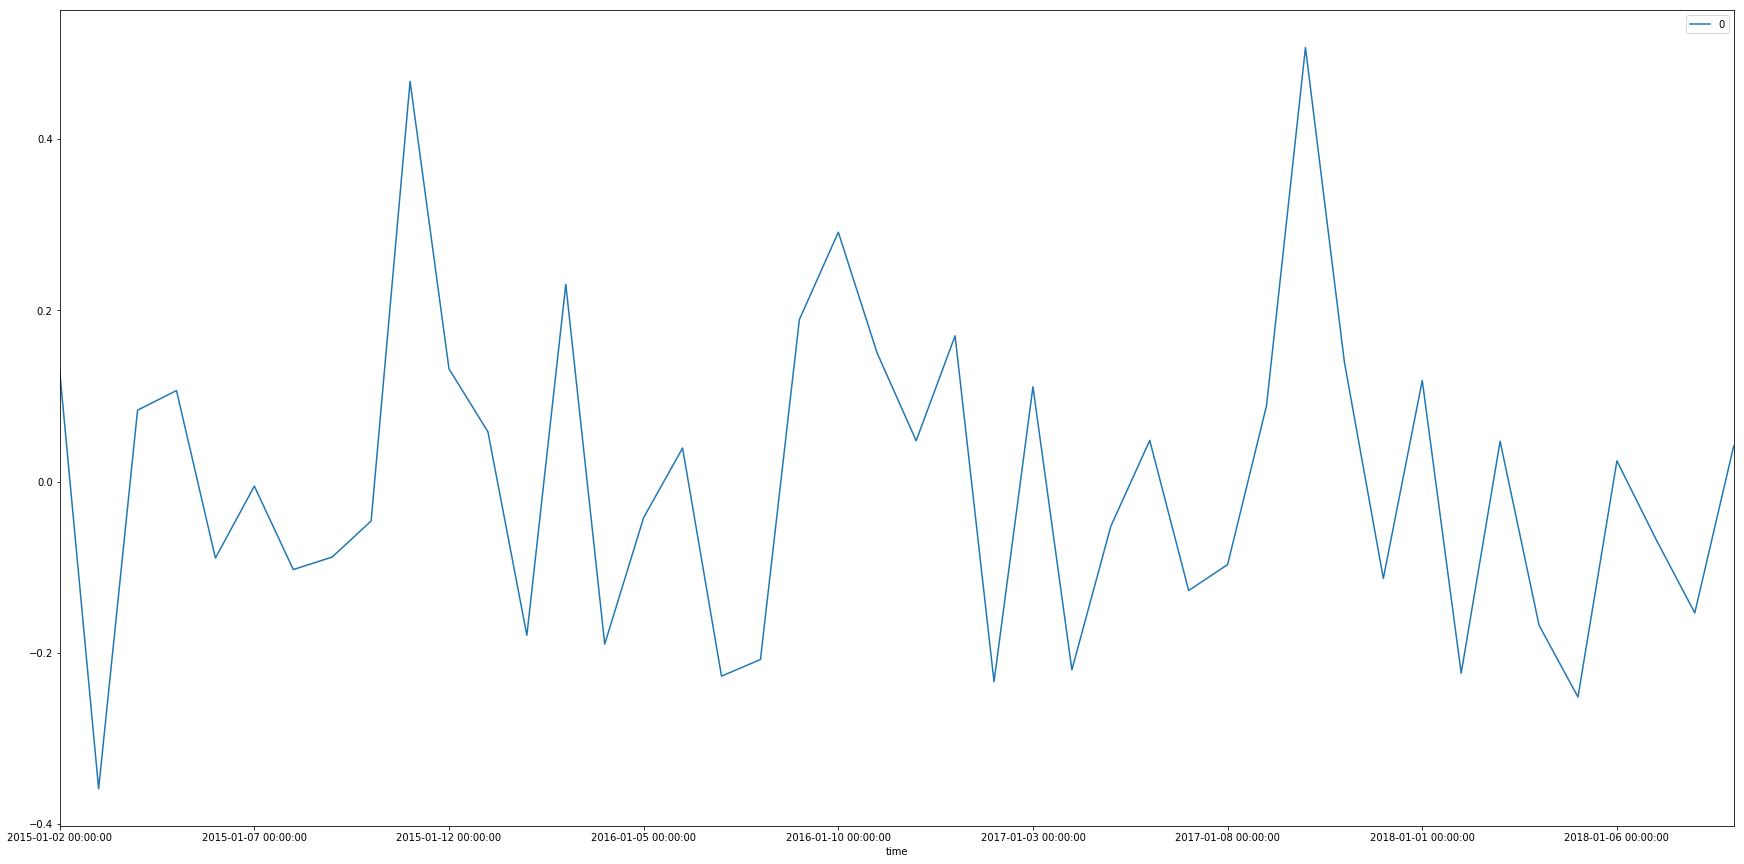

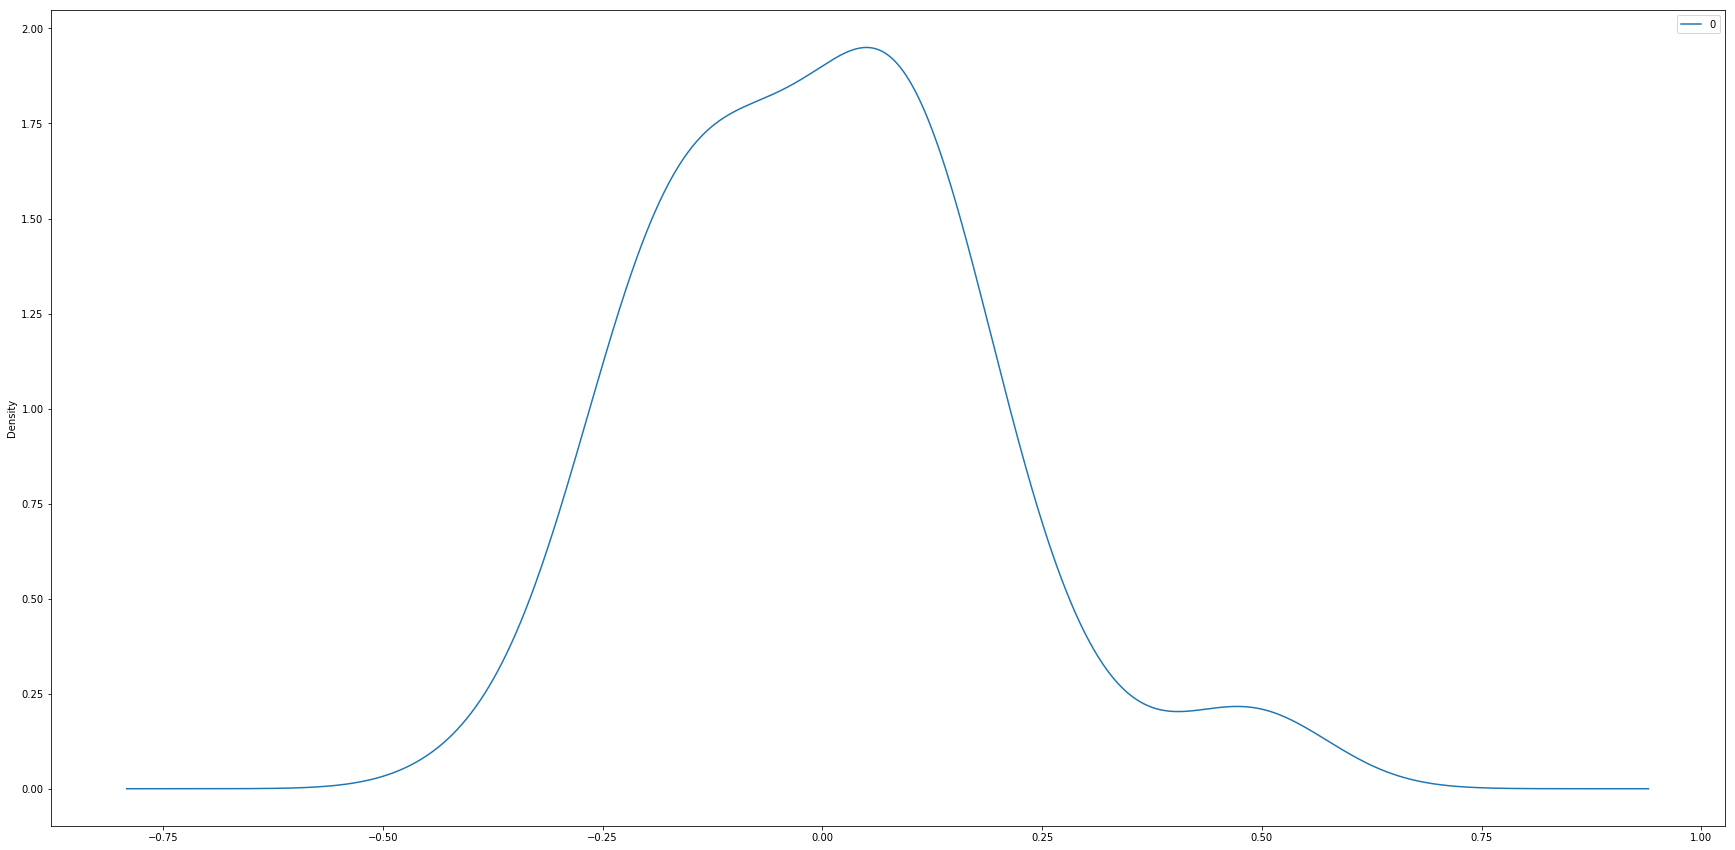

In [111]:
#ARIMA fit sainsburys marketshare
model = ARIMA(sainsburyseries, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(30,15))
residuals.plot(kind='kde', figsize=(30,15))
print(residuals.describe())     

Plotting AR model


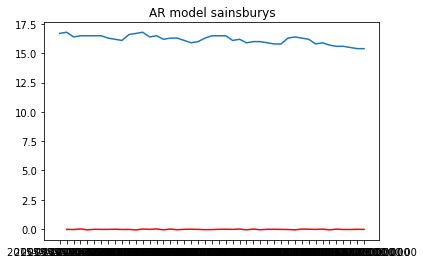

In [112]:
#AR Model
#making order=(2,1,0) gives RSS=1.5023
model = ARIMA(sainsburyseries, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(sainsburyseries)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('AR model sainsburys')
print('Plotting AR model')

In [113]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [114]:
indexdf = pd.date_range(start='2015-1-1', periods=45, freq='M') 
indexdf=indexdf.to_period()

X=sainsburyseries
X.index = indexdf

In [115]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:342.3299580821796
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:85845.75654900272
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:34.99004177466122
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:241.2381091414582
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:219.97251867219023
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:251.27932602255504
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:227.70047528644645
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:239.61971452928998
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:220.91720817558436


In [116]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))



print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMA:',pdq[0])
print('ARIMA:',pdq[1])
print('ARIMA:',pdq[2])


Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (0, 0, 0)
ARIMA: (0, 0, 1)
ARIMA: (0, 1, 0)


In [117]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.ARIMA(X,
                                            order=param)
                                            #seasonal_order=param_seasonal,
                                            #enforce_stationarity=False,
                                            #enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA:',param, results.aic)
        except:
            continue

ARIMA: (0, 0, 0) 40.9069867905048
ARIMA: (0, 0, 1) 15.529515746729714
ARIMA: (0, 1, 0) -12.475122660629204
ARIMA: (0, 1, 1) -10.732716448559415
ARIMA: (1, 0, 0) -10.394703494228978
ARIMA: (1, 0, 1) -8.423810992485798
ARIMA: (1, 1, 0) -10.756182842664032
ARIMA: (1, 1, 1) -9.603489517576548


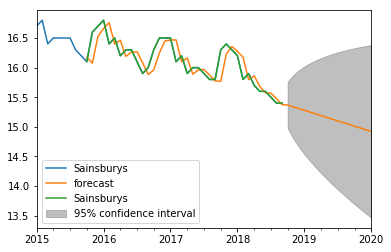

                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0298      0.028     -1.064      0.293      -0.085       0.025
ma.L1.D.Sainsburys    -0.0746      0.150     -0.496      0.622      -0.369       0.220


In [118]:
####grid search (or hyperparameter optimization) for model selection####
####ARIMA(0, 0, 1)x(0, 1, 0, 12)12
import statsmodels.api as sm
#sm.tsa.ARIMA()



mod = sm.tsa.ARIMA(sainsburyseries,order=(0, 1, 1))
results = mod.fit()
fig, ax = plt.subplots()
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = results.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.show()



print(results.summary().tables[1])

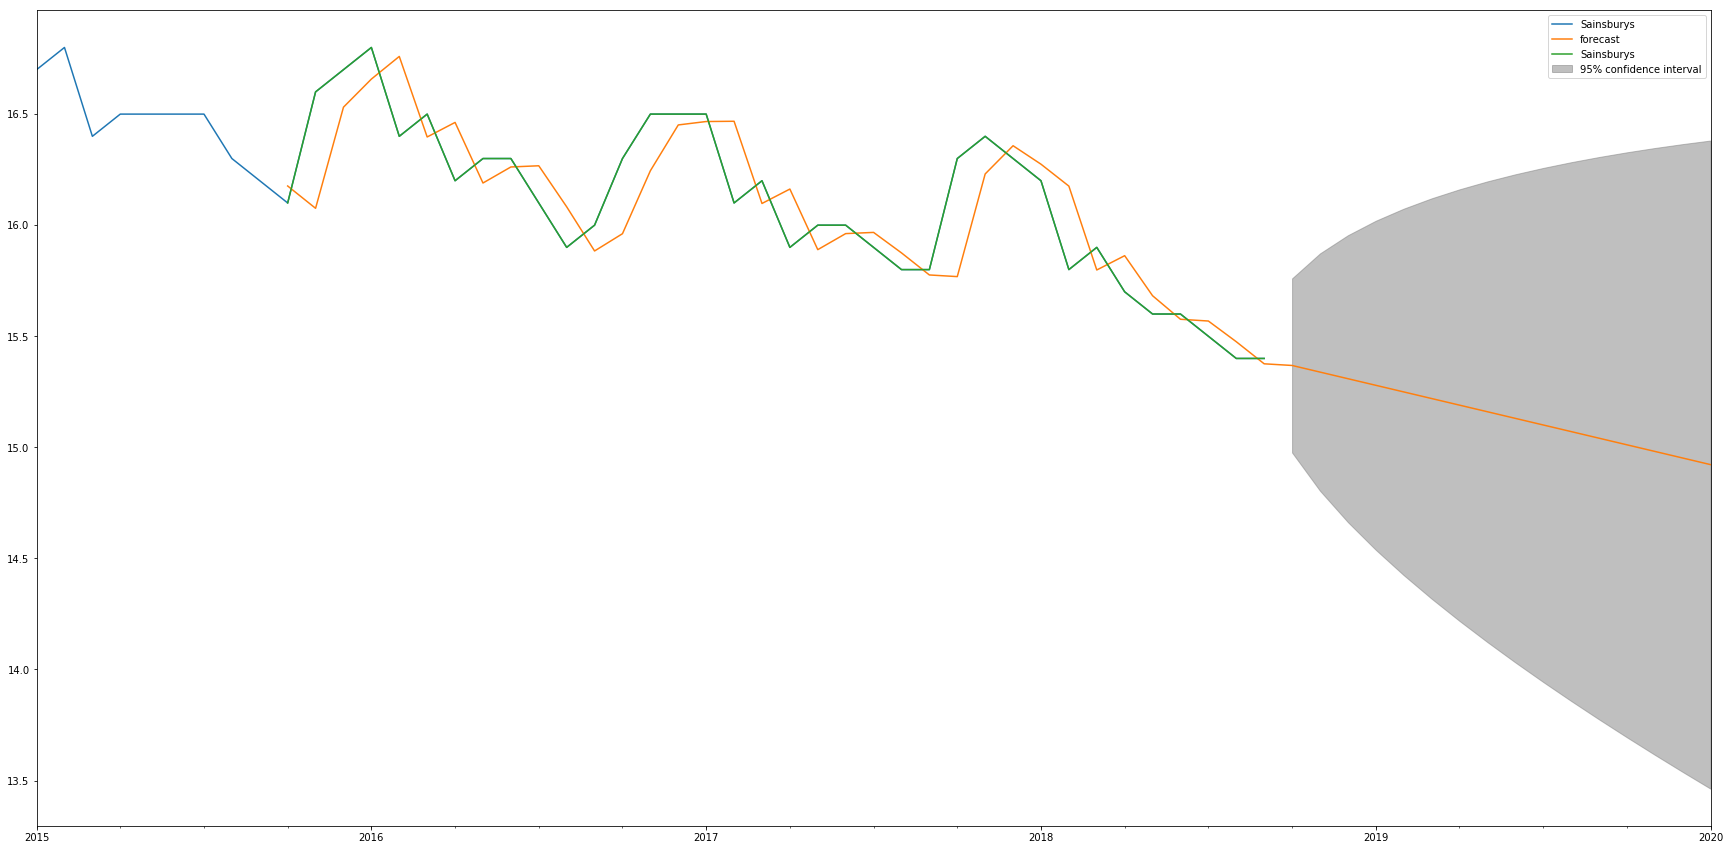

In [119]:
X=sainsburyseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)

plt.show()

In [120]:
print(res)

In [121]:
X = sainsburyseries.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=15.961475, expected=16.000000
predicted=15.970008, expected=15.900000
predicted=15.883164, expected=15.800000
predicted=15.782339, expected=15.800000
predicted=15.769018, expected=16.300000
predicted=16.213464, expected=16.400000
predicted=16.380535, expected=16.300000
predicted=16.294699, expected=16.200000
predicted=16.193148, expected=15.800000
predicted=15.795625, expected=15.900000
predicted=15.871568, expected=15.700000
predicted=15.688272, expected=15.600000
predicted=15.578780, expected=15.600000
predicted=15.571392, expected=15.500000
predicted=15.476687, expected=15.400000
predicted=15.375203, expected=15.400000
Test MSE: 0.035


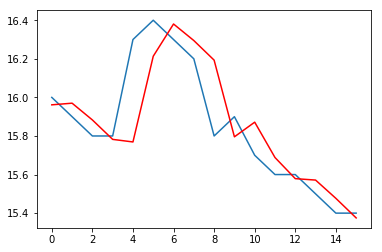

In [122]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')

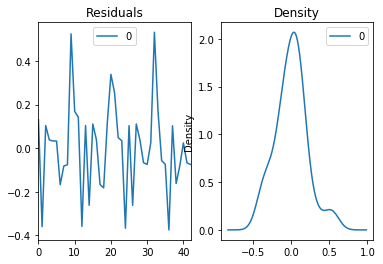

In [123]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

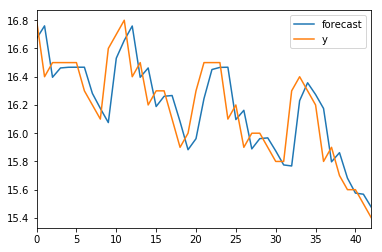

In [124]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

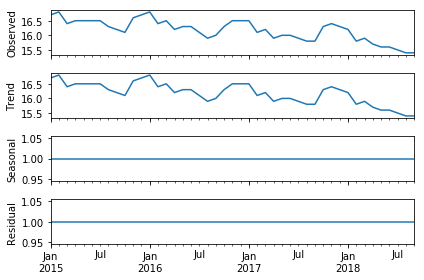

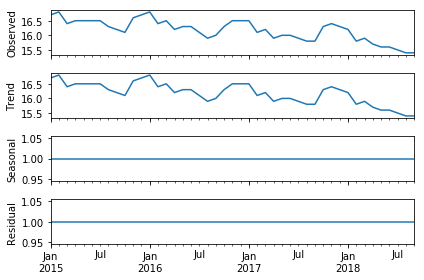

In [125]:
result = seasonal_decompose(sainsburyseries, model='multiplicative', freq=1)

result.plot()



In [126]:
####Auto Arima Forecast in Python for sainsbury###

import pmdarima as pm


model = pm.auto_arima(sainsburyseries, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())






Fit ARIMA: order=(1, 1, 1); AIC=-9.603, BIC=-2.467, Fit time=0.115 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-12.475, BIC=-8.907, Fit time=0.005 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-10.756, BIC=-5.404, Fit time=0.032 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-10.733, BIC=-5.380, Fit time=0.030 seconds
Total fit time: 0.189 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   44
Model:                 ARIMA(0, 1, 0)   Log Likelihood                   8.238
Method:                           css   S.D. of innovations              0.201
Date:                Wed, 12 Jun 2019   AIC                            -12.475
Time:                        18:38:03   BIC                             -8.907
Sample:                             1   HQIC                           -11.152
                                                                              
                 coef    std err   

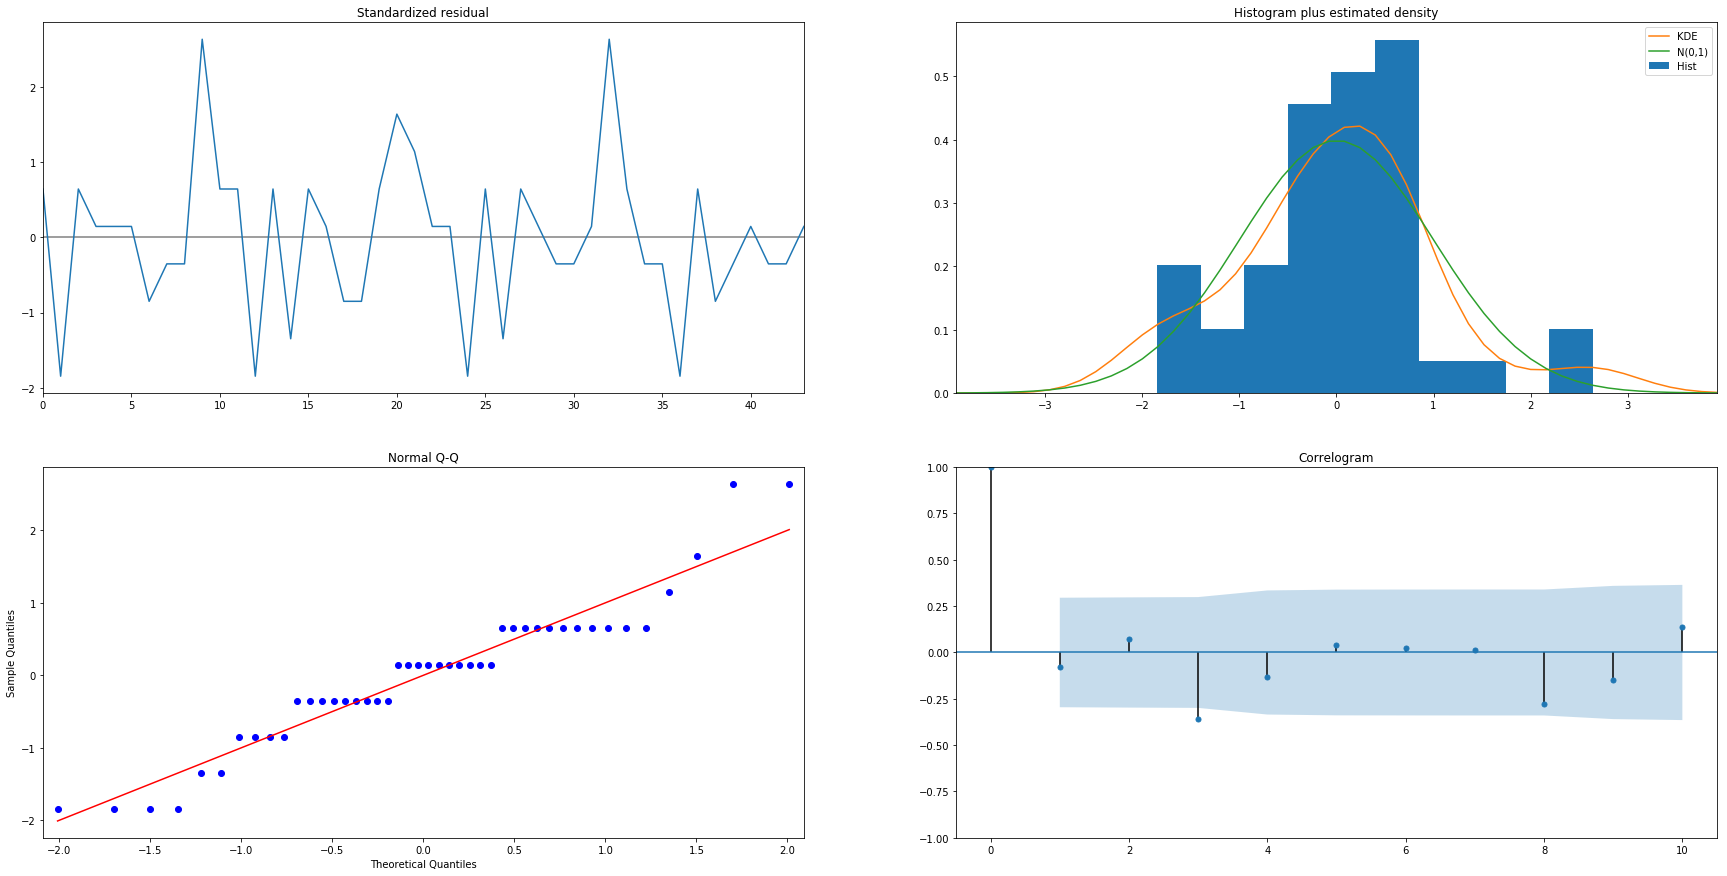

In [127]:
model.plot_diagnostics(figsize=(30,15))
plt.show()

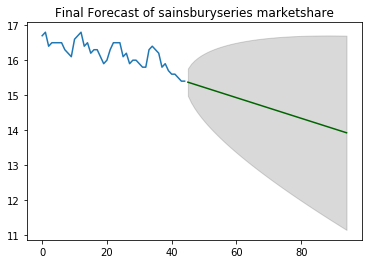

In [128]:
# Forecast


n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(X), len(X)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(X)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of sainsburyseries marketshare")
plt.show()

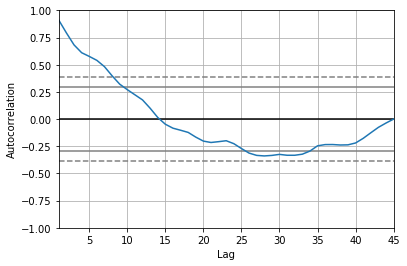

In [129]:
asdaseries = glv10adf['Asda']
autocorrelation_plot(asdaseries)

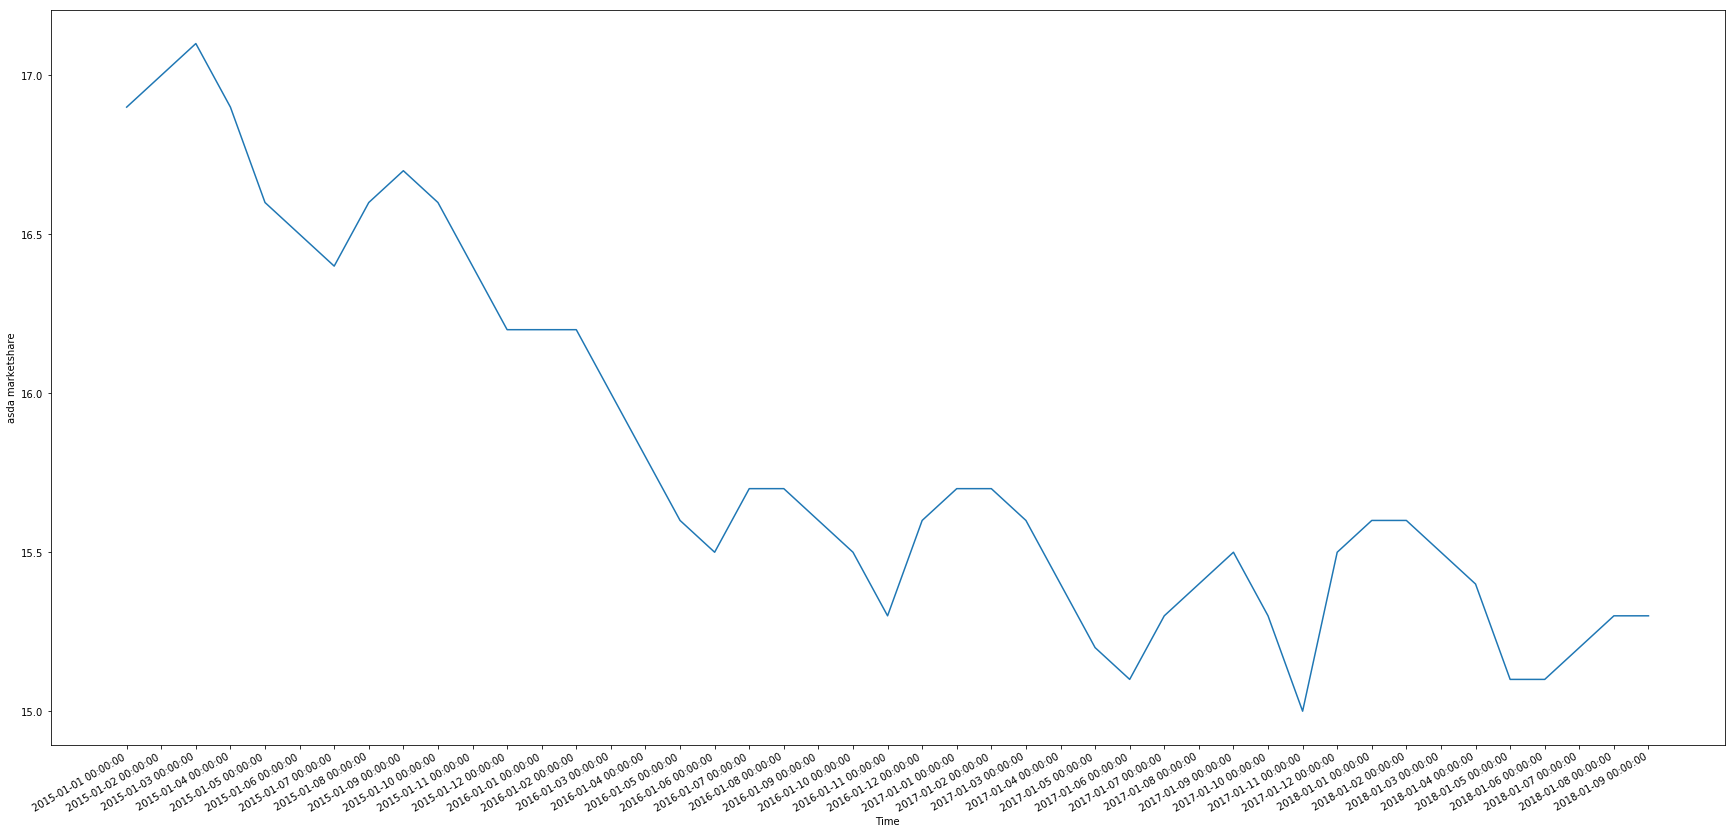

In [130]:
## plot graph
fig= plt.figure(figsize=(30,15))
plt.xlabel('Time')
plt.ylabel('asda marketshare')
fig.autofmt_xdate()
plt.plot(asdaseries) 

In [131]:
#Determine rolling statistics
rolmean = asdaseries.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = asdaseries.rolling(window=12).std()
print(rolmean,rolstd)

time
2015-01-01 00:00:00          NaN
2015-01-02 00:00:00          NaN
2015-01-03 00:00:00          NaN
2015-01-04 00:00:00          NaN
2015-01-05 00:00:00          NaN
2015-01-06 00:00:00          NaN
2015-01-07 00:00:00          NaN
2015-01-08 00:00:00          NaN
2015-01-09 00:00:00          NaN
2015-01-10 00:00:00          NaN
2015-01-11 00:00:00          NaN
2015-01-12 00:00:00    16.658333
2016-01-01 00:00:00    16.600000
2016-01-02 00:00:00    16.533333
2016-01-03 00:00:00    16.441667
2016-01-04 00:00:00    16.350000
2016-01-05 00:00:00    16.266667
2016-01-06 00:00:00    16.183333
2016-01-07 00:00:00    16.125000
2016-01-08 00:00:00    16.050000
2016-01-09 00:00:00    15.958333
2016-01-10 00:00:00    15.866667
2016-01-11 00:00:00    15.775000
2016-01-12 00:00:00    15.725000
2017-01-01 00:00:00    15.683333
2017-01-02 00:00:00    15.641667
2017-01-03 00:00:00    15.608333
2017-01-04 00:00:00    15.575000
2017-01-05 00:00:00    15.541667
2017-01-06 00:00:00    15.508333
2017-

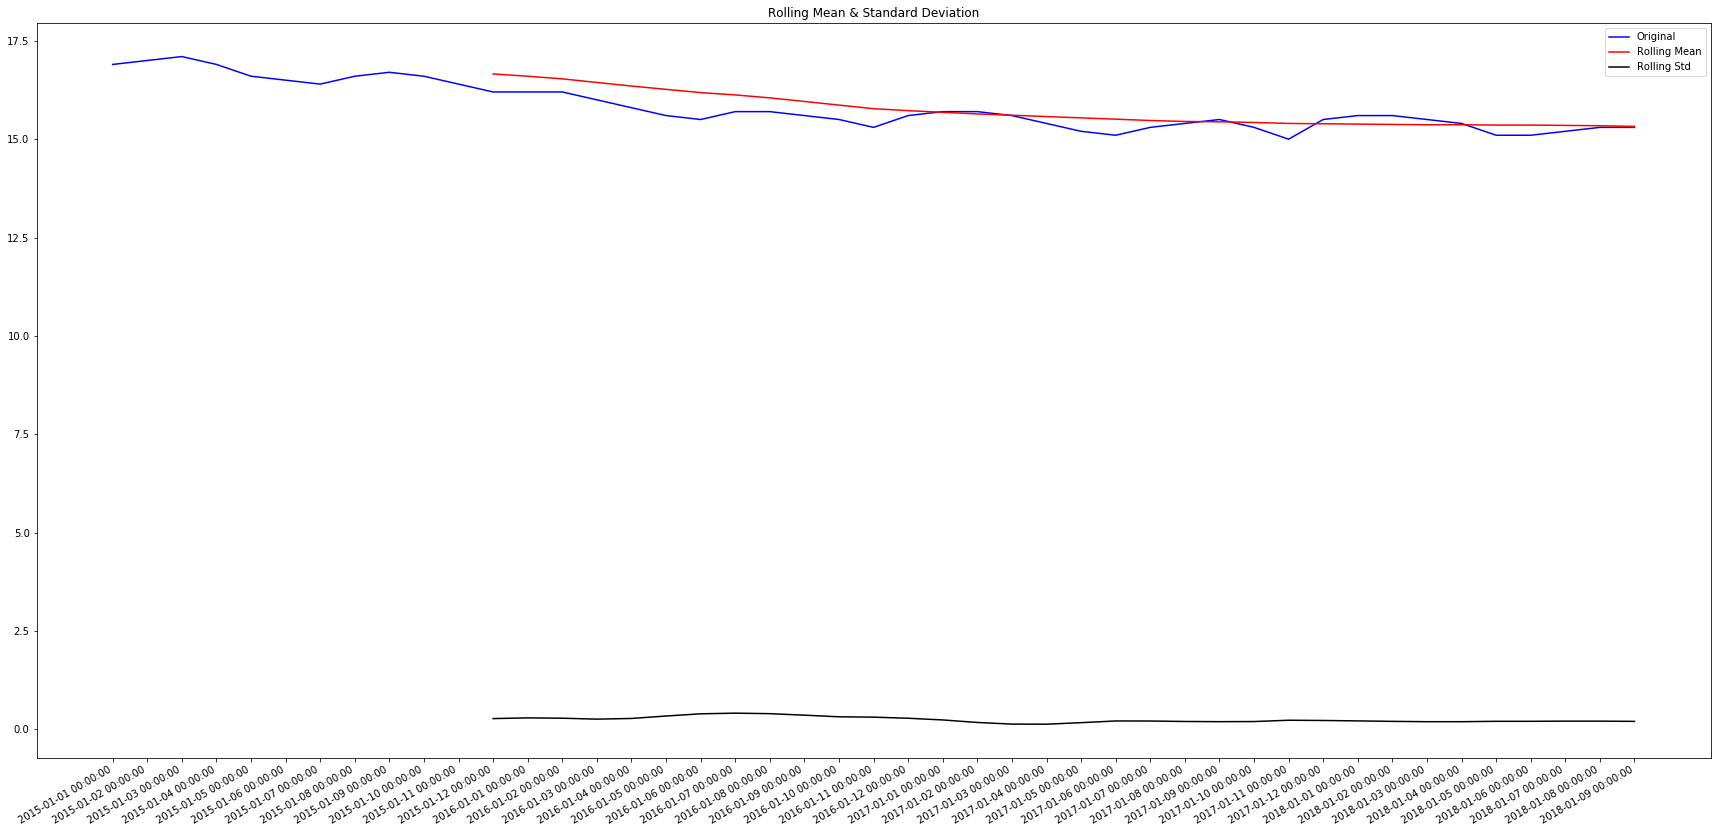

In [132]:
#Plot rolling statistics
fig= plt.figure(figsize=(30,15))
orig = plt.plot(asdaseries, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
fig.autofmt_xdate()
plt.show(block=False)

In [133]:
asdaseries

time
2015-01-01 00:00:00    16.9
2015-01-02 00:00:00    17.0
2015-01-03 00:00:00    17.1
2015-01-04 00:00:00    16.9
2015-01-05 00:00:00    16.6
2015-01-06 00:00:00    16.5
2015-01-07 00:00:00    16.4
2015-01-08 00:00:00    16.6
2015-01-09 00:00:00    16.7
2015-01-10 00:00:00    16.6
2015-01-11 00:00:00    16.4
2015-01-12 00:00:00    16.2
2016-01-01 00:00:00    16.2
2016-01-02 00:00:00    16.2
2016-01-03 00:00:00    16.0
2016-01-04 00:00:00    15.8
2016-01-05 00:00:00    15.6
2016-01-06 00:00:00    15.5
2016-01-07 00:00:00    15.7
2016-01-08 00:00:00    15.7
2016-01-09 00:00:00    15.6
2016-01-10 00:00:00    15.5
2016-01-11 00:00:00    15.3
2016-01-12 00:00:00    15.6
2017-01-01 00:00:00    15.7
2017-01-02 00:00:00    15.7
2017-01-03 00:00:00    15.6
2017-01-04 00:00:00    15.4
2017-01-05 00:00:00    15.2
2017-01-06 00:00:00    15.1
2017-01-07 00:00:00    15.3
2017-01-08 00:00:00    15.4
2017-01-09 00:00:00    15.5
2017-01-10 00:00:00    15.3
2017-01-11 00:00:00    15.0
2017-01-12 00:0

In [134]:
#Test value ~ critical value => stationary series
#Perform Augmented Dickey–Fuller test:
X=asdaseries.values
print('Results of Dickey Fuller Test:')
dftest = adfuller(X, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -2.135999
p-value                         0.230288
#Lags Used                      4.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


                             ARIMA Model Results                              
Dep. Variable:                 D.Asda   No. Observations:                   44
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  23.014
Method:                       css-mle   S.D. of innovations              0.142
Date:                Wed, 12 Jun 2019   AIC                            -32.028
Time:                        18:38:09   BIC                            -19.538
Sample:                             1   HQIC                           -27.396
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0406      0.014     -2.924      0.006      -0.068      -0.013
ar.L1.D.Asda     0.0873      0.149      0.587      0.561      -0.204       0.379
ar.L2.D.Asda    -0.2671      0.143     -1.87

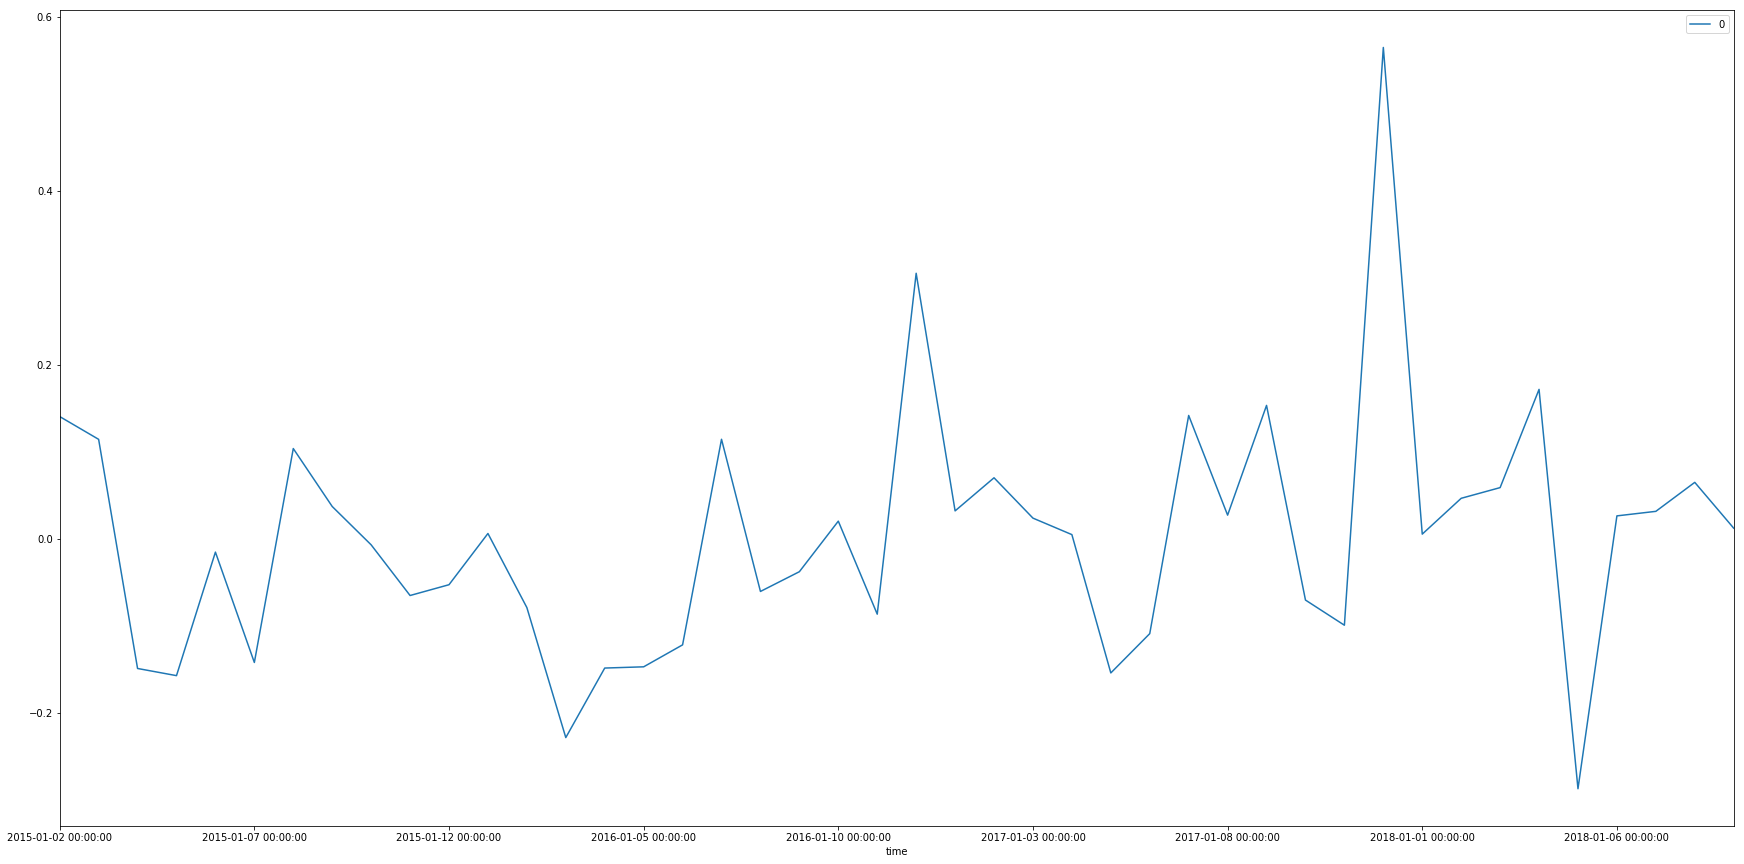

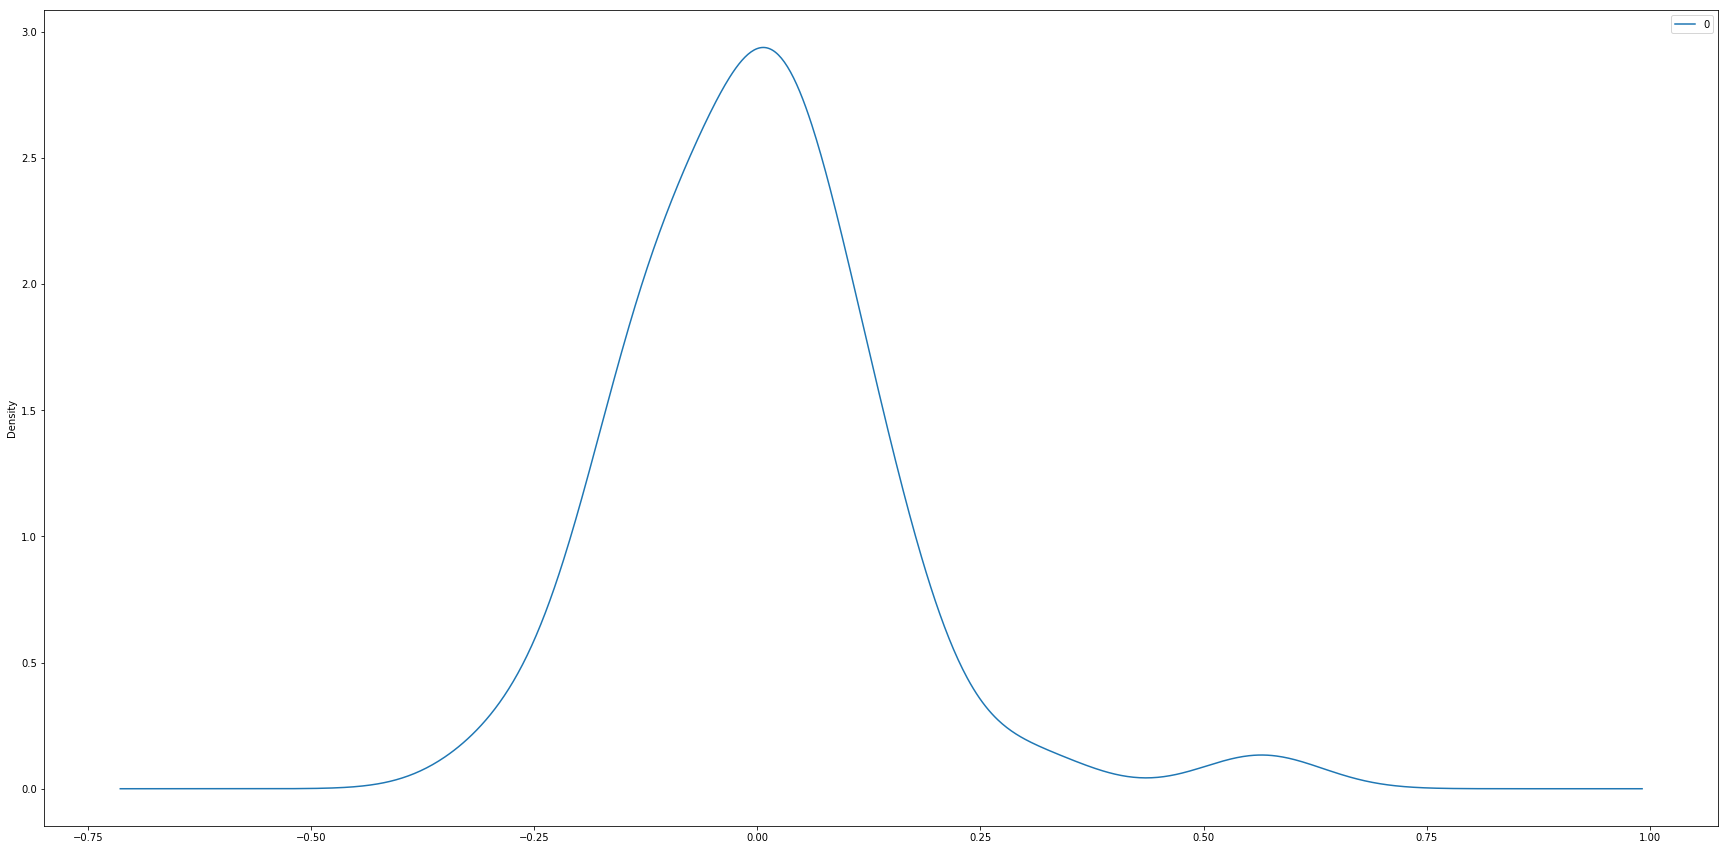

In [135]:
#ARIMA fit Asda marketshare
model = ARIMA(asdaseries, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(30,15))
residuals.plot(kind='kde', figsize=(30,15))
print(residuals.describe())    
   

Plotting AR model


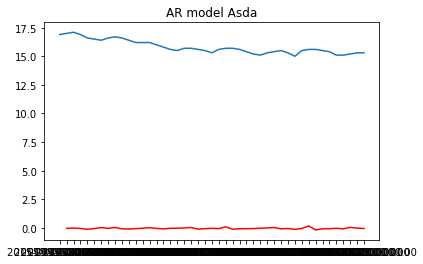

In [136]:
#AR Model Asda
#making order=(2,1,0) gives RSS=1.5023
model = ARIMA(asdaseries, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(asdaseries)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('AR model Asda')
print('Plotting AR model')

In [137]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [138]:
indexdf = pd.date_range(start='2015-1-1', periods=45, freq='M') 
indexdf=indexdf.to_period()

X=asdaseries
X.index = indexdf

In [139]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:342.3299580821796
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:85845.75654900272
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:34.99004177466122
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:241.2381091414582
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:219.97251867219023
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:251.27932602255504
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:227.70047528644645
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:239.61971452928998
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:220.91720817558436


In [140]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))



print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMA:',pdq[0])
print('ARIMA:',pdq[1])
print('ARIMA:',pdq[2])


Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (0, 0, 0)
ARIMA: (0, 0, 1)
ARIMA: (0, 1, 0)


In [141]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.ARIMA(X,
                                            order=param)
                                            #seasonal_order=param_seasonal,
                                            #enforce_stationarity=False,
                                            #enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA:',param, results.aic)
        except:
            continue

ARIMA: (0, 0, 0) 83.14757449504833
ARIMA: (0, 0, 1) 37.63142828630012
ARIMA: (0, 1, 0) -27.40539095005957
ARIMA: (0, 1, 1) -28.08838947676219
ARIMA: (1, 0, 0) -21.818752827972972
ARIMA: (1, 0, 1) -23.808397090831377
ARIMA: (1, 1, 0) -26.97417614951135


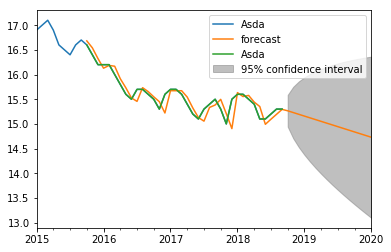

                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0357      0.032     -1.129      0.265      -0.098       0.026
ma.L1.D.Asda     0.2859      0.156      1.834      0.074      -0.020       0.592


In [142]:
####grid search (or hyperparameter optimization) for model selection####
####ARIMA(0, 0, 1)x(0, 1, 0, 12)12
import statsmodels.api as sm
#sm.tsa.ARIMA()



mod = sm.tsa.ARIMA(asdaseries,order=(0, 1, 1))
results = mod.fit()
fig, ax = plt.subplots()
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = results.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.show()



print(results.summary().tables[1])

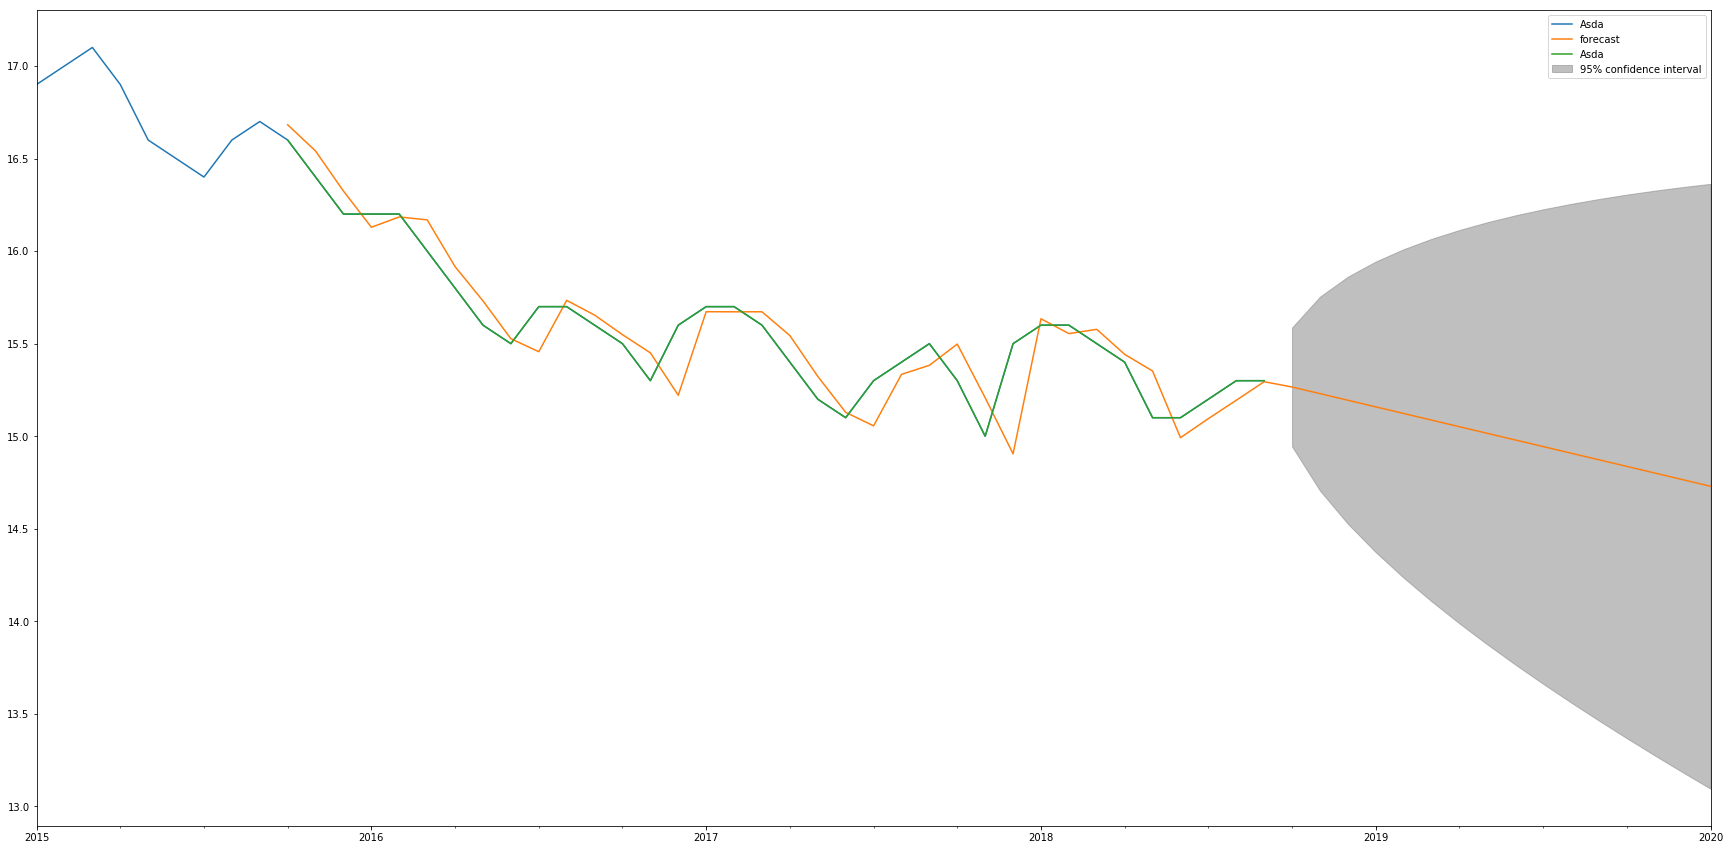

In [143]:
X=asdaseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)

plt.show()

In [144]:
print(res)

In [145]:
X = asdaseries.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=15.099691, expected=15.100000
predicted=15.039348, expected=15.300000
predicted=15.363220, expected=15.400000
predicted=15.367801, expected=15.500000
predicted=15.515363, expected=15.300000
predicted=15.170477, expected=15.000000
predicted=14.875211, expected=15.500000
predicted=15.705856, expected=15.600000
predicted=15.550813, expected=15.600000
predicted=15.578848, expected=15.500000
predicted=15.442086, expected=15.400000
predicted=15.350394, expected=15.100000
predicted=14.983988, expected=15.100000
predicted=15.085127, expected=15.200000
predicted=15.191231, expected=15.300000
predicted=15.294305, expected=15.300000
Test MSE: 0.042


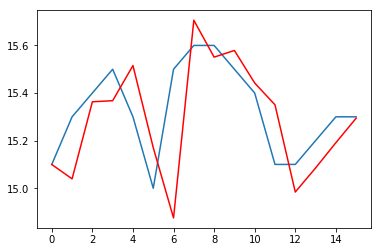

In [146]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')

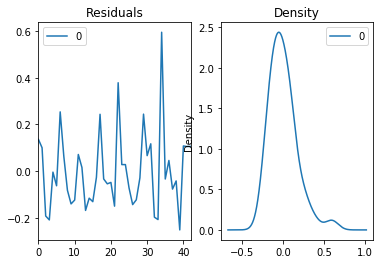

In [147]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

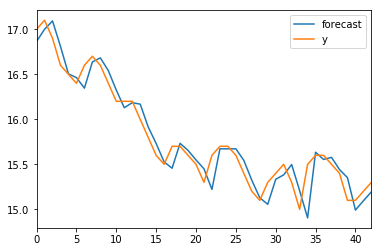

In [148]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

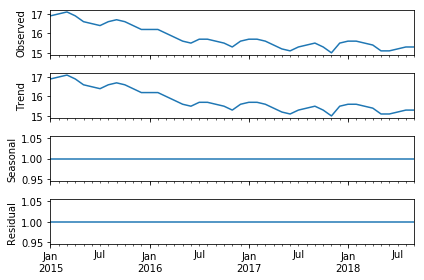

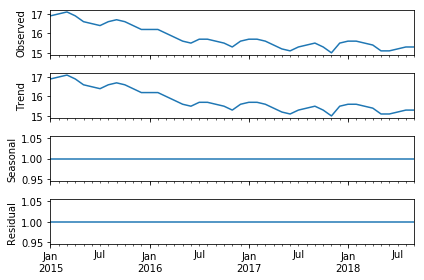

In [149]:
result = seasonal_decompose(asdaseries, model='multiplicative', freq=1)

result.plot()



In [150]:
####Auto Arima Forecast in Python###

import pmdarima as pm


model = pm.auto_arima(asdaseries, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())






Fit ARIMA: order=(1, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=-27.405, BIC=-23.837, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-26.974, BIC=-21.622, Fit time=0.042 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-28.088, BIC=-22.736, Fit time=0.031 seconds
Fit ARIMA: order=(0, 1, 2); AIC=-29.001, BIC=-21.865, Fit time=0.104 seconds
Fit ARIMA: order=(1, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 3); AIC=-29.251, BIC=-20.330, Fit time=0.168 seconds
Total fit time: 0.448 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   44
Model:                 ARIMA(0, 1, 3)   Log Likelihood                  19.625
Method:                       css-mle   S.D. of innovations              0.154
Date:                Wed, 12 Jun 2019   AIC                         

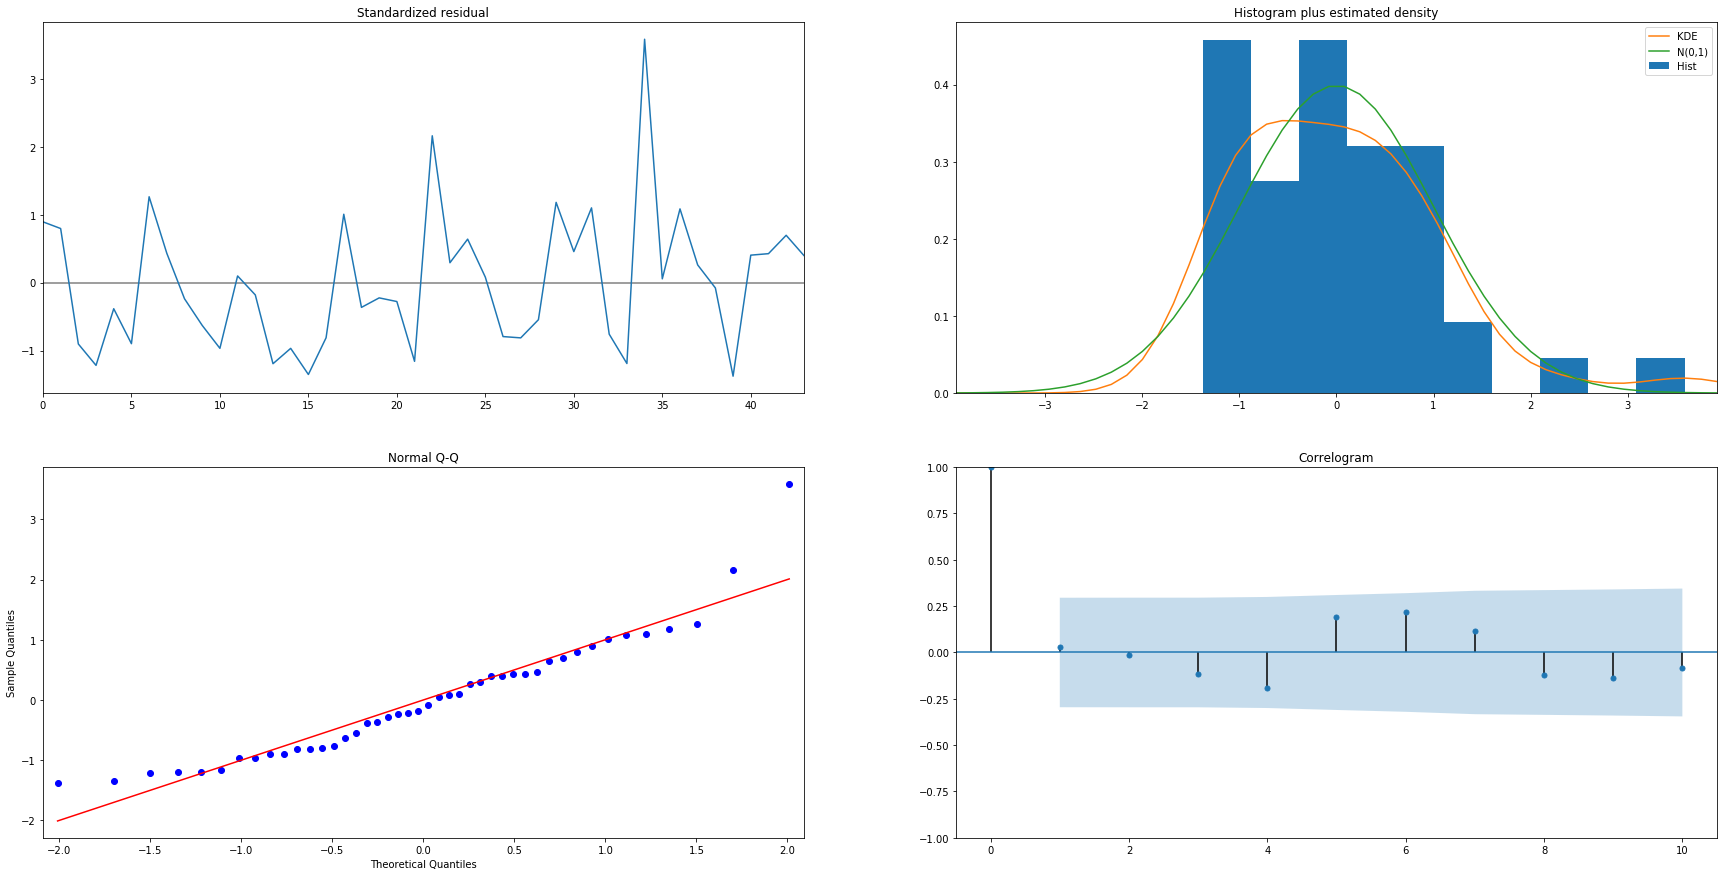

In [151]:
model.plot_diagnostics(figsize=(30,15))
plt.show()

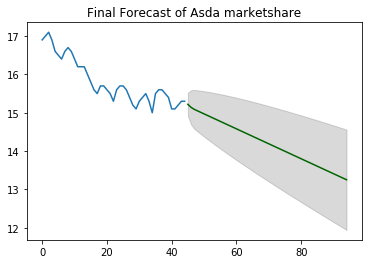

In [152]:
# Forecast


n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(X), len(X)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(X)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Asda marketshare")
plt.show()

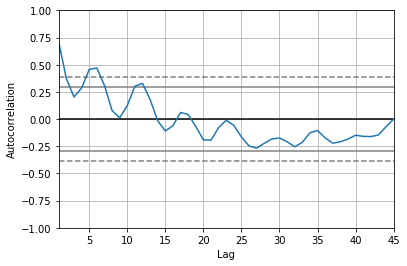

In [153]:
morrisonseries = glv10adf['Morrisons']
autocorrelation_plot(morrisonseries)

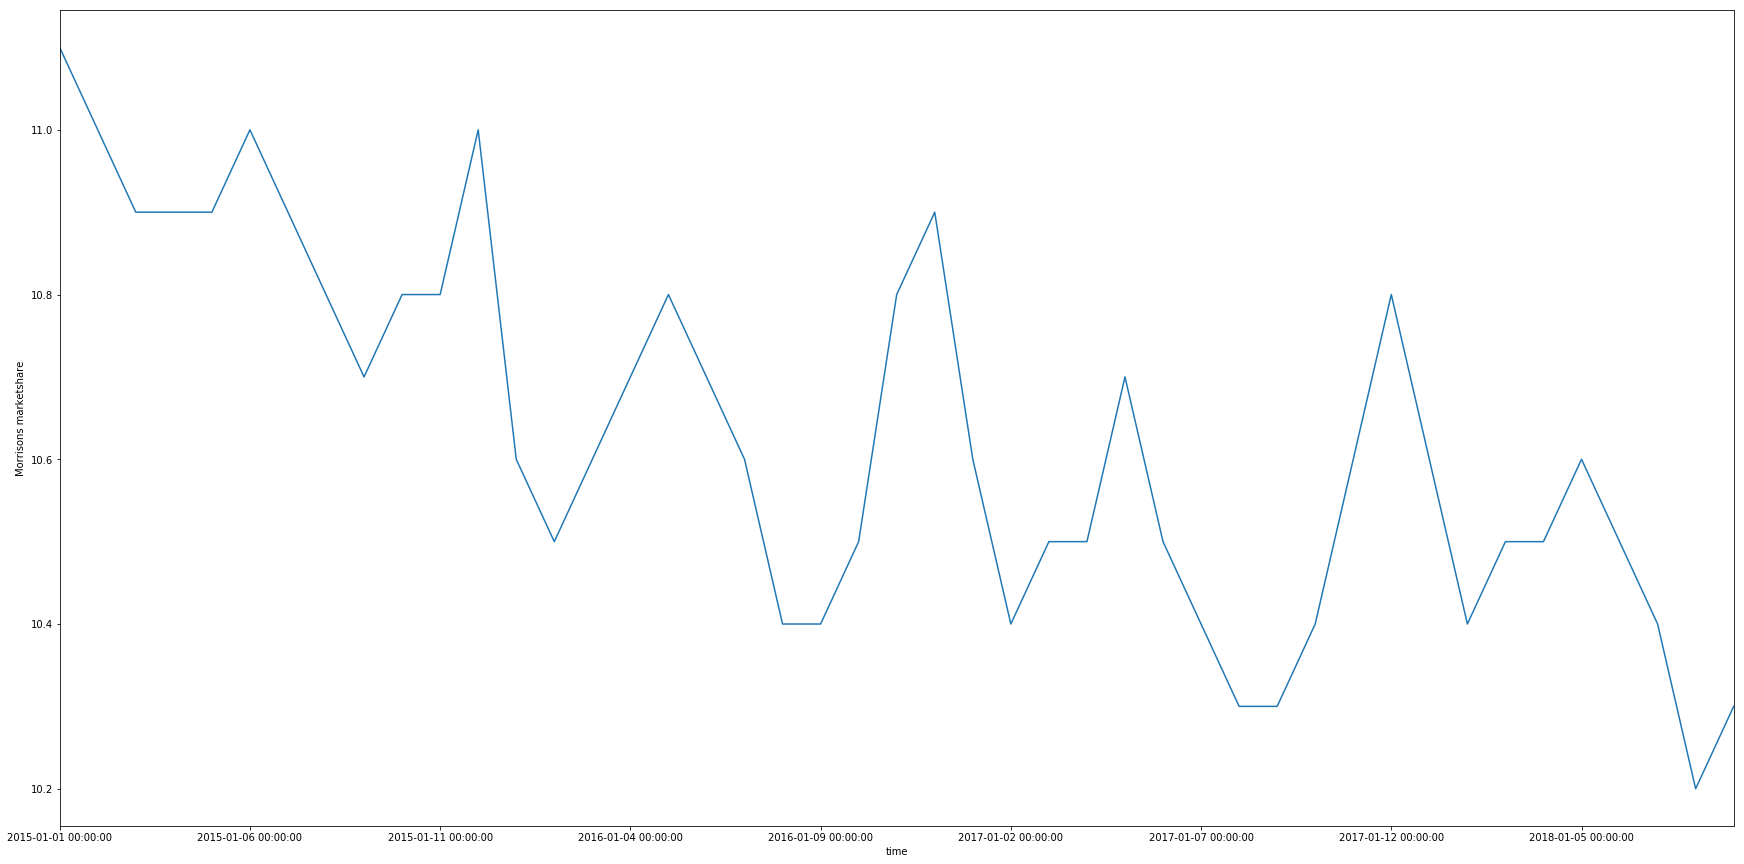

In [154]:
## plot graph
fig= plt.figure(figsize=(30,15))
plt.xlabel('Time')
plt.ylabel('Morrisons marketshare')
#fig.autofmt_xdate()
#plt.plot(morrisonseries)## plot graph
morrisonseries.plot()
 

In [155]:
#Determine rolling statistics
rolmean = morrisonseries.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = morrisonseries.rolling(window=12).std()
print(rolmean,rolstd)

time
2015-01-01 00:00:00          NaN
2015-01-02 00:00:00          NaN
2015-01-03 00:00:00          NaN
2015-01-04 00:00:00          NaN
2015-01-05 00:00:00          NaN
2015-01-06 00:00:00          NaN
2015-01-07 00:00:00          NaN
2015-01-08 00:00:00          NaN
2015-01-09 00:00:00          NaN
2015-01-10 00:00:00          NaN
2015-01-11 00:00:00          NaN
2015-01-12 00:00:00    10.900000
2016-01-01 00:00:00    10.858333
2016-01-02 00:00:00    10.816667
2016-01-03 00:00:00    10.791667
2016-01-04 00:00:00    10.775000
2016-01-05 00:00:00    10.766667
2016-01-06 00:00:00    10.741667
2016-01-07 00:00:00    10.716667
2016-01-08 00:00:00    10.683333
2016-01-09 00:00:00    10.658333
2016-01-10 00:00:00    10.633333
2016-01-11 00:00:00    10.633333
2016-01-12 00:00:00    10.625000
2017-01-01 00:00:00    10.625000
2017-01-02 00:00:00    10.616667
2017-01-03 00:00:00    10.608333
2017-01-04 00:00:00    10.591667
2017-01-05 00:00:00    10.583333
2017-01-06 00:00:00    10.566667
2017-

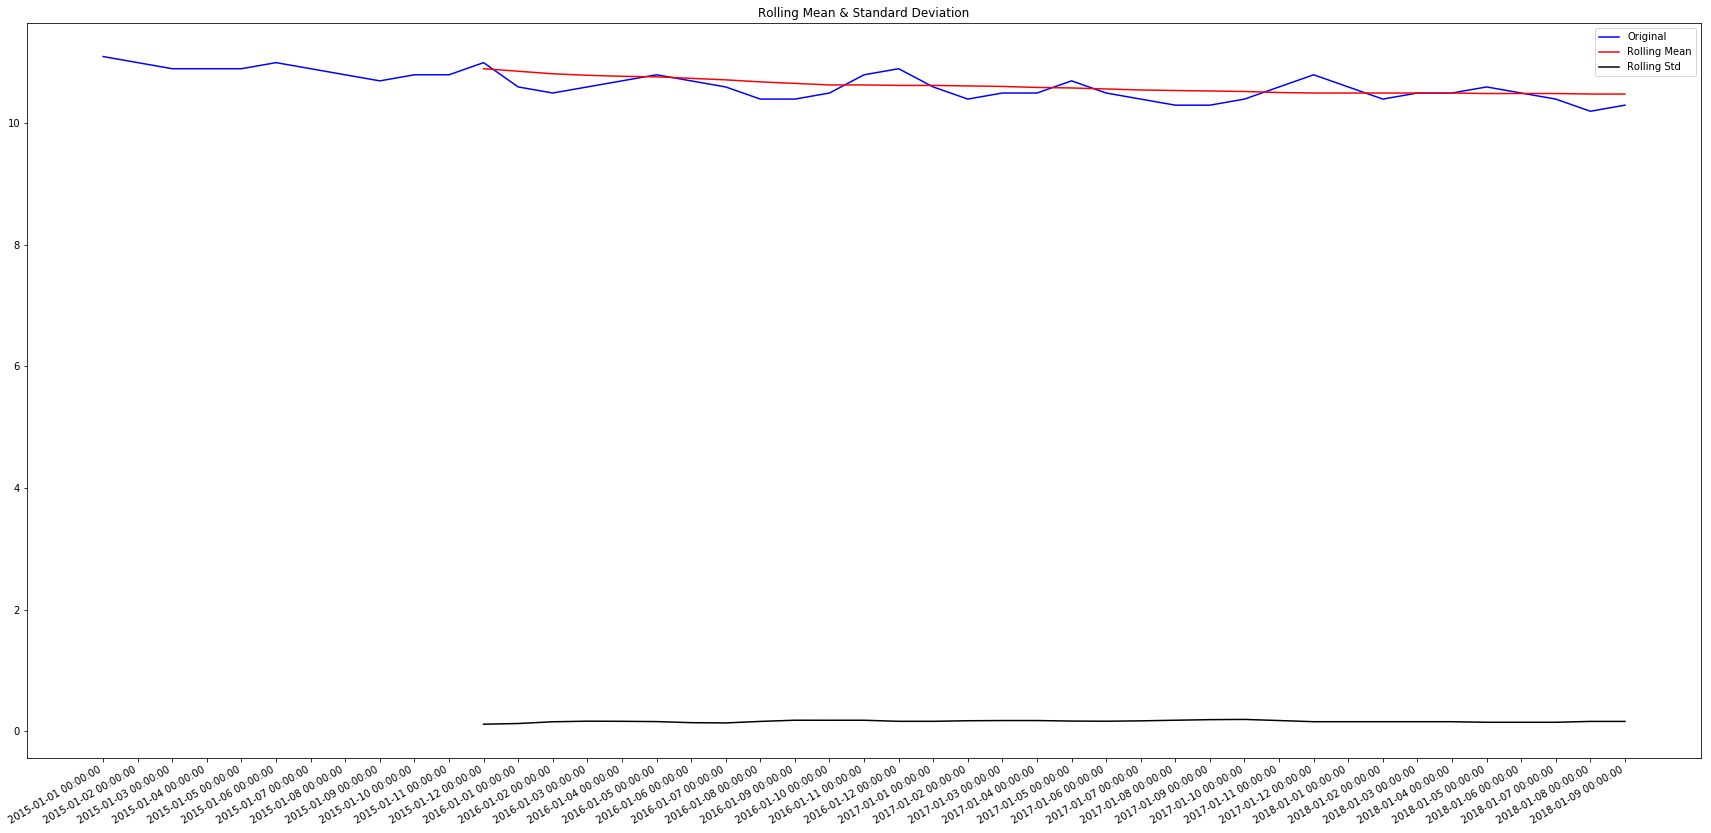

In [156]:
#Plot rolling statistics sainsburys
fig= plt.figure(figsize=(30,15))
orig = plt.plot(morrisonseries, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
fig.autofmt_xdate()
plt.show(block=False)

In [157]:
morrisonseries

time
2015-01-01 00:00:00    11.1
2015-01-02 00:00:00    11.0
2015-01-03 00:00:00    10.9
2015-01-04 00:00:00    10.9
2015-01-05 00:00:00    10.9
2015-01-06 00:00:00    11.0
2015-01-07 00:00:00    10.9
2015-01-08 00:00:00    10.8
2015-01-09 00:00:00    10.7
2015-01-10 00:00:00    10.8
2015-01-11 00:00:00    10.8
2015-01-12 00:00:00    11.0
2016-01-01 00:00:00    10.6
2016-01-02 00:00:00    10.5
2016-01-03 00:00:00    10.6
2016-01-04 00:00:00    10.7
2016-01-05 00:00:00    10.8
2016-01-06 00:00:00    10.7
2016-01-07 00:00:00    10.6
2016-01-08 00:00:00    10.4
2016-01-09 00:00:00    10.4
2016-01-10 00:00:00    10.5
2016-01-11 00:00:00    10.8
2016-01-12 00:00:00    10.9
2017-01-01 00:00:00    10.6
2017-01-02 00:00:00    10.4
2017-01-03 00:00:00    10.5
2017-01-04 00:00:00    10.5
2017-01-05 00:00:00    10.7
2017-01-06 00:00:00    10.5
2017-01-07 00:00:00    10.4
2017-01-08 00:00:00    10.3
2017-01-09 00:00:00    10.3
2017-01-10 00:00:00    10.4
2017-01-11 00:00:00    10.6
2017-01-12 00:0

In [158]:
#Test value ~ critical value => stationary series
#Perform Augmented Dickey–Fuller test:
X=morrisonseries.values
print('Results of Dickey Fuller Test:')
dftest = adfuller(X, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -1.571303
p-value                         0.497991
#Lags Used                      4.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


                             ARIMA Model Results                              
Dep. Variable:            D.Morrisons   No. Observations:                   44
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  21.892
Method:                       css-mle   S.D. of innovations              0.147
Date:                Wed, 12 Jun 2019   AIC                            -37.784
Time:                        18:38:27   BIC                            -32.432
Sample:                             1   HQIC                           -35.799
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0180      0.025     -0.713      0.480      -0.067       0.031
ma.L1.D.Morrisons     0.1392      0.164      0.850      0.400      -0.182       0.460
                        

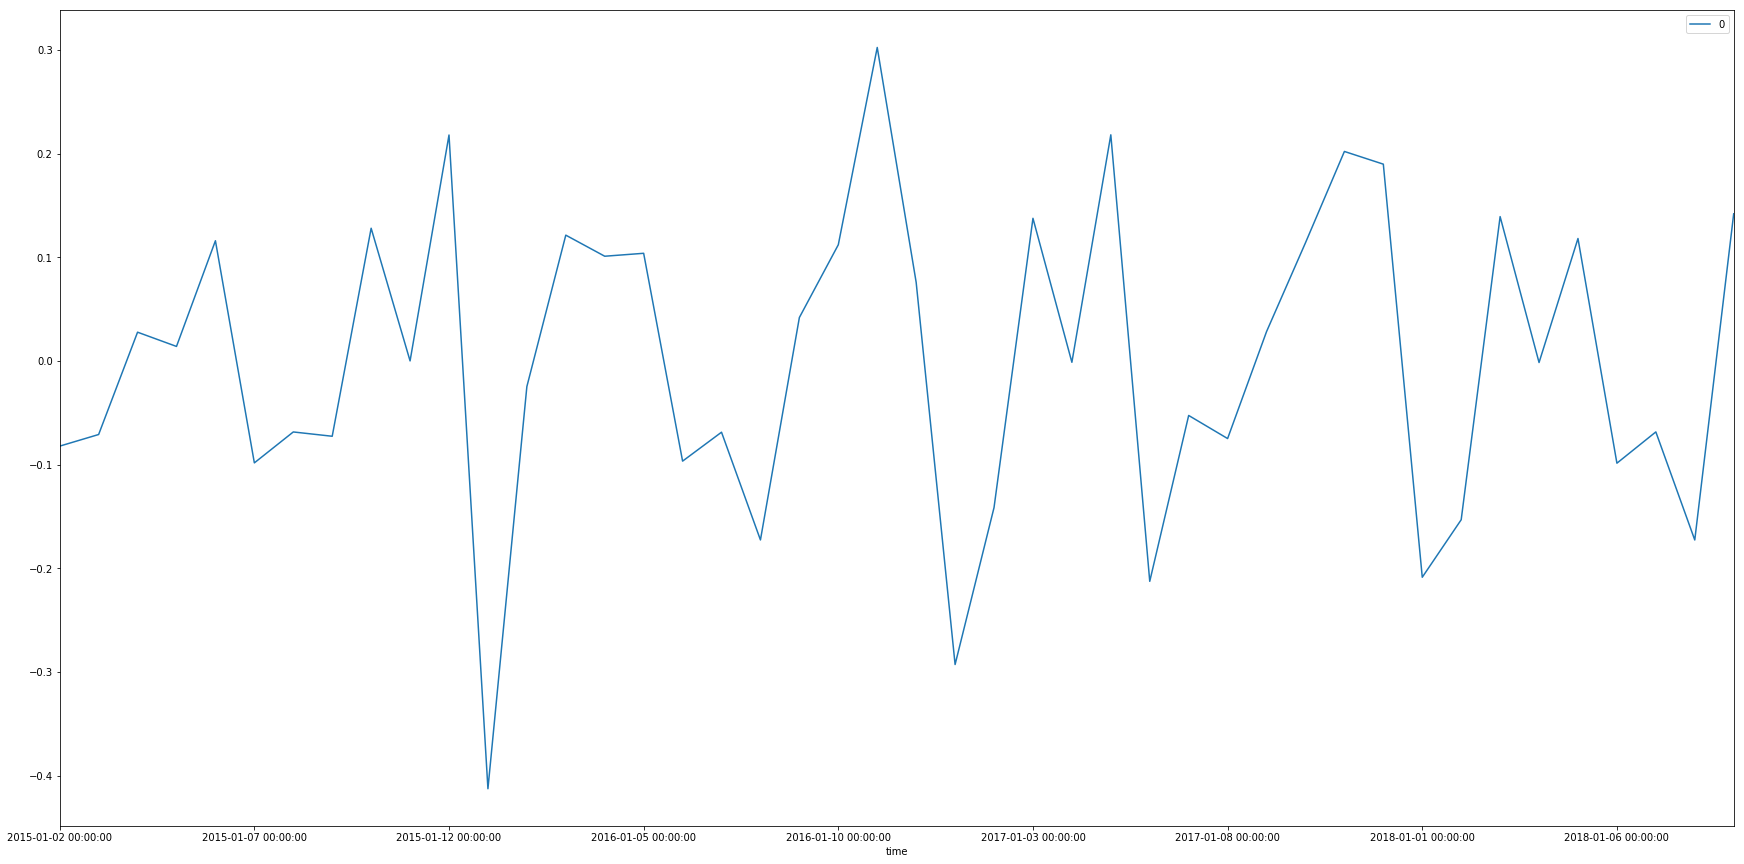

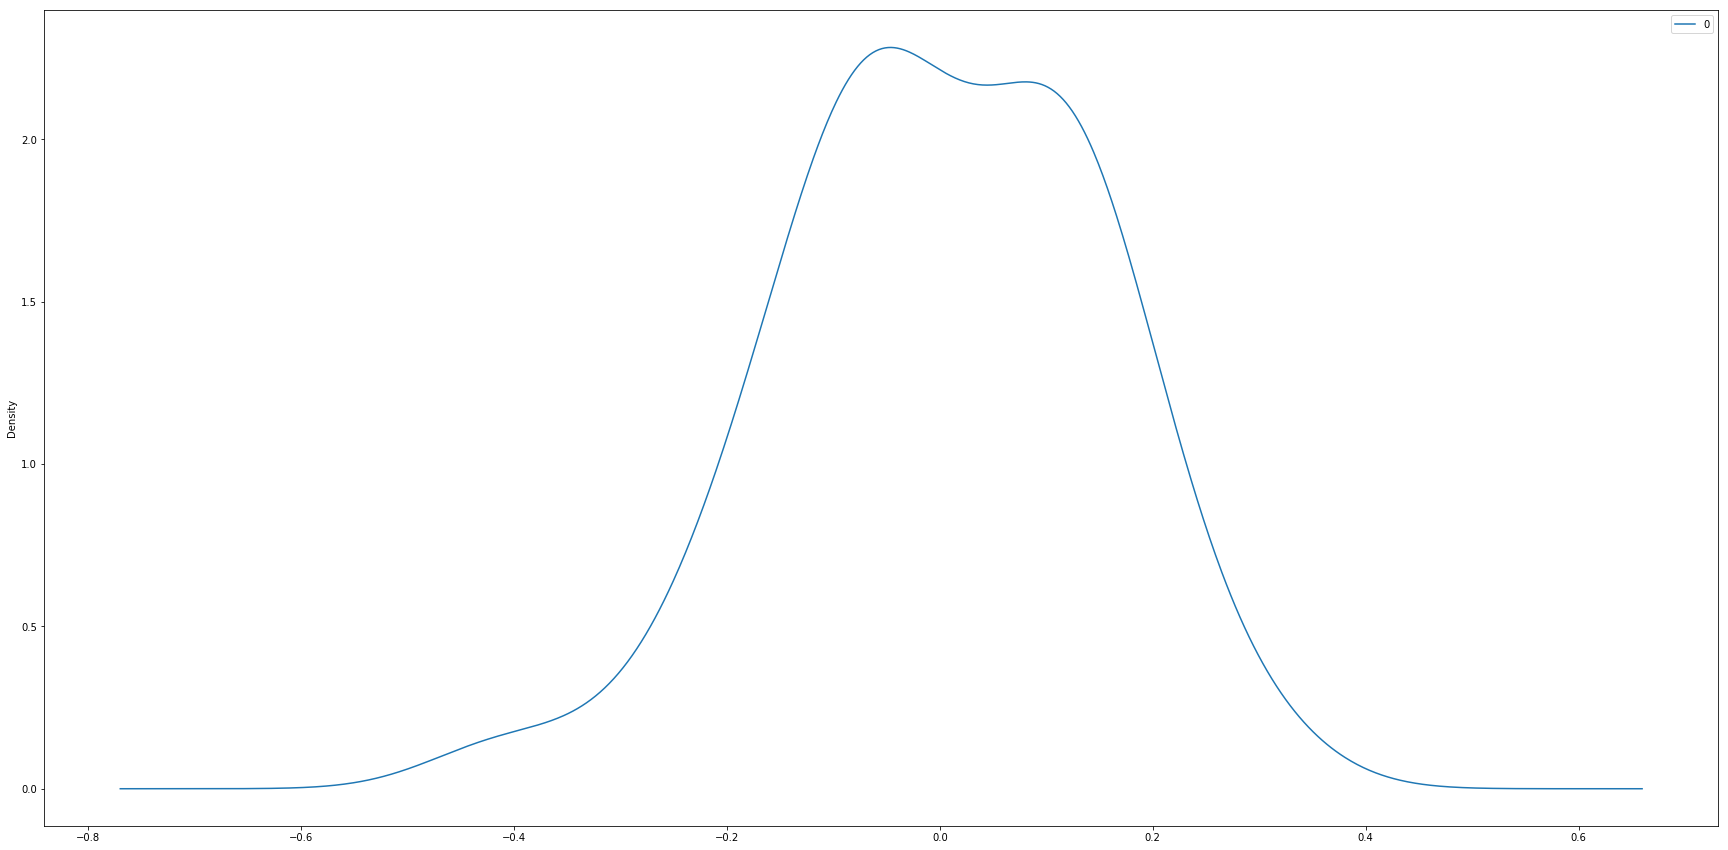

In [159]:
#ARIMA fit Morrisons marketshare
model = ARIMA(morrisonseries, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(30,15))
residuals.plot(kind='kde', figsize=(30,15))
print(residuals.describe())     

In [160]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [161]:
indexdf = pd.date_range(start='2015-1-1', periods=45, freq='M') 
indexdf=indexdf.to_period()

X=morrisonseries
X.index = indexdf

In [162]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:342.3299580821796
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:85845.75654900272
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:34.99004177466122
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:241.2381091414582
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:219.97251867219023
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:251.27932602255504
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:227.70047528644645
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:239.61971452928998
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:220.91720817558436


In [163]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))



print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMA:',pdq[0])
print('ARIMA:',pdq[1])
print('ARIMA:',pdq[2])


Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (0, 0, 0)
ARIMA: (0, 0, 1)
ARIMA: (0, 1, 0)


In [164]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.ARIMA(X,
                                            order=param)
                                            #seasonal_order=param_seasonal,
                                            #enforce_stationarity=False,
                                            #enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA:',param, results.aic)
        except:
            continue

ARIMA: (0, 0, 0) -3.8609346034356378
ARIMA: (0, 0, 1) -29.498985094977755
ARIMA: (0, 1, 0) -39.1846282777137
ARIMA: (0, 1, 1) -37.78428214011183
ARIMA: (1, 0, 0) -40.07930063169526
ARIMA: (1, 0, 1) -40.956057563213776
ARIMA: (1, 1, 0) -37.527602227232904
ARIMA: (1, 1, 1) -44.728995218071134


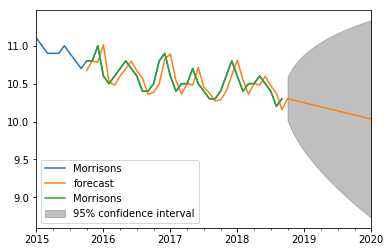

                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0180      0.025     -0.713      0.480      -0.067       0.031
ma.L1.D.Morrisons     0.1392      0.164      0.850      0.400      -0.182       0.460


In [165]:
####grid search (or hyperparameter optimization) for model selection####
####ARIMA(0, 0, 1)x(0, 1, 0, 12)12
import statsmodels.api as sm
#sm.tsa.ARIMA()



mod = sm.tsa.ARIMA(morrisonseries,order=(0, 1, 1))
results = mod.fit()
fig, ax = plt.subplots()
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = results.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.show()



print(results.summary().tables[1])

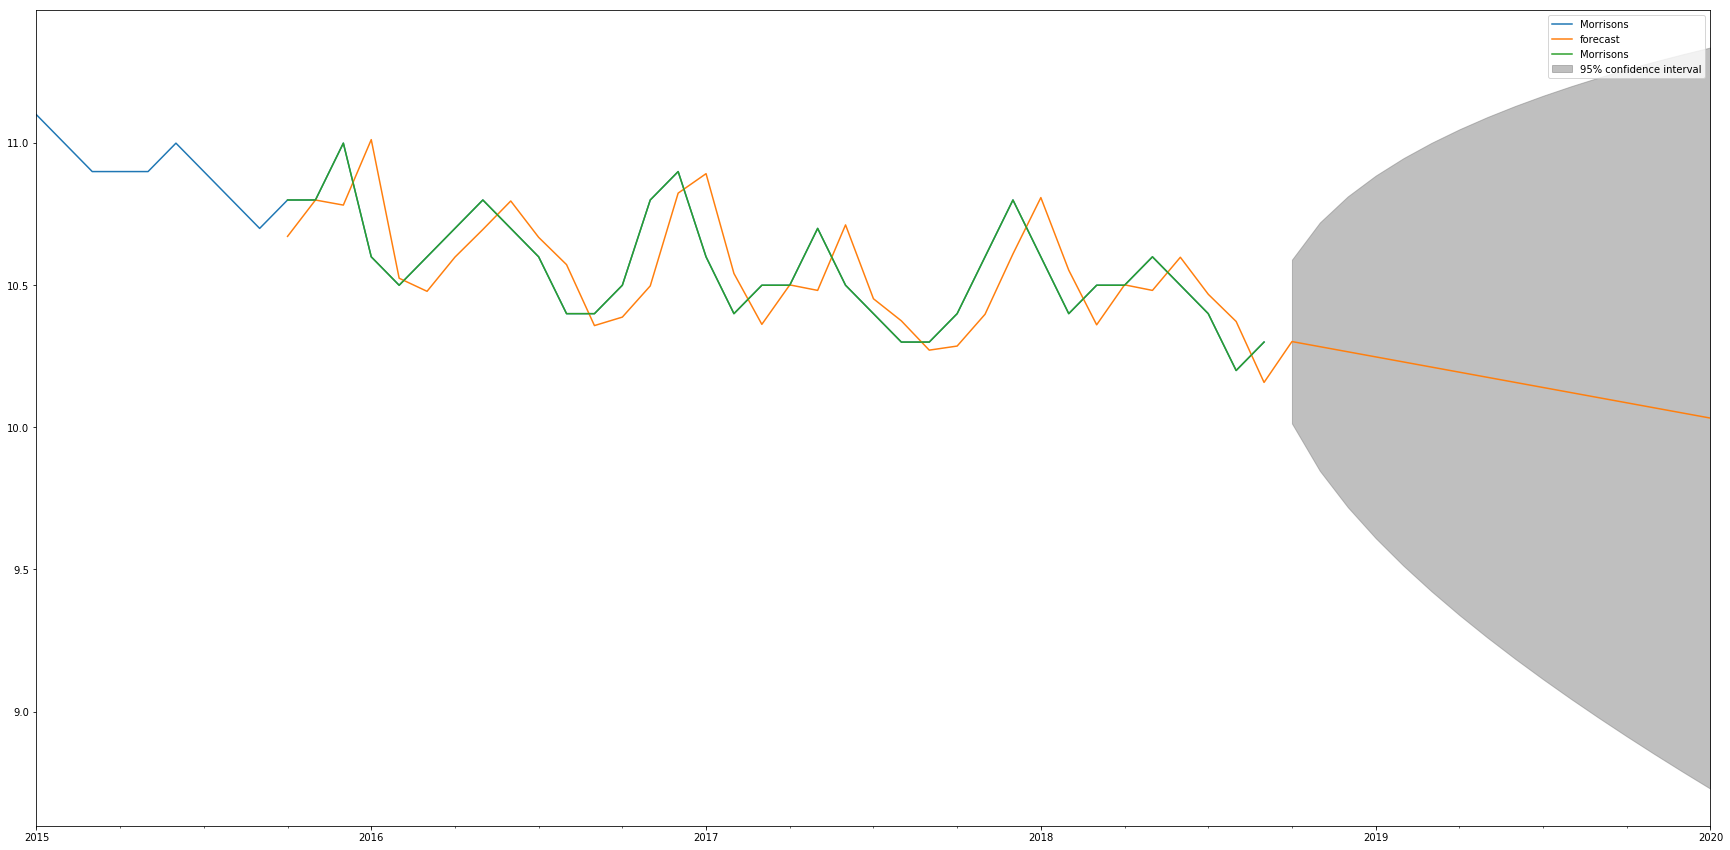

In [166]:
X=morrisonseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)

plt.show()

In [167]:
print(res)

In [168]:
X = morrisonseries.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=10.720553, expected=10.500000
predicted=10.466043, expected=10.400000
predicted=10.370805, expected=10.300000
predicted=10.266923, expected=10.300000
predicted=10.277950, expected=10.400000
predicted=10.391263, expected=10.600000
predicted=10.613905, expected=10.800000
predicted=10.823750, expected=10.600000
predicted=10.555003, expected=10.400000
predicted=10.353767, expected=10.500000
predicted=10.508408, expected=10.500000
predicted=10.482944, expected=10.600000
predicted=10.606243, expected=10.500000
predicted=10.469767, expected=10.400000
predicted=10.372270, expected=10.200000
predicted=10.150023, expected=10.300000
Test MSE: 0.021


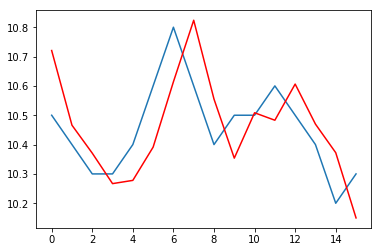

In [169]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')

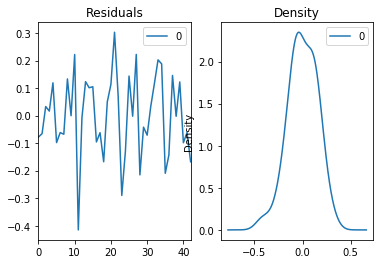

In [170]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

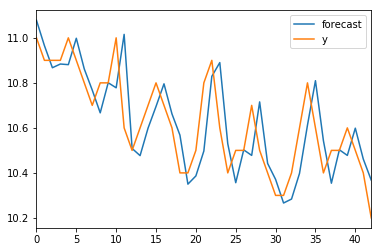

In [171]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

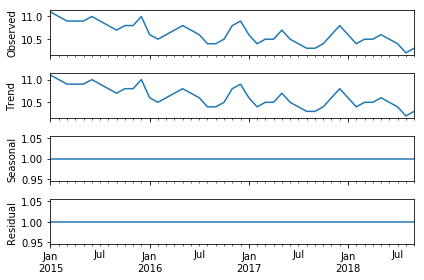

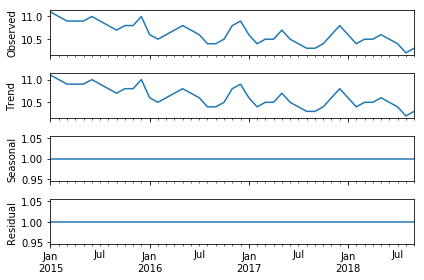

In [172]:
result = seasonal_decompose(morrisonseries, model='multiplicative', freq=1)

result.plot()



In [173]:
####Auto Arima Forecast in Python for Morrisons###

import pmdarima as pm


model = pm.auto_arima(morrisonseries, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())






Fit ARIMA: order=(1, 1, 1); AIC=-44.729, BIC=-37.592, Fit time=0.187 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-39.185, BIC=-35.616, Fit time=0.005 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-37.528, BIC=-32.175, Fit time=0.042 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-37.784, BIC=-32.432, Fit time=0.060 seconds
Fit ARIMA: order=(2, 1, 1); AIC=-52.617, BIC=-43.696, Fit time=0.245 seconds
Fit ARIMA: order=(2, 1, 0); AIC=-39.522, BIC=-32.385, Fit time=0.069 seconds
Fit ARIMA: order=(2, 1, 2); AIC=-56.495, BIC=-45.790, Fit time=0.412 seconds
Fit ARIMA: order=(3, 1, 3); AIC=-37.659, BIC=-23.386, Fit time=0.408 seconds
Fit ARIMA: order=(1, 1, 2); AIC=-47.234, BIC=-38.313, Fit time=0.270 seconds
Fit ARIMA: order=(3, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 3); AIC=-61.229, BIC=-48.739, Fit time=1.019 seconds
Fit ARIMA: order=(1, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 2.990 seconds
                             ARIMA Model Results                  

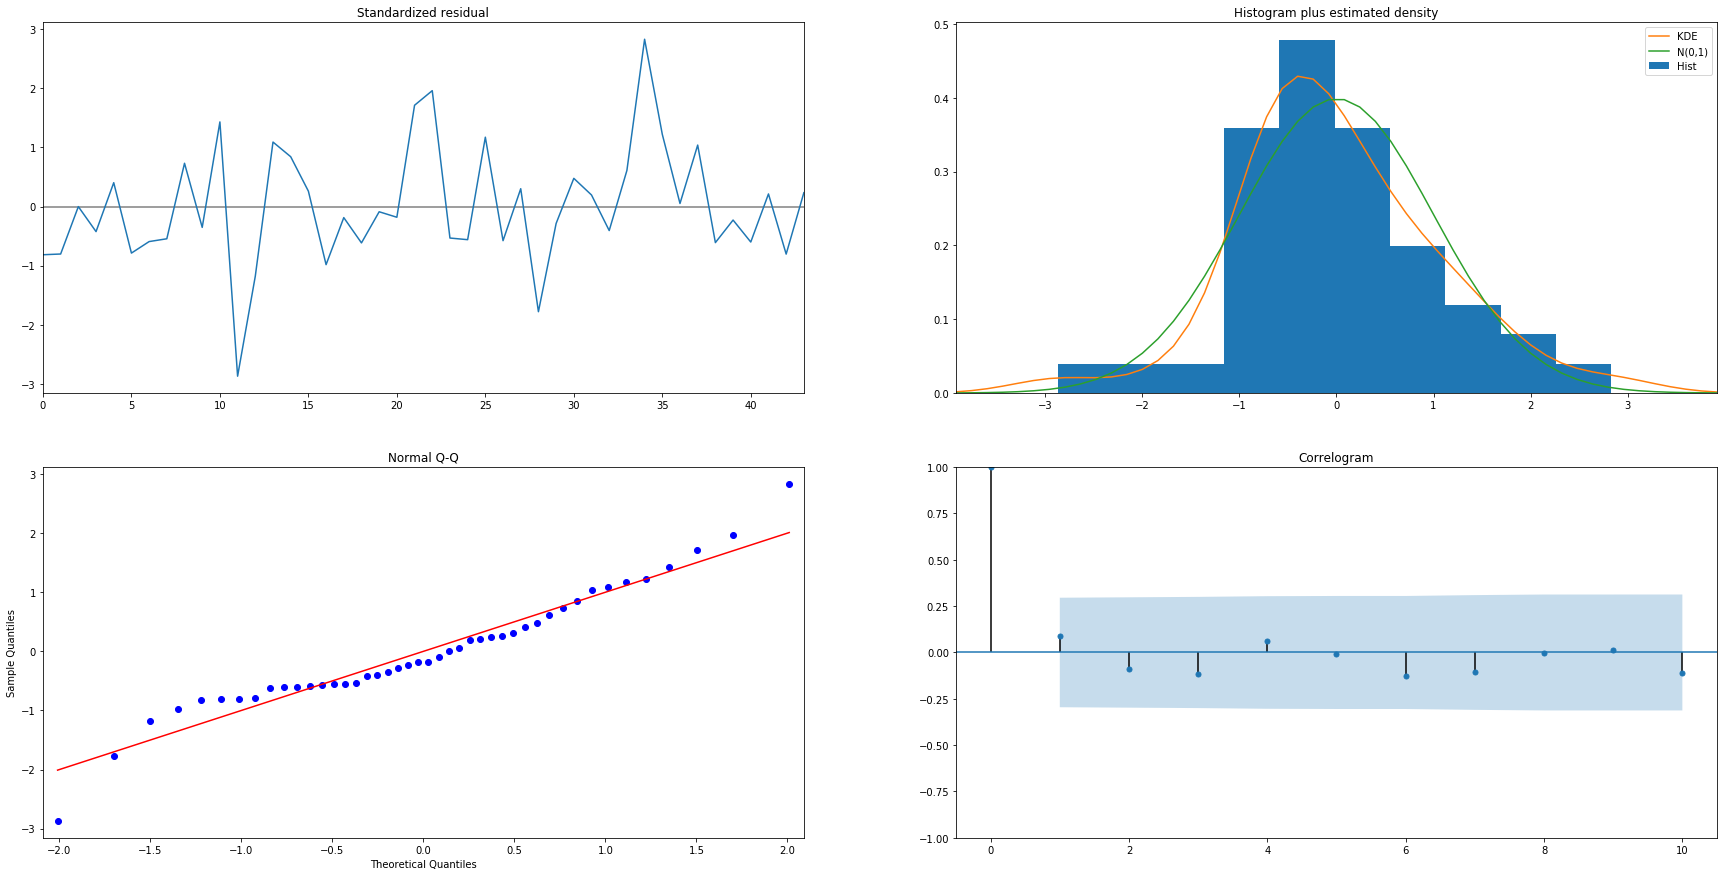

In [174]:
model.plot_diagnostics(figsize=(30,15))
plt.show()

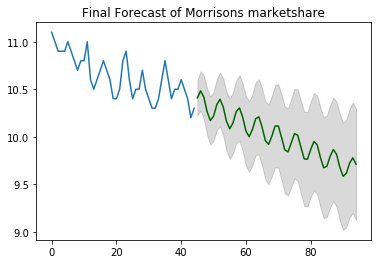

In [175]:
# Forecast


n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(X), len(X)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(X)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Morrisons marketshare")
plt.show()

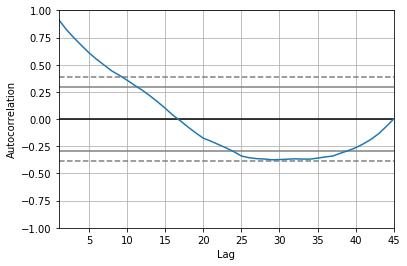

In [176]:
aldiseries = glv10adf['Aldi']
autocorrelation_plot(aldiseries)

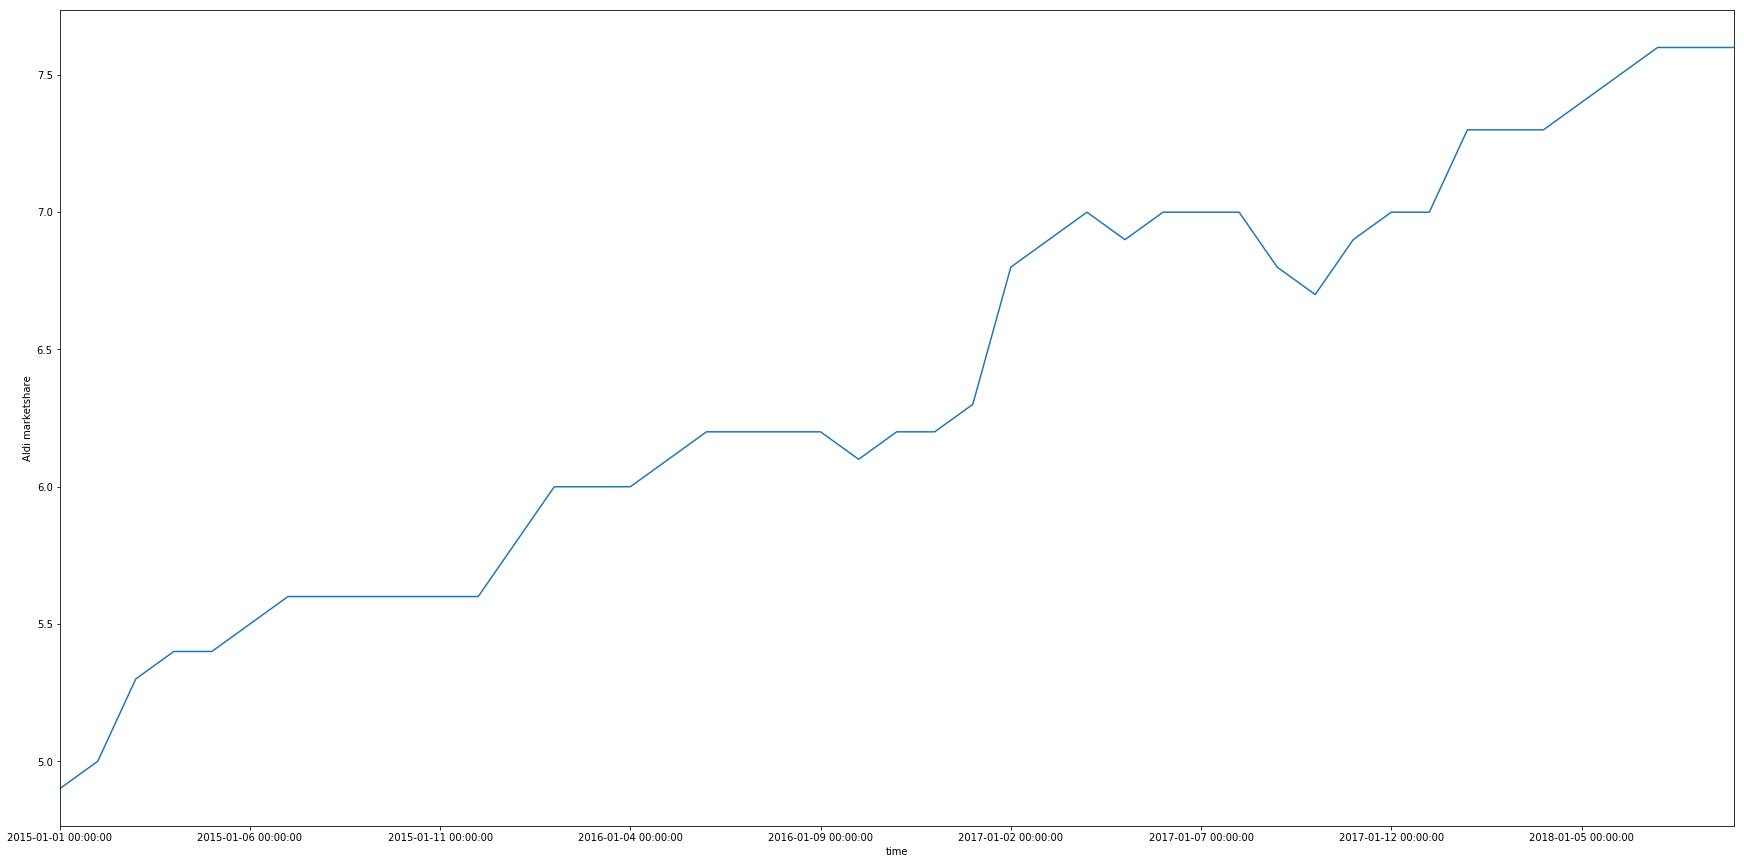

In [177]:
## plot graph
fig= plt.figure(figsize=(30,15))
plt.xlabel('Time')
plt.ylabel('Aldi marketshare')
#fig.autofmt_xdate()
aldiseries.plot() 

In [178]:
#Determine rolling statistics
rolmean = aldiseries.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = aldiseries.rolling(window=12).std()
print(rolmean,rolstd)

time
2015-01-01 00:00:00         NaN
2015-01-02 00:00:00         NaN
2015-01-03 00:00:00         NaN
2015-01-04 00:00:00         NaN
2015-01-05 00:00:00         NaN
2015-01-06 00:00:00         NaN
2015-01-07 00:00:00         NaN
2015-01-08 00:00:00         NaN
2015-01-09 00:00:00         NaN
2015-01-10 00:00:00         NaN
2015-01-11 00:00:00         NaN
2015-01-12 00:00:00    5.425000
2016-01-01 00:00:00    5.500000
2016-01-02 00:00:00    5.583333
2016-01-03 00:00:00    5.641667
2016-01-04 00:00:00    5.691667
2016-01-05 00:00:00    5.750000
2016-01-06 00:00:00    5.808333
2016-01-07 00:00:00    5.858333
2016-01-08 00:00:00    5.908333
2016-01-09 00:00:00    5.958333
2016-01-10 00:00:00    6.000000
2016-01-11 00:00:00    6.050000
2016-01-12 00:00:00    6.100000
2017-01-01 00:00:00    6.141667
2017-01-02 00:00:00    6.208333
2017-01-03 00:00:00    6.283333
2017-01-04 00:00:00    6.366667
2017-01-05 00:00:00    6.433333
2017-01-06 00:00:00    6.500000
2017-01-07 00:00:00    6.566667
201

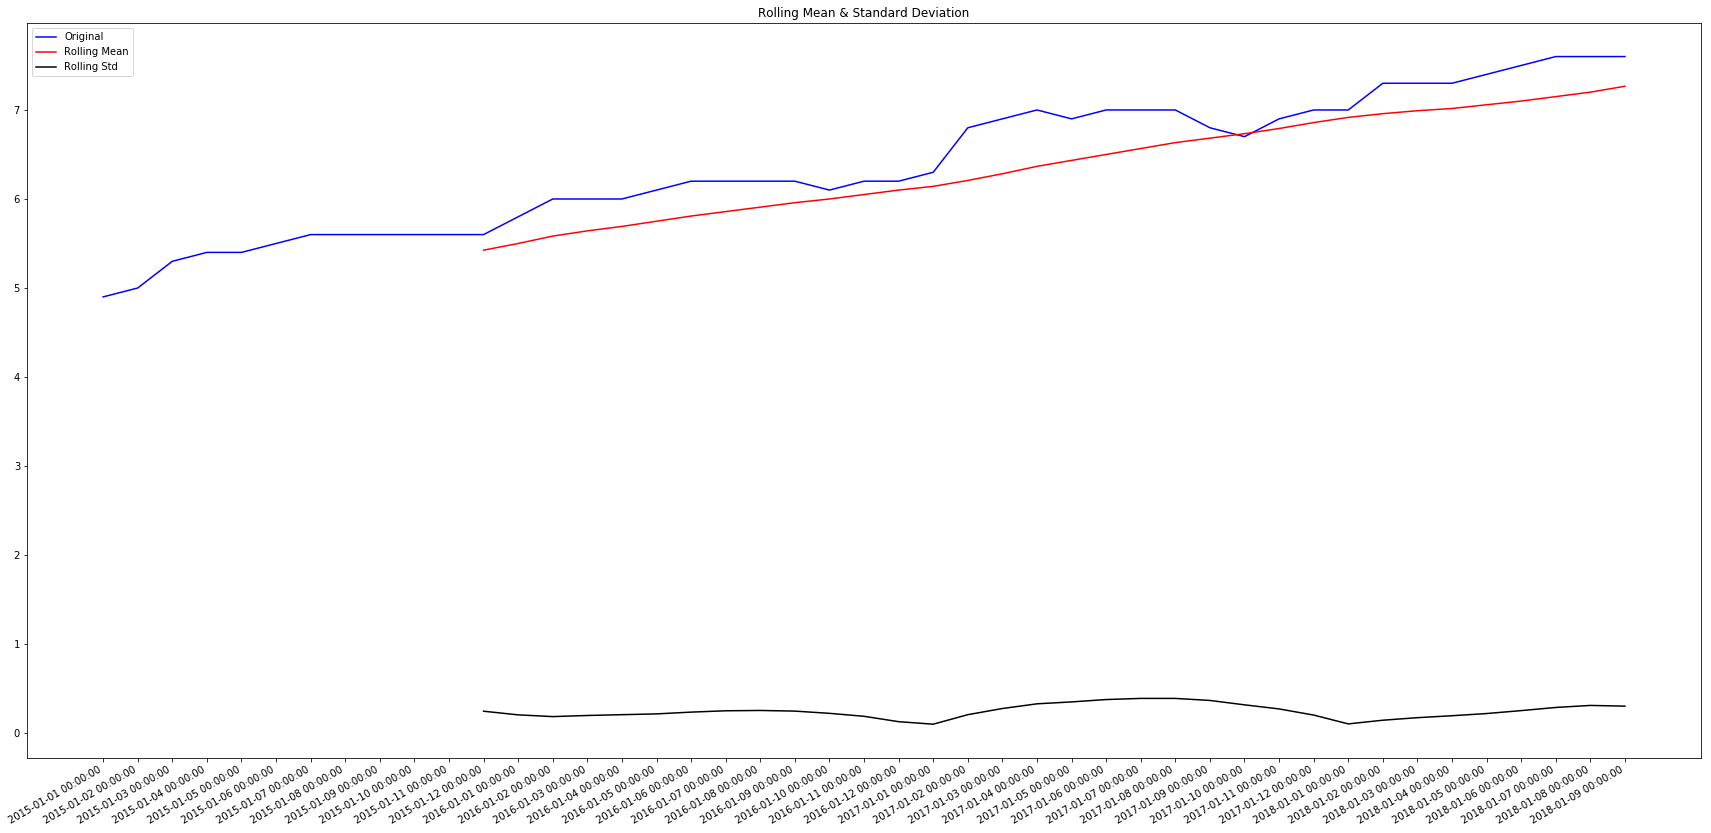

In [179]:
#Plot rolling statistics Aldi
fig= plt.figure(figsize=(30,15))
orig = plt.plot(aldiseries, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
fig.autofmt_xdate()
plt.show()

In [180]:
aldiseries

time
2015-01-01 00:00:00    4.9
2015-01-02 00:00:00    5.0
2015-01-03 00:00:00    5.3
2015-01-04 00:00:00    5.4
2015-01-05 00:00:00    5.4
2015-01-06 00:00:00    5.5
2015-01-07 00:00:00    5.6
2015-01-08 00:00:00    5.6
2015-01-09 00:00:00    5.6
2015-01-10 00:00:00    5.6
2015-01-11 00:00:00    5.6
2015-01-12 00:00:00    5.6
2016-01-01 00:00:00    5.8
2016-01-02 00:00:00    6.0
2016-01-03 00:00:00    6.0
2016-01-04 00:00:00    6.0
2016-01-05 00:00:00    6.1
2016-01-06 00:00:00    6.2
2016-01-07 00:00:00    6.2
2016-01-08 00:00:00    6.2
2016-01-09 00:00:00    6.2
2016-01-10 00:00:00    6.1
2016-01-11 00:00:00    6.2
2016-01-12 00:00:00    6.2
2017-01-01 00:00:00    6.3
2017-01-02 00:00:00    6.8
2017-01-03 00:00:00    6.9
2017-01-04 00:00:00    7.0
2017-01-05 00:00:00    6.9
2017-01-06 00:00:00    7.0
2017-01-07 00:00:00    7.0
2017-01-08 00:00:00    7.0
2017-01-09 00:00:00    6.8
2017-01-10 00:00:00    6.7
2017-01-11 00:00:00    6.9
2017-01-12 00:00:00    7.0
2018-01-01 00:00:00    

In [181]:
#Test value ~ critical value => stationary series
#Perform Augmented Dickey–Fuller test:
X=aldiseries.values
print('Results of Dickey Fuller Test:')
dftest = adfuller(X, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -1.151146
p-value                         0.694251
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


                             ARIMA Model Results                              
Dep. Variable:                 D.Aldi   No. Observations:                   44
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  32.360
Method:                       css-mle   S.D. of innovations              0.116
Date:                Wed, 12 Jun 2019   AIC                            -58.720
Time:                        18:38:48   BIC                            -53.368
Sample:                             1   HQIC                           -56.736
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0612      0.020      3.020      0.004       0.021       0.101
ma.L1.D.Aldi     0.1628      0.166      0.979      0.333      -0.163       0.489
                                    Roots   

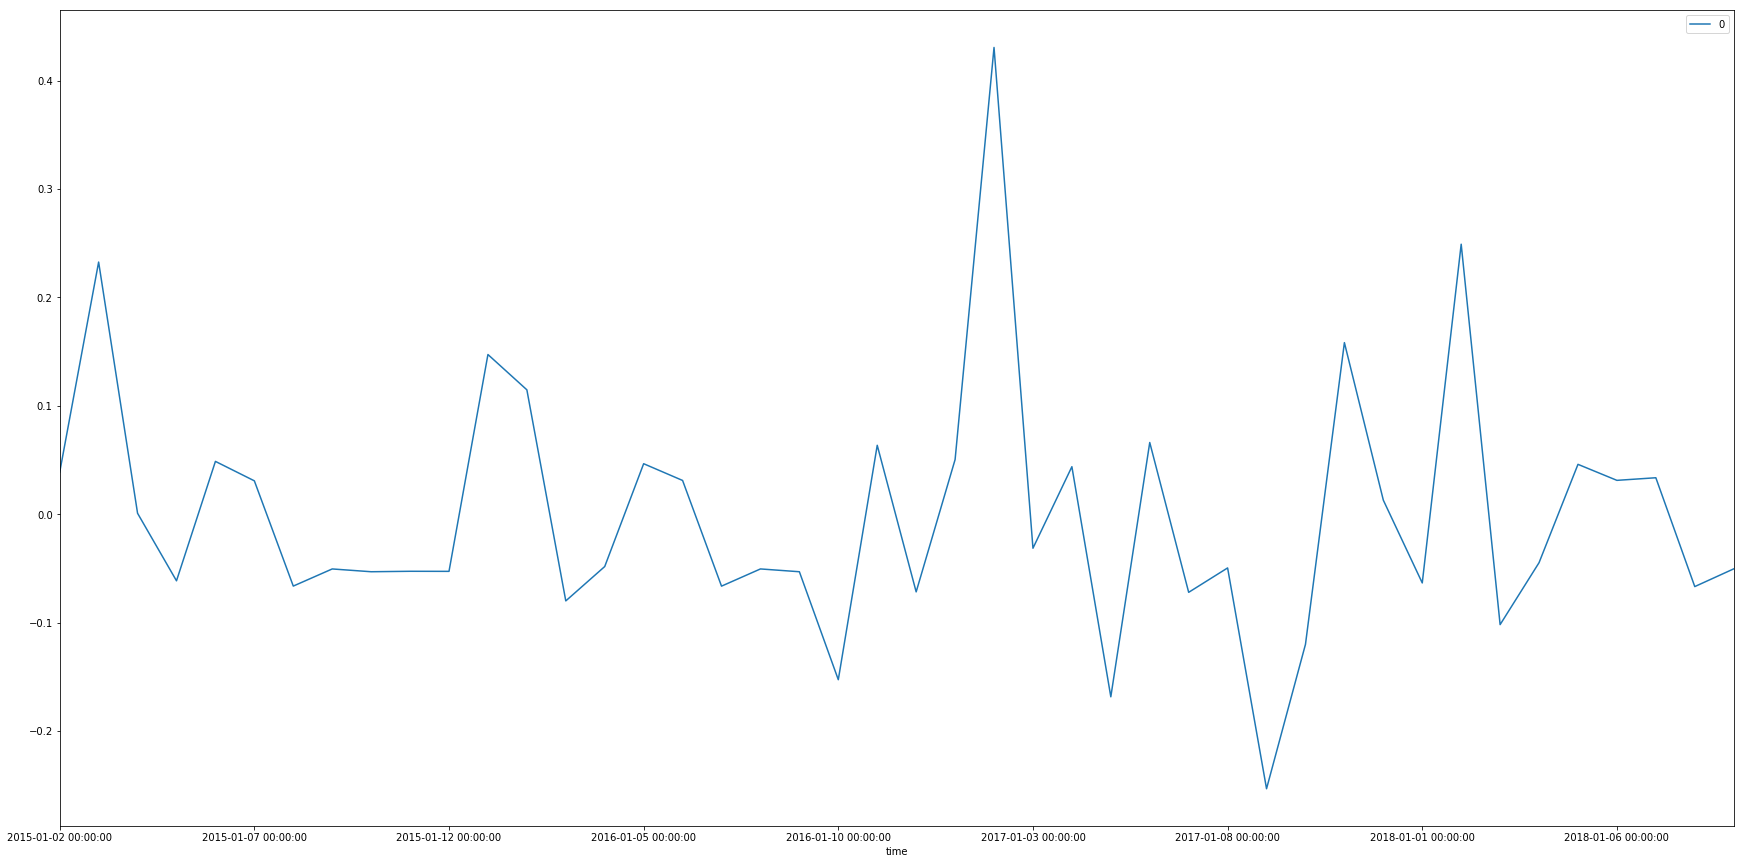

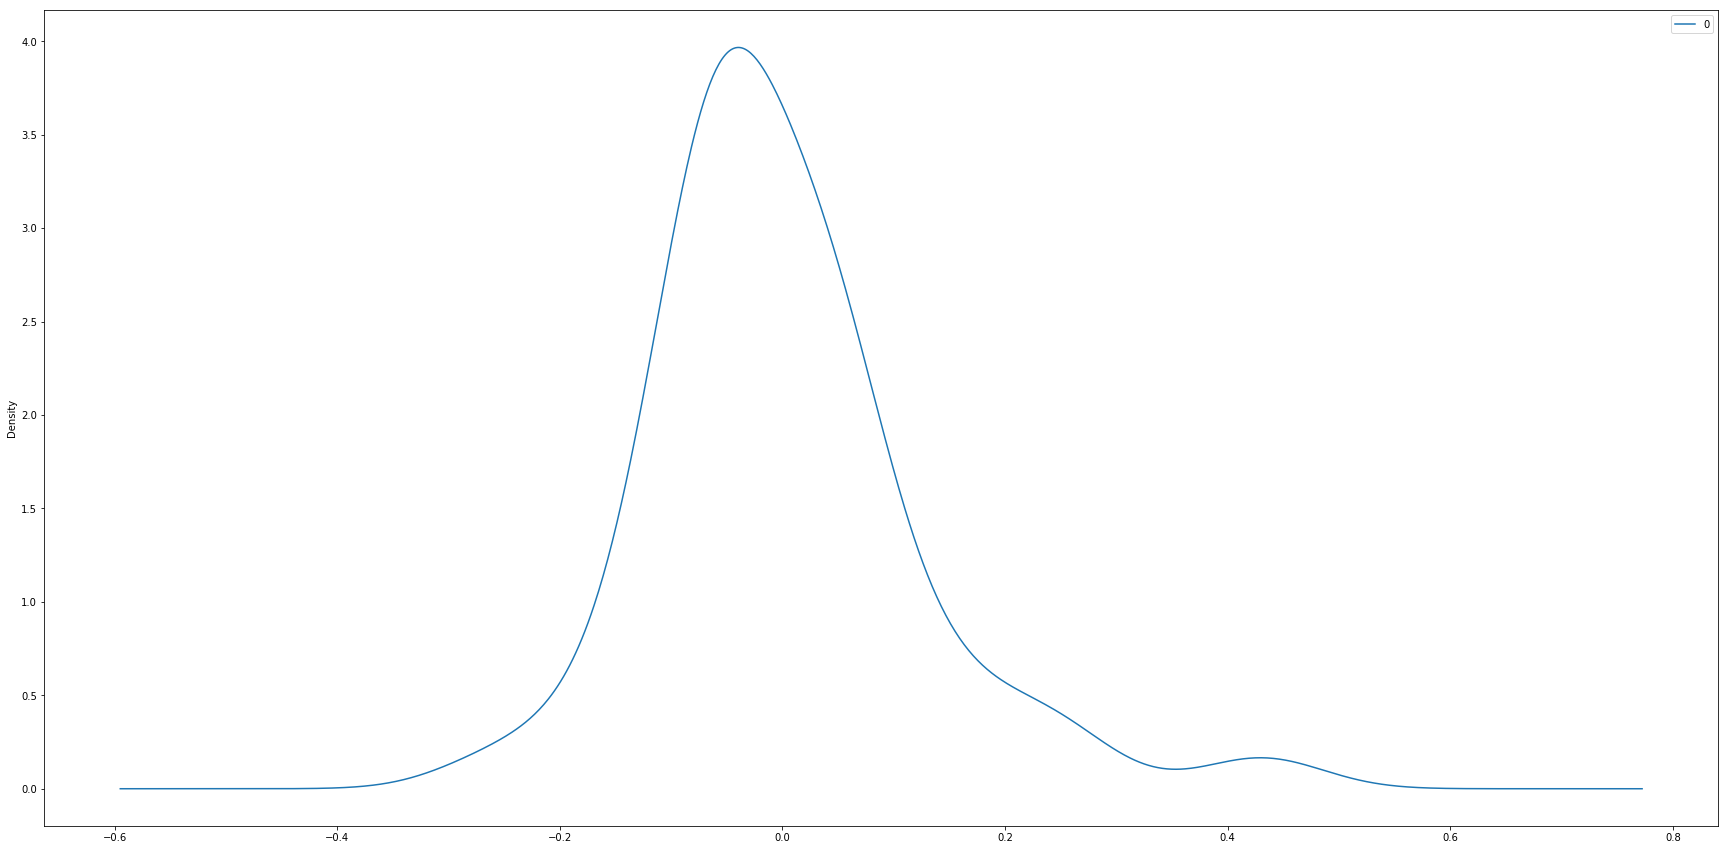

In [182]:
#ARIMA fit Morrisons marketshare
model = ARIMA(aldiseries, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(30,15))
residuals.plot(kind='kde', figsize=(30,15))
print(residuals.describe())     

In [183]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [184]:
indexdf = pd.date_range(start='2015-1-1', periods=45, freq='M') 
indexdf=indexdf.to_period()

X=aldiseries
X.index = indexdf

In [185]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:342.3299580821796
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:85845.75654900272
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:34.99004177466122
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:241.2381091414582
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:219.97251867219023
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:251.27932602255504
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:227.70047528644645
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:239.61971452928998
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:220.91720817558436


In [186]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))



print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMA:',pdq[0])
print('ARIMA:',pdq[1])
print('ARIMA:',pdq[2])


Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (0, 0, 0)
ARIMA: (0, 0, 1)
ARIMA: (0, 1, 0)


In [187]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.ARIMA(X,
                                            order=param)
                                            #seasonal_order=param_seasonal,
                                            #enforce_stationarity=False,
                                            #enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA:',param, results.aic)
        except:
            continue

ARIMA: (0, 0, 0) 106.33146686967223
ARIMA: (0, 0, 1) 57.43558072678675
ARIMA: (0, 1, 0) -59.79854783157893
ARIMA: (0, 1, 1) -58.72049215212806
ARIMA: (1, 0, 0) -43.89025742030826
ARIMA: (1, 0, 1) -46.23410771944985
ARIMA: (1, 1, 0) -58.50307875679272


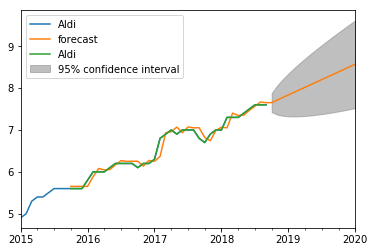

                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0612      0.020      3.020      0.004       0.021       0.101
ma.L1.D.Aldi     0.1628      0.166      0.979      0.333      -0.163       0.489


In [188]:
####grid search (or hyperparameter optimization) for model selection####
####ARIMA(0, 0, 1)x(0, 1, 0, 12)12
import statsmodels.api as sm
#sm.tsa.ARIMA()



mod = sm.tsa.ARIMA(aldiseries,order=(0, 1, 1))
results = mod.fit()
fig, ax = plt.subplots()
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = results.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.show()



print(results.summary().tables[1])

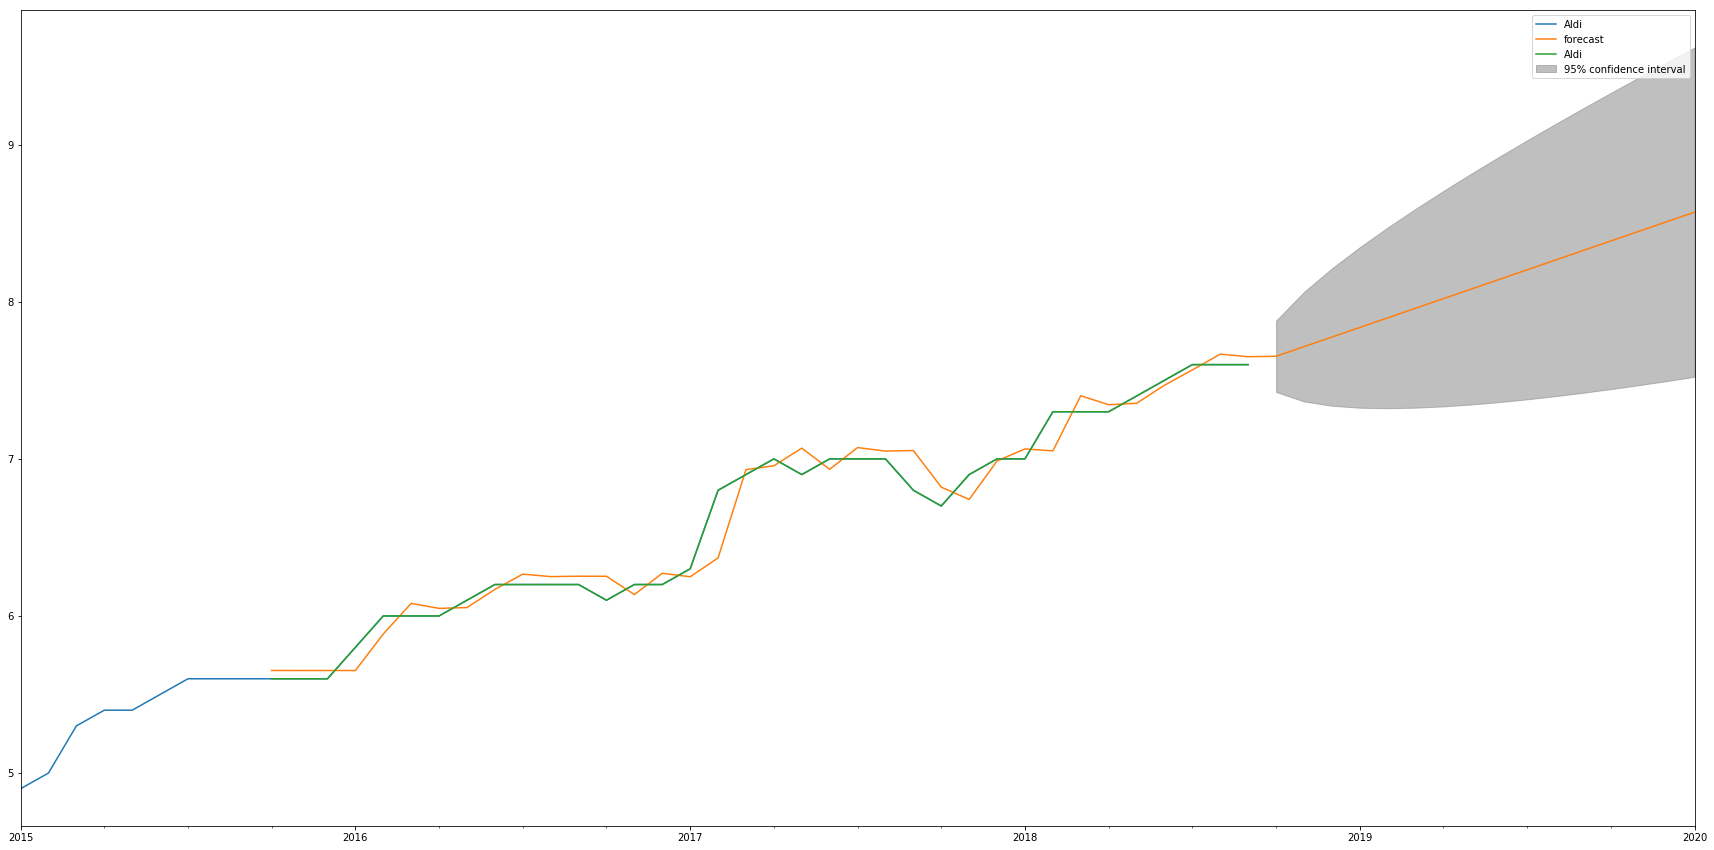

In [189]:
X=aldiseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)

plt.show()

In [190]:
print(res)

In [191]:
X = aldiseries.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=6.932459, expected=7.000000
predicted=7.082766, expected=7.000000
predicted=7.057514, expected=7.000000
predicted=7.058288, expected=6.800000
predicted=6.810477, expected=6.700000
predicted=6.731008, expected=6.900000
predicted=6.996817, expected=7.000000
predicted=7.060596, expected=7.000000
predicted=7.044237, expected=7.300000
predicted=7.416147, expected=7.300000
predicted=7.348807, expected=7.300000
predicted=7.354221, expected=7.400000
predicted=7.469550, expected=7.500000
predicted=7.568178, expected=7.600000
predicted=7.669328, expected=7.600000
predicted=7.652076, expected=7.600000
Test MSE: 0.014


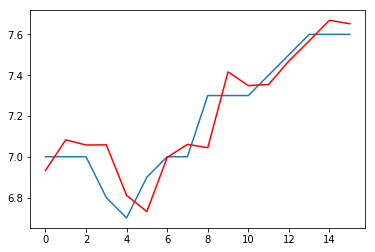

In [192]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')

In [193]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

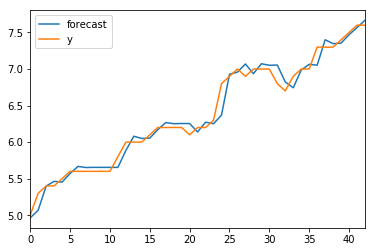

In [194]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

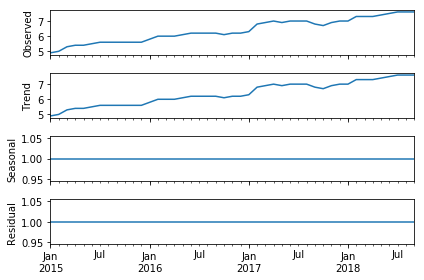

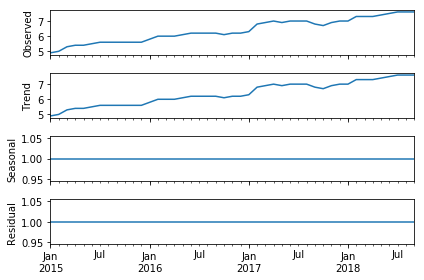

In [195]:
result = seasonal_decompose(aldiseries, model='multiplicative', freq=1)

result.plot()



In [196]:
####Auto Arima Forecast in Python for Morrisons###

import pmdarima as pm


model = pm.auto_arima(aldiseries, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())






Fit ARIMA: order=(1, 0, 1); AIC=-46.234, BIC=-39.007, Fit time=0.109 seconds
Fit ARIMA: order=(0, 0, 0); AIC=106.331, BIC=109.945, Fit time=0.003 seconds
Fit ARIMA: order=(1, 0, 0); AIC=-43.890, BIC=-38.470, Fit time=0.038 seconds
Fit ARIMA: order=(0, 0, 1); AIC=57.436, BIC=62.856, Fit time=0.042 seconds
Fit ARIMA: order=(2, 0, 1); AIC=-44.669, BIC=-35.636, Fit time=0.145 seconds
Fit ARIMA: order=(1, 0, 2); AIC=-44.307, BIC=-35.274, Fit time=0.144 seconds
Fit ARIMA: order=(2, 0, 2); AIC=-42.258, BIC=-31.418, Fit time=0.400 seconds
Total fit time: 0.889 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   45
Model:                     ARMA(1, 1)   Log Likelihood                  27.117
Method:                       css-mle   S.D. of innovations              0.126
Date:                Wed, 12 Jun 2019   AIC                            -46.234
Time:                        18:39:02 

In [197]:
model.plot_diagnostics(figsize=(30,15))
plt.show()